# Statistics CUBE Force Plate

## By Guilherme Manna Cesar and Paulo Roberto Pereira Santiago

### Introduction

This analysis aims to evaluate force plate data, specifically looking at the quality of measurements and filtering the data based on various criteria. The analysis involves checking normality, homogeneity, and performing statistical tests to determine significant differences. Post Hoc tests are conducted to identify specific group differences when significant results are found.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm 
from scipy.stats import ttest_rel, ttest_ind, shapiro, normaltest, shapiro, ttest_ind, mannwhitneyu, levene, wilcoxon, friedmanchisquare
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_nemenyi_friedman
from statsmodels.stats.multitest import multipletests
import warnings
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [2]:
print(r"""
 _          ____  _        ____       __  __   | Biomechanics and Motor Control Laboratory
| |        |  _ \(_)      /  __|     |  \/  |  | Developed by: Paulo R. P. Santiago
| |    __ _| |_) |_  ___ |  /    ___ | \  / |  | paulosantiago@usp.br
| |   / _' |  _ <| |/ _ \| |    / _ \| |\/| |  | University of Sao Paulo
| |__' (_| | |_) | | (_) |  \__' (_) | |  | |  | https://orcid.org/0000-0002-9460-8847
|____|\__'_|____/|_|\___/ \____|\___/|_|  |_|  | Date: 05 Jun 2024 (Update 26 Jun 2024)
""")


 _          ____  _        ____       __  __   | Biomechanics and Motor Control Laboratory
| |        |  _ \(_)      /  __|     |  \/  |  | Developed by: Paulo R. P. Santiago
| |    __ _| |_) |_  ___ |  /    ___ | \  / |  | paulosantiago@usp.br
| |   / _' |  _ <| |/ _ \| |    / _ \| |\/| |  | University of Sao Paulo
| |__' (_| | |_) | | (_) |  \__' (_) | |  | |  | https://orcid.org/0000-0002-9460-8847
|____|\__'_|____/|_|\___/ \____|\___/|_|  |_|  | Date: 05 Jun 2024 (Update 26 Jun 2024)



In [3]:
# Ensure the "Results" directory exists
os.makedirs("Results", exist_ok=True)

# Load the dataset
dataset_path = 'dataset/Dataset_results_20240530_124919_Results_force_cube_analysis_20240530.csv'
df_raw = pd.read_csv(dataset_path)

# Select only the data where 'Quality' == 5
df_quality_5 = df_raw[df_raw['Quality'] == 5]

# Split the data into two DataFrames based on the 'SideFoot_RL' column
df_r = df_quality_5[df_quality_5['SideFoot_RL'] == 'R']
df_l = df_quality_5[df_quality_5['SideFoot_RL'] == 'L']

def filter_subject_sequences(df):
    subjects = df['Subject'].unique()
    filtered_rows = []
    
    for subject in subjects:
        subject_df = df[df['Subject'] == subject]
        
        # Check if there is 'Trial' == 7
        if 7 in subject_df['Trial'].values:
            # Find the index with the lowest value of 'Test_Duration_s' in 'Trial' 7
            trial_7_rows = subject_df[subject_df['Trial'] == 7]
            min_duration_idx = trial_7_rows['Test_Duration_s'].idxmin()
            
            # Select the rows from Trial 1 to 7 based on the index of the selected row in Trial 7
            sequence_rows = subject_df.loc[min_duration_idx-6:min_duration_idx]
            filtered_rows.append(sequence_rows)
    
    return pd.concat(filtered_rows)

# Apply the filter to DataFrames df_r and df_l
df_r_filtered = filter_subject_sequences(df_r)
df_l_filtered = filter_subject_sequences(df_l)

# Generate the paths to save the files in the "Results" directory
df_r_filtered_path = os.path.join('Results', 'Dataset_results_R_filtered.csv')
df_l_filtered_path = os.path.join('Results', 'Dataset_results_L_filtered.csv')

# Save the filtered DataFrames
df_r_filtered.to_csv(df_r_filtered_path, index=False)
df_l_filtered.to_csv(df_l_filtered_path, index=False)

display(df_r_filtered, df_l_filtered)


,FileName,TimeStamp,Subject,Trial,BW_kg,SideFoot_RL,Dominance_RL,Quality,Num_Samples,Index_40ms,Index_100ms,Index_ITransient,Index_VIP,Index_Max,Test_Duration_s,CumSum_Times_s,Contact_Time_s,Time_40ms_s,Time_100ms_s,Time_ITransient_s,Time_VIP_s,Time_Peak_VMax_s,VPeak_40ms_BW,VPeak_100ms_BW,Peak_VITransient_BW,Peak_VIP_BW,Peak_VMax_BW,Total_Imp_BW.s,Imp_40ms_BW.s,Imp_100ms_BW.s,Imp_ITransient_BW.s,Imp_Brake_VMax_BW.s,Imp_Propulsion_BW.s,RFD_40ms_BW.s-1,RFD_100ms_BW.s-1,RFD_ITransient_BW.s-1,RFD_Brake_VMax_BW.s-1,RFD_Propulsion_BW.s-1,Simple_stiffness_constant,High_stiffness,Low_stiffness,Transition_time,Average_loading_rate
35,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,1,90.895,R,R,5,302,40,100,43,54,154,0.301,0.301,0.301,0.04,0.1,0.042,0.054,0.154,0.939,1.917,1.329,2.606,2.477,0.448,0.019,0.127,0.022,0.251,0.195,23.481,19.165,62.046,16.083,-16.708,0.521,0.089,1.784,0.248,19.908
36,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,2,90.895,R,R,5,334,40,100,42,52,180,1.176,0.634,0.333,0.04,0.1,0.041,0.052,0.180,1.378,1.520,1.594,2.275,2.345,0.507,0.022,0.122,0.025,0.287,0.217,34.454,15.197,55.485,13.027,-15.198,0.469,0.089,1.766,0.284,31.000
37,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,3,90.895,R,R,5,360,40,100,54,67,208,2.152,0.993,0.359,0.04,0.1,0.053,0.067,0.208,1.156,1.679,1.728,2.024,2.397,0.552,0.022,0.126,0.042,0.362,0.188,28.905,16.792,38.196,11.524,-15.736,0.479,0.158,1.841,0.294,26.607
38,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,4,90.895,R,R,5,354,40,100,46,57,201,3.154,1.346,0.353,0.04,0.1,0.045,0.057,0.201,0.874,1.520,1.318,2.254,2.299,0.542,0.013,0.107,0.019,0.321,0.219,21.862,15.204,50.083,11.437,-14.979,0.460,0.145,1.754,0.305,31.135
39,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,5,90.895,R,R,5,283,40,100,34,42,171,4.172,1.628,0.282,0.04,0.1,0.033,0.042,0.171,2.102,2.141,1.562,2.147,2.493,0.479,0.028,0.138,0.017,0.308,0.169,52.546,21.406,65.055,14.579,-22.253,0.499,0.094,1.918,0.248,45.198
40,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,6,90.895,R,R,5,352,40,100,22,28,234,5.125,1.979,0.351,0.04,0.1,0.021,0.028,0.234,0.965,1.692,0.685,0.749,2.191,0.528,0.023,0.109,0.009,0.380,0.146,24.117,16.917,35.669,9.363,-18.524,0.438,1.662,0.119,0.035,21.041
41,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,7,90.895,R,R,5,301,40,100,54,67,152,6.082,2.279,0.300,0.04,0.1,0.053,0.067,0.152,1.100,2.109,1.821,2.010,2.527,0.466,0.022,0.134,0.042,0.254,0.210,27.493,21.088,37.923,16.627,-16.944,0.505,0.106,1.856,0.248,33.628
63,AT014_cube04_dev1_fixnoise.csv,2024-04-25 11:46:08,AT014,1,85.575,R,R,5,455,40,100,145,181,248,0.454,0.454,0.454,0.04,0.1,0.144,0.181,0.248,0.566,1.451,1.946,2.293,2.622,0.687,0.009,0.068,0.144,0.388,0.297,14.139,14.510,15.923,10.573,-12.634,0.524,1.751,0.047,0.063,12.928
64,AT014_cube04_dev1_fixnoise.csv,2024-04-25 11:46:08,AT014,2,85.575,R,R,5,422,40,100,26,33,209,1.783,0.875,0.421,0.04,0.1,0.025,0.033,0.209,0.856,1.841,0.683,0.982,2.724,0.670,0.017,0.093,0.004,0.351,0.316,21.403,18.413,39.274,13.032,-12.746,0.545,0.057,1.909,0.348,31.070
65,AT014_cube04_dev1_fixnoise.csv,2024-04-25 11:46:08,AT014,3,85.575,R,R,5,460,40,100,26,32,265,3.229,1.334,0.459,0.04,0.1,0.025,0.032,0.265,0.497,1.403,0.481,0.587,2.658,0.700,0.011,0.064,0.004,0.421,0.276,12.431,14.031,23.479,10.029,-13.593,0.532,1.784,0.195,0.075,19.832


,FileName,TimeStamp,Subject,Trial,BW_kg,SideFoot_RL,Dominance_RL,Quality,Num_Samples,Index_40ms,Index_100ms,Index_ITransient,Index_VIP,Index_Max,Test_Duration_s,CumSum_Times_s,Contact_Time_s,Time_40ms_s,Time_100ms_s,Time_ITransient_s,Time_VIP_s,Time_Peak_VMax_s,VPeak_40ms_BW,VPeak_100ms_BW,Peak_VITransient_BW,Peak_VIP_BW,Peak_VMax_BW,Total_Imp_BW.s,Imp_40ms_BW.s,Imp_100ms_BW.s,Imp_ITransient_BW.s,Imp_Brake_VMax_BW.s,Imp_Propulsion_BW.s,RFD_40ms_BW.s-1,RFD_100ms_BW.s-1,RFD_ITransient_BW.s-1,RFD_Brake_VMax_BW.s-1,RFD_Propulsion_BW.s-1,Simple_stiffness_constant,High_stiffness,Low_stiffness,Transition_time,Average_loading_rate
28,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,1,89.868,L,R,5,280,40,100,47,59,144,0.279,0.279,0.279,0.04,0.1,0.046,0.059,0.144,0.994,2.164,1.435,1.894,2.659,0.417,0.016,0.122,0.024,0.231,0.183,24.844,21.635,41.171,18.465,-19.538,0.532,0.198,1.807,0.224,32.499
29,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,2,89.868,L,R,5,309,40,100,37,46,153,1.145,0.587,0.308,0.04,0.1,0.036,0.046,0.153,2.191,2.033,1.701,2.687,2.352,0.465,0.027,0.143,0.022,0.262,0.200,54.779,20.326,74.647,15.374,-15.049,0.537,0.082,1.832,0.251,43.834
30,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,3,89.868,L,R,5,271,40,100,50,63,135,2.052,0.857,0.270,0.04,0.1,0.049,0.063,0.135,1.273,2.371,1.943,2.418,2.685,0.435,0.024,0.153,0.039,0.242,0.190,31.834,23.707,49.342,19.888,-19.738,0.537,0.091,1.948,0.221,34.356
31,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,4,89.868,L,R,5,281,40,100,43,54,162,2.979,1.137,0.280,0.04,0.1,0.042,0.054,0.162,1.448,2.121,1.682,2.235,2.521,0.462,0.021,0.138,0.025,0.287,0.172,36.202,21.208,53.218,15.564,-21.192,0.504,0.079,1.898,0.241,45.526
32,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,5,89.868,L,R,5,296,40,100,34,42,158,4.040,1.432,0.295,0.04,0.1,0.033,0.042,0.158,2.895,2.182,2.091,2.925,2.331,0.500,0.030,0.158,0.015,0.292,0.206,72.385,21.821,88.643,14.754,-16.850,0.585,0.017,1.947,0.257,67.352
33,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,6,89.868,L,R,5,294,40,100,87,109,171,4.915,1.725,0.293,0.04,0.1,0.086,0.109,0.171,1.584,2.092,1.938,2.122,2.477,0.483,0.037,0.137,0.111,0.298,0.183,39.593,20.919,24.676,14.485,-20.091,0.495,0.117,1.882,0.254,11.268
34,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,7,89.868,L,R,5,265,40,100,29,36,114,5.850,1.989,0.264,0.04,0.1,0.028,0.036,0.114,2.168,2.667,2.001,2.240,2.786,0.455,0.046,0.174,0.022,0.213,0.240,54.194,26.669,80.000,24.442,-18.406,0.557,0.134,2.119,0.211,79.646
70,AT014_cube05_dev1_fixnoise.csv,2024-04-25 11:46:09,AT014,1,84.439,L,R,5,392,40,100,75,94,203,0.391,0.391,0.391,0.04,0.1,0.074,0.094,0.203,0.617,1.817,1.506,1.824,2.698,0.640,0.029,0.107,0.064,0.347,0.290,15.434,18.169,24.654,13.291,-14.225,0.540,0.052,1.924,0.330,6.744
71,AT014_cube05_dev1_fixnoise.csv,2024-04-25 11:46:09,AT014,2,84.439,L,R,5,423,40,100,30,38,225,1.680,0.813,0.422,0.04,0.1,0.029,0.038,0.225,0.713,1.565,0.522,0.726,2.733,0.644,0.010,0.071,0.004,0.354,0.287,17.820,15.645,25.040,12.148,-13.769,0.547,0.086,1.815,0.351,20.381
72,AT014_cube05_dev1_fixnoise.csv,2024-04-25 11:46:09,AT014,3,84.439,L,R,5,421,40,100,134,167,238,2.987,1.233,0.420,0.04,0.1,0.133,0.167,0.238,0.583,1.527,1.964,2.302,2.723,0.657,0.013,0.074,0.132,0.384,0.270,14.580,15.270,17.309,11.443,-14.827,0.545,1.826,0.227,0.069,13.909


In [4]:
# Retain the 'FileName' column for later use
df_r = df_r_filtered.drop(columns=['TimeStamp', 'Dominance_RL', 'Num_Samples', 'Index_40ms', 'Index_100ms',
                                   'Index_ITransient', 'Index_VIP', 'Index_Max', 'Time_40ms_s', 'Time_100ms_s', 'CumSum_Times_s'])
df_l = df_l_filtered.drop(columns=['TimeStamp', 'Dominance_RL', 'Num_Samples', 'Index_40ms', 'Index_100ms',
                                   'Index_ITransient', 'Index_VIP', 'Index_Max', 'Time_40ms_s', 'Time_100ms_s', 'CumSum_Times_s'])

display(df_r, df_l)

,FileName,Subject,Trial,BW_kg,SideFoot_RL,Quality,Test_Duration_s,Contact_Time_s,Time_ITransient_s,Time_VIP_s,Time_Peak_VMax_s,VPeak_40ms_BW,VPeak_100ms_BW,Peak_VITransient_BW,Peak_VIP_BW,Peak_VMax_BW,Total_Imp_BW.s,Imp_40ms_BW.s,Imp_100ms_BW.s,Imp_ITransient_BW.s,Imp_Brake_VMax_BW.s,Imp_Propulsion_BW.s,RFD_40ms_BW.s-1,RFD_100ms_BW.s-1,RFD_ITransient_BW.s-1,RFD_Brake_VMax_BW.s-1,RFD_Propulsion_BW.s-1,Simple_stiffness_constant,High_stiffness,Low_stiffness,Transition_time,Average_loading_rate
35,AT013_cube08_dev2.csv,AT013,1,90.895,R,5,0.301,0.301,0.042,0.054,0.154,0.939,1.917,1.329,2.606,2.477,0.448,0.019,0.127,0.022,0.251,0.195,23.481,19.165,62.046,16.083,-16.708,0.521,0.089,1.784,0.248,19.908
36,AT013_cube08_dev2.csv,AT013,2,90.895,R,5,1.176,0.333,0.041,0.052,0.180,1.378,1.520,1.594,2.275,2.345,0.507,0.022,0.122,0.025,0.287,0.217,34.454,15.197,55.485,13.027,-15.198,0.469,0.089,1.766,0.284,31.000
37,AT013_cube08_dev2.csv,AT013,3,90.895,R,5,2.152,0.359,0.053,0.067,0.208,1.156,1.679,1.728,2.024,2.397,0.552,0.022,0.126,0.042,0.362,0.188,28.905,16.792,38.196,11.524,-15.736,0.479,0.158,1.841,0.294,26.607
38,AT013_cube08_dev2.csv,AT013,4,90.895,R,5,3.154,0.353,0.045,0.057,0.201,0.874,1.520,1.318,2.254,2.299,0.542,0.013,0.107,0.019,0.321,0.219,21.862,15.204,50.083,11.437,-14.979,0.460,0.145,1.754,0.305,31.135
39,AT013_cube08_dev2.csv,AT013,5,90.895,R,5,4.172,0.282,0.033,0.042,0.171,2.102,2.141,1.562,2.147,2.493,0.479,0.028,0.138,0.017,0.308,0.169,52.546,21.406,65.055,14.579,-22.253,0.499,0.094,1.918,0.248,45.198
40,AT013_cube08_dev2.csv,AT013,6,90.895,R,5,5.125,0.351,0.021,0.028,0.234,0.965,1.692,0.685,0.749,2.191,0.528,0.023,0.109,0.009,0.380,0.146,24.117,16.917,35.669,9.363,-18.524,0.438,1.662,0.119,0.035,21.041
41,AT013_cube08_dev2.csv,AT013,7,90.895,R,5,6.082,0.300,0.053,0.067,0.152,1.100,2.109,1.821,2.010,2.527,0.466,0.022,0.134,0.042,0.254,0.210,27.493,21.088,37.923,16.627,-16.944,0.505,0.106,1.856,0.248,33.628
63,AT014_cube04_dev1_fixnoise.csv,AT014,1,85.575,R,5,0.454,0.454,0.144,0.181,0.248,0.566,1.451,1.946,2.293,2.622,0.687,0.009,0.068,0.144,0.388,0.297,14.139,14.510,15.923,10.573,-12.634,0.524,1.751,0.047,0.063,12.928
64,AT014_cube04_dev1_fixnoise.csv,AT014,2,85.575,R,5,1.783,0.421,0.025,0.033,0.209,0.856,1.841,0.683,0.982,2.724,0.670,0.017,0.093,0.004,0.351,0.316,21.403,18.413,39.274,13.032,-12.746,0.545,0.057,1.909,0.348,31.070
65,AT014_cube04_dev1_fixnoise.csv,AT014,3,85.575,R,5,3.229,0.459,0.025,0.032,0.265,0.497,1.403,0.481,0.587,2.658,0.700,0.011,0.064,0.004,0.421,0.276,12.431,14.031,23.479,10.029,-13.593,0.532,1.784,0.195,0.075,19.832


,FileName,Subject,Trial,BW_kg,SideFoot_RL,Quality,Test_Duration_s,Contact_Time_s,Time_ITransient_s,Time_VIP_s,Time_Peak_VMax_s,VPeak_40ms_BW,VPeak_100ms_BW,Peak_VITransient_BW,Peak_VIP_BW,Peak_VMax_BW,Total_Imp_BW.s,Imp_40ms_BW.s,Imp_100ms_BW.s,Imp_ITransient_BW.s,Imp_Brake_VMax_BW.s,Imp_Propulsion_BW.s,RFD_40ms_BW.s-1,RFD_100ms_BW.s-1,RFD_ITransient_BW.s-1,RFD_Brake_VMax_BW.s-1,RFD_Propulsion_BW.s-1,Simple_stiffness_constant,High_stiffness,Low_stiffness,Transition_time,Average_loading_rate
28,AT013_cube07_dev2_fixnoise.csv,AT013,1,89.868,L,5,0.279,0.279,0.046,0.059,0.144,0.994,2.164,1.435,1.894,2.659,0.417,0.016,0.122,0.024,0.231,0.183,24.844,21.635,41.171,18.465,-19.538,0.532,0.198,1.807,0.224,32.499
29,AT013_cube07_dev2_fixnoise.csv,AT013,2,89.868,L,5,1.145,0.308,0.036,0.046,0.153,2.191,2.033,1.701,2.687,2.352,0.465,0.027,0.143,0.022,0.262,0.200,54.779,20.326,74.647,15.374,-15.049,0.537,0.082,1.832,0.251,43.834
30,AT013_cube07_dev2_fixnoise.csv,AT013,3,89.868,L,5,2.052,0.270,0.049,0.063,0.135,1.273,2.371,1.943,2.418,2.685,0.435,0.024,0.153,0.039,0.242,0.190,31.834,23.707,49.342,19.888,-19.738,0.537,0.091,1.948,0.221,34.356
31,AT013_cube07_dev2_fixnoise.csv,AT013,4,89.868,L,5,2.979,0.280,0.042,0.054,0.162,1.448,2.121,1.682,2.235,2.521,0.462,0.021,0.138,0.025,0.287,0.172,36.202,21.208,53.218,15.564,-21.192,0.504,0.079,1.898,0.241,45.526
32,AT013_cube07_dev2_fixnoise.csv,AT013,5,89.868,L,5,4.040,0.295,0.033,0.042,0.158,2.895,2.182,2.091,2.925,2.331,0.500,0.030,0.158,0.015,0.292,0.206,72.385,21.821,88.643,14.754,-16.850,0.585,0.017,1.947,0.257,67.352
33,AT013_cube07_dev2_fixnoise.csv,AT013,6,89.868,L,5,4.915,0.293,0.086,0.109,0.171,1.584,2.092,1.938,2.122,2.477,0.483,0.037,0.137,0.111,0.298,0.183,39.593,20.919,24.676,14.485,-20.091,0.495,0.117,1.882,0.254,11.268
34,AT013_cube07_dev2_fixnoise.csv,AT013,7,89.868,L,5,5.850,0.264,0.028,0.036,0.114,2.168,2.667,2.001,2.240,2.786,0.455,0.046,0.174,0.022,0.213,0.240,54.194,26.669,80.000,24.442,-18.406,0.557,0.134,2.119,0.211,79.646
70,AT014_cube05_dev1_fixnoise.csv,AT014,1,84.439,L,5,0.391,0.391,0.074,0.094,0.203,0.617,1.817,1.506,1.824,2.698,0.640,0.029,0.107,0.064,0.347,0.290,15.434,18.169,24.654,13.291,-14.225,0.540,0.052,1.924,0.330,6.744
71,AT014_cube05_dev1_fixnoise.csv,AT014,2,84.439,L,5,1.680,0.422,0.029,0.038,0.225,0.713,1.565,0.522,0.726,2.733,0.644,0.010,0.071,0.004,0.354,0.287,17.820,15.645,25.040,12.148,-13.769,0.547,0.086,1.815,0.351,20.381
72,AT014_cube05_dev1_fixnoise.csv,AT014,3,84.439,L,5,2.987,0.420,0.133,0.167,0.238,0.583,1.527,1.964,2.302,2.723,0.657,0.013,0.074,0.132,0.384,0.270,14.580,15.270,17.309,11.443,-14.827,0.545,1.826,0.227,0.069,13.909


# Paired Sample Comparison

## Objective
The objective is to compare the test durations (`Test_Duration_s`) between two conditions (`df_r` and `df_l`) for `Trial` 7 using an appropriate statistical test. We'll follow these steps:

1. **Filter the Data**: Extract rows corresponding to `Trial` 7.
2. **Group by Subject and Calculate Differences**: Group data by `Subject`, calculate the mean test duration, and compute differences between paired samples.
3. **Check for Normality with Shapiro-Wilk Test**: Determine if the differences are normally distributed.
4. **Visualize the Differences**: Use histograms, Q-Q plots, and box plots to visualize the distribution of differences.
5. **Check for Outliers**: Identify outliers using the Interquartile Range (IQR) method.
6. **Choose and Perform the Appropriate Test**: Based on the normality and outliers, decide whether to use the paired t-test or the Wilcoxon signed-rank test.
7. **Display and Interpret Results**: Present the results and interpret the findings.

## Steps

### 1. Filter the Data
We will filter the dataframes to keep only the rows where `Trial` is 7.

### 2. Group by Subject and Calculate Differences
We group the data by `Subject` and calculate the mean `Test_Duration_s` for each subject. Then we compute the differences between paired samples.

### 3. Check for Normality with Shapiro-Wilk Test
We use the Shapiro-Wilk test to check if the differences are normally distributed. A p-value greater than 0.05 indicates normality.

### 4. Visualize the Differences
We create the following plots to visualize the distribution of differences:
- **Histogram**: To see the distribution and density.
- **Box Plot**: To identify any potential outliers.
- **Q-Q Plot**: To visually inspect the normality.

### 5. Check for Outliers
We use the IQR method to detect outliers. Differences beyond 1.5 times the IQR from the first and third quartiles are considered outliers.

### 6. Choose and Perform the Appropriate Test
- If the differences are normally distributed and there are no significant outliers, we perform the **Paired t-test**.
- If the differences are not normally distributed or there are significant outliers, we perform the **Wilcoxon signed-rank test**.

### 7. Display and Interpret Results
We display the results of the chosen test and interpret the findings. We consider a p-value of 0.05 as the threshold for significance.

## Code Implementation
Here is the complete implementation of the steps described above:


In [5]:
# Redefining the function to include the filename of the minimum duration attempt in Trial 7
def filter_subject_sequences_with_filename(df):
    subjects = df['Subject'].unique()
    filtered_rows = []
    min_time_files = {}  # Dictionary to store the file with the shortest time per subject
    
    for subject in subjects:
        subject_df = df[df['Subject'] == subject]
        
        # Check if there is a 'Trial' == 7
        if 7 in subject_df['Trial'].values:
            # Find the index with the lowest 'Test_Duration_s' in 'Trial' 7
            trial_7_rows = subject_df[subject_df['Trial'] == 7]
            min_duration_idx = trial_7_rows['Test_Duration_s'].idxmin()
            
            # Store the filename corresponding to the shortest time
            min_time_files[subject] = trial_7_rows.loc[min_duration_idx, 'FileName']
            
            # Select rows from Trial 1 to 7 based on the index of the selected row in Trial 7
            sequence_rows = subject_df.loc[min_duration_idx-6:min_duration_idx]
            filtered_rows.append(sequence_rows)
    
    return pd.concat(filtered_rows), min_time_files

# Apply the function to both DataFrames df_r and df_l
df_r_filtered, min_time_files_r = filter_subject_sequences_with_filename(df_r)
df_l_filtered, min_time_files_l = filter_subject_sequences_with_filename(df_l)

# Filter the dataframes to keep only the rows of Trial 7
df_r_trial7 = df_r[df_r['Trial'] == 7]
df_l_trial7 = df_l[df_l['Trial'] == 7]

# Group the data by Subject and select the variable Test_Duration_s
df_r_grouped = df_r_trial7.groupby('Subject')['Test_Duration_s'].mean()
df_l_grouped = df_l_trial7.groupby('Subject')['Test_Duration_s'].mean()

# Ensure the Subjects are aligned for the paired t-test
subjects_common = df_r_grouped.index.intersection(df_l_grouped.index)
test_duration_r = df_r_grouped.loc[subjects_common]
test_duration_l = df_l_grouped.loc[subjects_common]

# Printing the results with the file information
print("Right Side Durations with Files:")
for subject in subjects_common:
    print(f"Subject: {subject}, Duration: {test_duration_r[subject]:.2f} s, File: {min_time_files_r.get(subject, 'N/A')}")

print("\nLeft Side Durations with Files:")
for subject in subjects_common:
    print(f"Subject: {subject}, Duration: {test_duration_l[subject]:.2f} s, File: {min_time_files_l.get(subject, 'N/A')}")


Right Side Durations with Files:
Subject: AT013, Duration: 6.08 s, File: AT013_cube08_dev2.csv
Subject: AT014, Duration: 8.60 s, File: AT014_cube04_dev1_fixnoise.csv
Subject: AT015, Duration: 4.75 s, File: AT015_cube02_dev2_fixnoise.csv
Subject: AT016, Duration: 5.97 s, File: AT016_cube05_dev2_fixnoise.csv
Subject: AT017, Duration: 5.32 s, File: AT017_cube03_dev2.csv
Subject: AT018, Duration: 4.79 s, File: AT018_cube04_dev2_fixnoise.csv
Subject: AT019, Duration: 10.74 s, File: AT019_cube05_dev1.csv
Subject: AT020, Duration: 14.46 s, File: AT020_cube06_dev1.csv
Subject: AT021, Duration: 12.66 s, File: AT021_cube07_dev1.csv
Subject: AT022, Duration: 17.12 s, File: AT022_cube05_dev1.csv

Left Side Durations with Files:
Subject: AT013, Duration: 5.85 s, File: AT013_cube07_dev2_fixnoise.csv
Subject: AT014, Duration: 8.27 s, File: AT014_cube05_dev1_fixnoise.csv
Subject: AT015, Duration: 4.12 s, File: AT015_cube03_dev2_fixnoise.csv
Subject: AT016, Duration: 8.39 s, File: AT016_cube04_dev2_fix

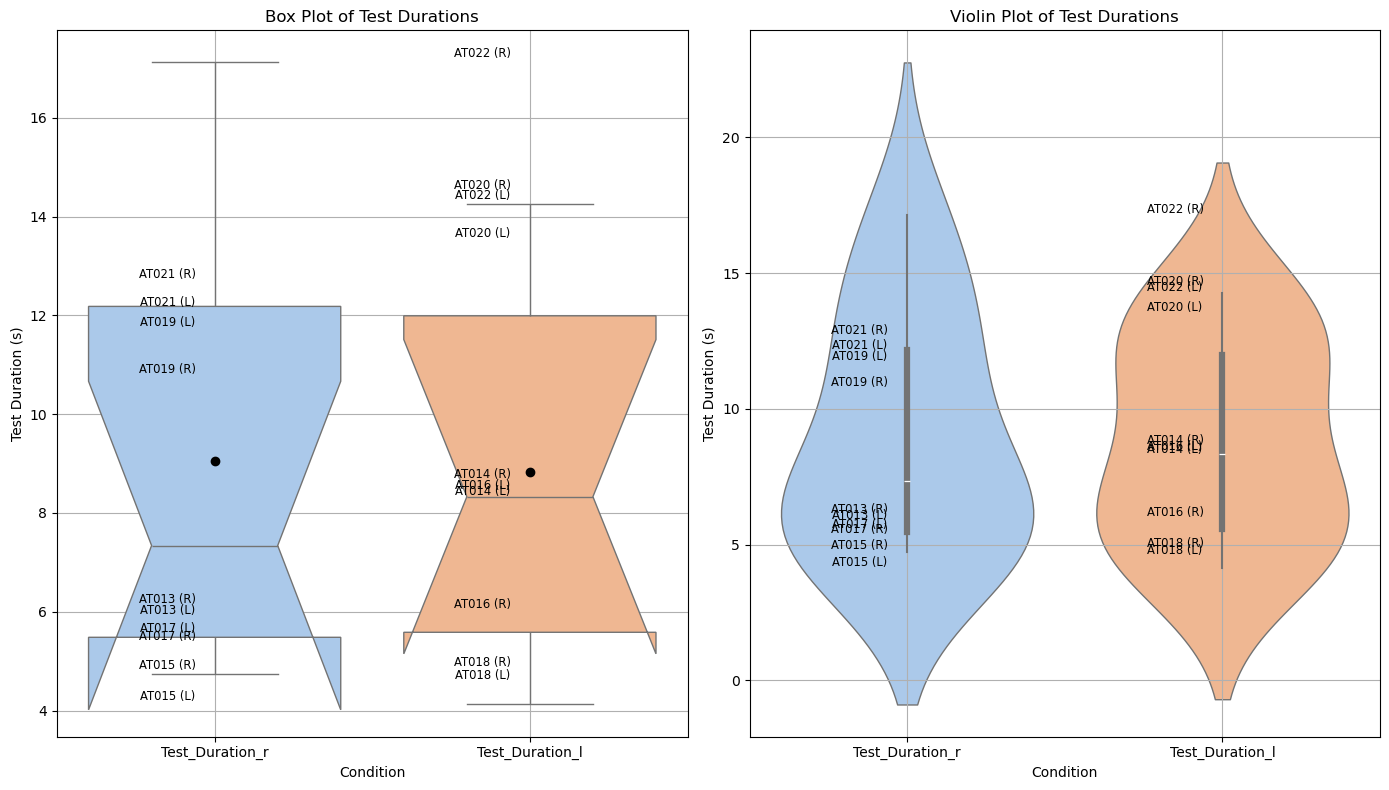


Right Side Durations with Files:
Subject: AT013, Duration: 6.08 s, File: AT013_cube08_dev2.csv
Subject: AT014, Duration: 8.60 s, File: AT014_cube04_dev1_fixnoise.csv
Subject: AT015, Duration: 4.75 s, File: AT015_cube02_dev2_fixnoise.csv
Subject: AT016, Duration: 5.97 s, File: AT016_cube05_dev2_fixnoise.csv
Subject: AT017, Duration: 5.32 s, File: AT017_cube03_dev2.csv
Subject: AT018, Duration: 4.79 s, File: AT018_cube04_dev2_fixnoise.csv
Subject: AT019, Duration: 10.74 s, File: AT019_cube05_dev1.csv
Subject: AT020, Duration: 14.46 s, File: AT020_cube06_dev1.csv
Subject: AT021, Duration: 12.66 s, File: AT021_cube07_dev1.csv
Subject: AT022, Duration: 17.12 s, File: AT022_cube05_dev1.csv

Left Side Durations with Files:
Subject: AT013, Duration: 5.85 s, File: AT013_cube07_dev2_fixnoise.csv
Subject: AT014, Duration: 8.27 s, File: AT014_cube05_dev1_fixnoise.csv
Subject: AT015, Duration: 4.12 s, File: AT015_cube03_dev2_fixnoise.csv
Subject: AT016, Duration: 8.39 s, File: AT016_cube04_dev2_fi

In [6]:
# Combine data for visualization, including filenames for the shortest duration
df_combined = pd.DataFrame({
    'Subject': subjects_common,
    'Test_Duration_r': test_duration_r.values,
    'Test_Duration_l': test_duration_l.values,
    'File_r': [min_time_files_r.get(subject, 'N/A') for subject in subjects_common],
    'File_l': [min_time_files_l.get(subject, 'N/A') for subject in subjects_common]
})

# Melt the DataFrame for visualization
df_melted = df_combined.melt(id_vars='Subject', value_vars=['Test_Duration_r', 'Test_Duration_l'],
                             var_name='Condition', value_name='Test_Duration_s')

# Adding Side information for annotation purposes
df_melted['Side'] = df_melted['Condition'].apply(lambda x: 'R' if x == 'Test_Duration_r' else 'L')

# Plotting Box Plot and Violin Plot
plt.figure(figsize=(14, 8))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Condition', y='Test_Duration_s', data=df_melted, notch=True, whis=1.5, hue='Condition', palette="pastel", showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"}, dodge=False)
plt.title('Box Plot of Test Durations')
plt.xlabel('Condition')
plt.ylabel('Test Duration (s)')
plt.grid(True)

# Annotating with Subject and Side in Box Plot
for i, row in df_melted.iterrows():
    plt.text(i % 2 - 0.15, row['Test_Duration_s'] + 0.1, f"{row['Subject']} ({row['Side']})", 
             horizontalalignment='center', size='small', color='black')

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Condition', y='Test_Duration_s', data=df_melted, hue='Condition', palette="pastel", inner="box", linewidth=1, dodge=False)
plt.title('Violin Plot of Test Durations')
plt.xlabel('Condition')
plt.ylabel('Test Duration (s)')
plt.grid(True)

# Annotating with Subject and Side in Violin Plot
for i, row in df_melted.iterrows():
    plt.text(i % 2 - 0.15, row['Test_Duration_s'] + 0.1, f"{row['Subject']} ({row['Side']})", 
             horizontalalignment='center', size='small', color='black')

plt.tight_layout()
plt.show()

# Print the durations along with their associated files
print("\nRight Side Durations with Files:")
for subject in subjects_common:
    print(f"Subject: {subject}, Duration: {test_duration_r[subject]:.2f} s, File: {min_time_files_r.get(subject, 'N/A')}")

print("\nLeft Side Durations with Files:")
for subject in subjects_common:
    print(f"Subject: {subject}, Duration: {test_duration_l[subject]:.2f} s, File: {min_time_files_l.get(subject, 'N/A')}")



count    10.000000
mean      9.048800
std       4.464001
min       4.746000
25%       5.482250
50%       7.340000
75%      12.182250
max      17.122000
Name: Test_Duration_s, dtype: float64

count    10.000000
mean      8.820200
std       3.815789
min       4.122000
25%       5.583750
50%       8.329000
75%      11.992000
max      14.254000
Name: Test_Duration_s, dtype: float64


Differences between paired samples:
Subject
AT013    0.232
AT014    0.331
AT015    0.624
AT016   -2.422
AT017   -0.175
AT018    0.249
AT019   -0.955
AT020    0.962
AT021    0.572
AT022    2.868
Name: Test_Duration_s, dtype: float64

Shapiro-Wilk test statistic: 0.9200243187115154, p-value: 0.357157763741393
The differences are normally distributed (p > 0.05).


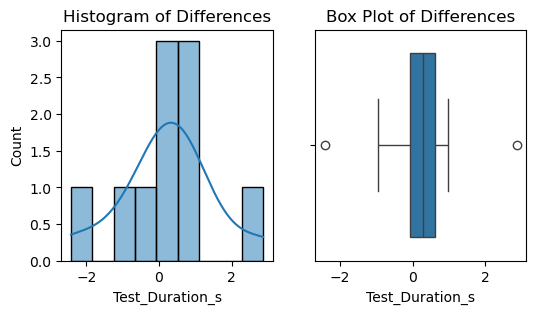

<Figure size 600x300 with 0 Axes>

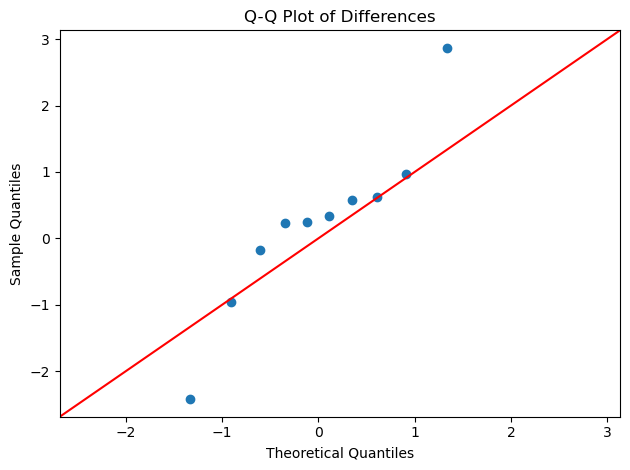


Outliers: Subject
AT016   -2.422
AT022    2.868
Name: Test_Duration_s, dtype: float64

Results of the Wilcoxon signed-rank test:
Test statistic: 17.0
P-value: 0.322265625
There is no significant difference between the test durations (p > 0.05).


In [7]:
display(test_duration_r.describe())
display(test_duration_l.describe())
# Calculate the differences
differences = test_duration_r - test_duration_l

print("\nDifferences between paired samples:")
print(differences)

# Step 3: Check for normality with Shapiro-Wilk test
shapiro_test = shapiro(differences)
print(f"\nShapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")
if shapiro_test.pvalue > 0.05:
    print("The differences are normally distributed (p > 0.05).")
else:
    print("The differences are not normally distributed (p <= 0.05).")

# Step 4: Visualize the distribution of differences
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
sns.histplot(differences, kde=True)
plt.title('Histogram of Differences')

plt.subplot(1, 2, 2)
sns.boxplot(x=differences)
plt.title('Box Plot of Differences')
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 3))
sm.qqplot(differences, line='45')
plt.title('Q-Q Plot of Differences')

plt.tight_layout()
plt.show()

# Step 5: Check for outliers using IQR method
Q1 = np.percentile(differences, 25)
Q3 = np.percentile(differences, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = differences[(differences < lower_bound) | (differences > upper_bound)]
print(f"\nOutliers: {outliers}")

# Step 6: Determine which test to use based on normality and outliers
if shapiro_test.pvalue > 0.05 and outliers.empty:
    # Perform the paired t-test
    t_statistic, p_value = ttest_rel(test_duration_r, test_duration_l)
    test_name = "Paired t-test"
else:
    # Perform the Wilcoxon signed-rank test
    t_statistic, p_value = wilcoxon(test_duration_r, test_duration_l)
    test_name = "Wilcoxon signed-rank test"

# Step 7: Interpretation of the test
alpha = 0.05
if p_value <= alpha:
    conclusion = "There is a significant difference between the test durations (p <= 0.05)."
else:
    conclusion = "There is no significant difference between the test durations (p > 0.05)."

# Display the test results
print(f"\nResults of the {test_name}:")
print(f"Test statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(conclusion)

In [8]:
df_2rep_r = df_r.drop(columns=['BW_kg','SideFoot_RL', 'Quality', 'Test_Duration_s'])
df_2rep_l = df_l.drop(columns=['BW_kg','SideFoot_RL', 'Quality', 'Test_Duration_s'])
display(df_2rep_r, df_2rep_l)

,FileName,Subject,Trial,Contact_Time_s,Time_ITransient_s,Time_VIP_s,Time_Peak_VMax_s,VPeak_40ms_BW,VPeak_100ms_BW,Peak_VITransient_BW,Peak_VIP_BW,Peak_VMax_BW,Total_Imp_BW.s,Imp_40ms_BW.s,Imp_100ms_BW.s,Imp_ITransient_BW.s,Imp_Brake_VMax_BW.s,Imp_Propulsion_BW.s,RFD_40ms_BW.s-1,RFD_100ms_BW.s-1,RFD_ITransient_BW.s-1,RFD_Brake_VMax_BW.s-1,RFD_Propulsion_BW.s-1,Simple_stiffness_constant,High_stiffness,Low_stiffness,Transition_time,Average_loading_rate
35,AT013_cube08_dev2.csv,AT013,1,0.301,0.042,0.054,0.154,0.939,1.917,1.329,2.606,2.477,0.448,0.019,0.127,0.022,0.251,0.195,23.481,19.165,62.046,16.083,-16.708,0.521,0.089,1.784,0.248,19.908
36,AT013_cube08_dev2.csv,AT013,2,0.333,0.041,0.052,0.180,1.378,1.520,1.594,2.275,2.345,0.507,0.022,0.122,0.025,0.287,0.217,34.454,15.197,55.485,13.027,-15.198,0.469,0.089,1.766,0.284,31.000
37,AT013_cube08_dev2.csv,AT013,3,0.359,0.053,0.067,0.208,1.156,1.679,1.728,2.024,2.397,0.552,0.022,0.126,0.042,0.362,0.188,28.905,16.792,38.196,11.524,-15.736,0.479,0.158,1.841,0.294,26.607
38,AT013_cube08_dev2.csv,AT013,4,0.353,0.045,0.057,0.201,0.874,1.520,1.318,2.254,2.299,0.542,0.013,0.107,0.019,0.321,0.219,21.862,15.204,50.083,11.437,-14.979,0.460,0.145,1.754,0.305,31.135
39,AT013_cube08_dev2.csv,AT013,5,0.282,0.033,0.042,0.171,2.102,2.141,1.562,2.147,2.493,0.479,0.028,0.138,0.017,0.308,0.169,52.546,21.406,65.055,14.579,-22.253,0.499,0.094,1.918,0.248,45.198
40,AT013_cube08_dev2.csv,AT013,6,0.351,0.021,0.028,0.234,0.965,1.692,0.685,0.749,2.191,0.528,0.023,0.109,0.009,0.380,0.146,24.117,16.917,35.669,9.363,-18.524,0.438,1.662,0.119,0.035,21.041
41,AT013_cube08_dev2.csv,AT013,7,0.300,0.053,0.067,0.152,1.100,2.109,1.821,2.010,2.527,0.466,0.022,0.134,0.042,0.254,0.210,27.493,21.088,37.923,16.627,-16.944,0.505,0.106,1.856,0.248,33.628
63,AT014_cube04_dev1_fixnoise.csv,AT014,1,0.454,0.144,0.181,0.248,0.566,1.451,1.946,2.293,2.622,0.687,0.009,0.068,0.144,0.388,0.297,14.139,14.510,15.923,10.573,-12.634,0.524,1.751,0.047,0.063,12.928
64,AT014_cube04_dev1_fixnoise.csv,AT014,2,0.421,0.025,0.033,0.209,0.856,1.841,0.683,0.982,2.724,0.670,0.017,0.093,0.004,0.351,0.316,21.403,18.413,39.274,13.032,-12.746,0.545,0.057,1.909,0.348,31.070
65,AT014_cube04_dev1_fixnoise.csv,AT014,3,0.459,0.025,0.032,0.265,0.497,1.403,0.481,0.587,2.658,0.700,0.011,0.064,0.004,0.421,0.276,12.431,14.031,23.479,10.029,-13.593,0.532,1.784,0.195,0.075,19.832


,FileName,Subject,Trial,Contact_Time_s,Time_ITransient_s,Time_VIP_s,Time_Peak_VMax_s,VPeak_40ms_BW,VPeak_100ms_BW,Peak_VITransient_BW,Peak_VIP_BW,Peak_VMax_BW,Total_Imp_BW.s,Imp_40ms_BW.s,Imp_100ms_BW.s,Imp_ITransient_BW.s,Imp_Brake_VMax_BW.s,Imp_Propulsion_BW.s,RFD_40ms_BW.s-1,RFD_100ms_BW.s-1,RFD_ITransient_BW.s-1,RFD_Brake_VMax_BW.s-1,RFD_Propulsion_BW.s-1,Simple_stiffness_constant,High_stiffness,Low_stiffness,Transition_time,Average_loading_rate
28,AT013_cube07_dev2_fixnoise.csv,AT013,1,0.279,0.046,0.059,0.144,0.994,2.164,1.435,1.894,2.659,0.417,0.016,0.122,0.024,0.231,0.183,24.844,21.635,41.171,18.465,-19.538,0.532,0.198,1.807,0.224,32.499
29,AT013_cube07_dev2_fixnoise.csv,AT013,2,0.308,0.036,0.046,0.153,2.191,2.033,1.701,2.687,2.352,0.465,0.027,0.143,0.022,0.262,0.200,54.779,20.326,74.647,15.374,-15.049,0.537,0.082,1.832,0.251,43.834
30,AT013_cube07_dev2_fixnoise.csv,AT013,3,0.270,0.049,0.063,0.135,1.273,2.371,1.943,2.418,2.685,0.435,0.024,0.153,0.039,0.242,0.190,31.834,23.707,49.342,19.888,-19.738,0.537,0.091,1.948,0.221,34.356
31,AT013_cube07_dev2_fixnoise.csv,AT013,4,0.280,0.042,0.054,0.162,1.448,2.121,1.682,2.235,2.521,0.462,0.021,0.138,0.025,0.287,0.172,36.202,21.208,53.218,15.564,-21.192,0.504,0.079,1.898,0.241,45.526
32,AT013_cube07_dev2_fixnoise.csv,AT013,5,0.295,0.033,0.042,0.158,2.895,2.182,2.091,2.925,2.331,0.500,0.030,0.158,0.015,0.292,0.206,72.385,21.821,88.643,14.754,-16.850,0.585,0.017,1.947,0.257,67.352
33,AT013_cube07_dev2_fixnoise.csv,AT013,6,0.293,0.086,0.109,0.171,1.584,2.092,1.938,2.122,2.477,0.483,0.037,0.137,0.111,0.298,0.183,39.593,20.919,24.676,14.485,-20.091,0.495,0.117,1.882,0.254,11.268
34,AT013_cube07_dev2_fixnoise.csv,AT013,7,0.264,0.028,0.036,0.114,2.168,2.667,2.001,2.240,2.786,0.455,0.046,0.174,0.022,0.213,0.240,54.194,26.669,80.000,24.442,-18.406,0.557,0.134,2.119,0.211,79.646
70,AT014_cube05_dev1_fixnoise.csv,AT014,1,0.391,0.074,0.094,0.203,0.617,1.817,1.506,1.824,2.698,0.640,0.029,0.107,0.064,0.347,0.290,15.434,18.169,24.654,13.291,-14.225,0.540,0.052,1.924,0.330,6.744
71,AT014_cube05_dev1_fixnoise.csv,AT014,2,0.422,0.029,0.038,0.225,0.713,1.565,0.522,0.726,2.733,0.644,0.010,0.071,0.004,0.354,0.287,17.820,15.645,25.040,12.148,-13.769,0.547,0.086,1.815,0.351,20.381
72,AT014_cube05_dev1_fixnoise.csv,AT014,3,0.420,0.133,0.167,0.238,0.583,1.527,1.964,2.302,2.723,0.657,0.013,0.074,0.132,0.384,0.270,14.580,15.270,17.309,11.443,-14.827,0.545,1.826,0.227,0.069,13.909


Variable: Average_loading_rate - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,19.908,31.000,26.607,31.135,45.198,21.041,33.628
AT014,12.928,31.070,19.832,16.927,21.019,29.976,17.364
AT015,42.678,51.257,41.134,35.248,58.208,38.546,40.365
AT016,22.860,19.743,20.025,23.855,27.916,23.860,23.552
AT017,65.727,24.581,15.262,26.350,34.625,21.843,22.097
AT018,28.664,30.530,37.338,33.517,35.750,47.460,26.271
AT019,18.786,19.625,17.624,21.892,19.787,21.216,26.430
AT020,8.982,7.998,6.521,5.504,10.595,13.278,15.136
AT021,10.481,13.076,10.288,9.405,12.042,11.907,11.466
AT022,9.506,9.844,8.834,10.459,18.581,13.775,18.391


Variable: Average_loading_rate - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,32.499,43.834,34.356,45.526,67.352,11.268,79.646
AT014,6.744,20.381,13.909,43.334,16.816,16.724,24.394
AT015,40.696,50.792,53.284,67.849,44.607,60.716,45.010
AT016,21.310,20.217,21.605,19.614,40.209,34.461,38.050
AT017,28.676,14.212,27.661,30.638,67.023,57.851,37.496
AT018,31.212,27.865,42.997,30.084,40.668,31.940,57.342
AT019,20.925,18.909,16.263,17.000,22.718,22.579,23.714
AT020,12.587,8.772,6.534,8.622,11.319,12.577,17.189
AT021,10.906,11.850,13.067,11.736,14.043,13.890,13.549
AT022,12.513,8.368,8.278,14.700,7.831,15.443,16.256


Differences for variable: Average_loading_rate


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-12.591,-12.834,-7.749,-14.391,-22.154,9.773,-46.018
AT014,6.184,10.689,5.923,-26.407,4.203,13.252,-7.030
AT015,1.982,0.465,-12.150,-32.601,13.601,-22.170,-4.645
AT016,1.550,-0.474,-1.580,4.241,-12.293,-10.601,-14.498
AT017,37.051,10.369,-12.399,-4.288,-32.398,-36.008,-15.399
AT018,-2.548,2.665,-5.659,3.433,-4.918,15.520,-31.071
AT019,-2.139,0.716,1.361,4.892,-2.931,-1.363,2.716
AT020,-3.605,-0.774,-0.013,-3.118,-0.724,0.701,-2.053
AT021,-0.425,1.226,-2.779,-2.331,-2.001,-1.983,-2.083
AT022,-3.007,1.476,0.556,-4.241,10.750,-1.668,2.135



Comparison test results for variable: Average_loading_rate
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       23.0  0.695312  Wilcoxon           1.000000
1  Trial_2       16.0  0.275391  Wilcoxon           1.000000
2  Trial_3       12.0  0.130859  Wilcoxon           0.916016
3  Trial_4       14.5  0.193359  Wilcoxon           1.000000
4  Trial_5       18.0  0.375000  Wilcoxon           1.000000
5  Trial_6       21.0  0.556641  Wilcoxon           1.000000
6  Trial_7        7.0  0.037109  Wilcoxon           0.259766

T-Test Paired results for variable: Average_loading_rate
     Trial  Statistic   p_value
0  Trial_1   0.539494  0.602635
1  Trial_2   0.657707  0.527188
2  Trial_3  -1.823529  0.101533
3  Trial_4  -1.824707  0.101344
4  Trial_5  -1.090147  0.303974
5  Trial_6  -0.683065  0.511764
6  Trial_7  -2.369079  0.041972


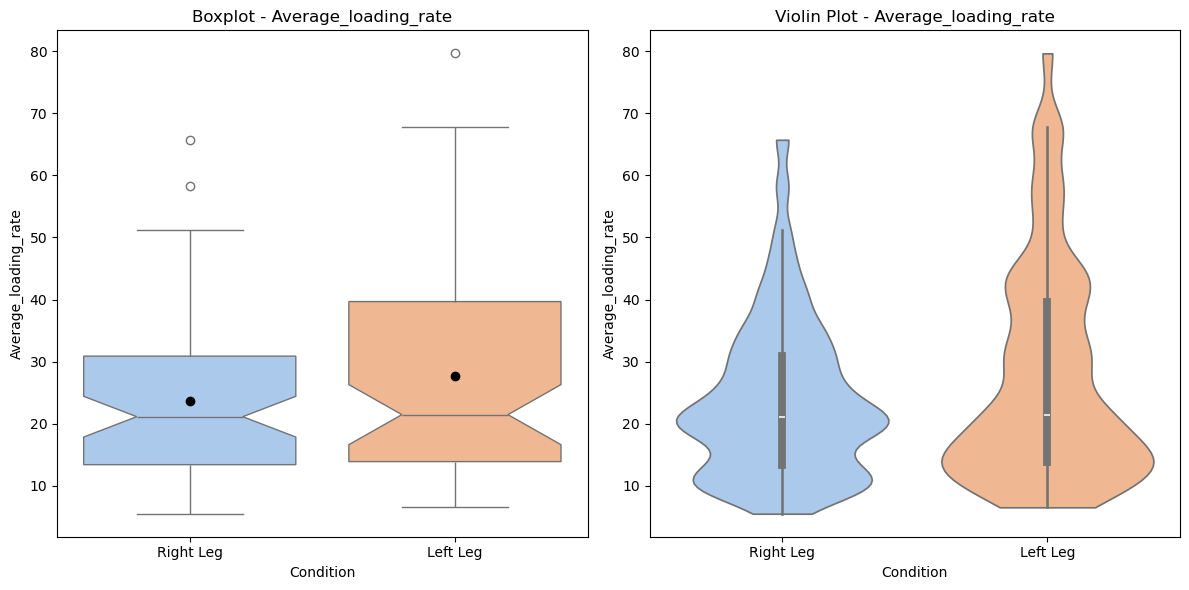

Normality p-values for Right Leg: [0.02270651978502092, 0.38025024160095, 0.32366579561073494, 0.5521980733290827, 0.48672001357771677, 0.19406204509588118, 0.7959811694884843]
Normality p-values for Left Leg: [0.5947338446453241, 0.07087152535815323, 0.3390530322214114, 0.24986783096111592, 0.16759549718692657, 0.023760336034139885, 0.19774664127471667]
Levene's test p-value: 0.28360381944456187
Performing Friedman Test for variable: Average_loading_rate
Friedman test p-value for Right Leg: 0.013830850648161787
Friedman test p-value for Left Leg: 0.0035802366970344875
Significant differences found for variable: Average_loading_rate

---------------------------------------------------------------------

Variable: Contact_Time_s - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.301,0.333,0.359,0.353,0.282,0.351,0.300
AT014,0.454,0.421,0.459,0.398,0.372,0.380,0.409
AT015,0.218,0.194,0.232,0.235,0.183,0.210,0.235
AT016,0.296,0.361,0.332,0.302,0.287,0.308,0.299
AT017,0.263,0.260,0.263,0.235,0.237,0.293,0.266
AT018,0.243,0.250,0.230,0.240,0.209,0.196,0.237
AT019,0.455,0.447,0.528,0.421,0.424,0.418,0.454
AT020,0.784,0.890,0.852,0.808,0.680,0.649,0.651
AT021,0.634,0.682,0.739,0.848,0.508,0.586,0.593
AT022,0.886,2.783,0.764,0.712,0.678,0.961,0.707


Variable: Contact_Time_s - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.279,0.308,0.270,0.280,0.295,0.293,0.264
AT014,0.391,0.422,0.420,0.430,0.401,0.414,0.398
AT015,0.194,0.218,0.213,0.199,0.181,0.198,0.164
AT016,0.334,0.350,0.863,0.368,0.301,0.236,0.263
AT017,0.258,0.288,0.259,0.262,0.213,0.272,0.232
AT018,0.236,0.245,0.218,0.225,0.217,0.233,0.214
AT019,0.512,0.557,0.537,0.531,0.450,0.443,0.486
AT020,0.664,0.812,0.802,0.720,0.590,0.607,0.646
AT021,0.604,0.540,0.542,0.574,0.561,0.602,0.555
AT022,0.576,1.401,0.754,0.735,0.643,0.598,0.730


Differences for variable: Contact_Time_s


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.022,0.025,0.089,0.073,-0.013,0.058,0.036
AT014,0.063,-0.001,0.039,-0.032,-0.029,-0.034,0.011
AT015,0.024,-0.024,0.019,0.036,0.002,0.012,0.071
AT016,-0.038,0.011,-0.531,-0.066,-0.014,0.072,0.036
AT017,0.005,-0.028,0.004,-0.027,0.024,0.021,0.034
AT018,0.007,0.005,0.012,0.015,-0.008,-0.037,0.023
AT019,-0.057,-0.110,-0.009,-0.110,-0.026,-0.025,-0.032
AT020,0.120,0.078,0.050,0.088,0.090,0.042,0.005
AT021,0.030,0.142,0.197,0.274,-0.053,-0.016,0.038
AT022,0.310,1.382,0.010,-0.023,0.035,0.363,-0.023



Comparison test results for variable: Contact_Time_s
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       13.0  0.160156  Wilcoxon           1.000000
1  Trial_2       19.0  0.431641  Wilcoxon           1.000000
2  Trial_3       12.0  0.130859  Wilcoxon           0.916016
3  Trial_4       24.0  0.769531  Wilcoxon           1.000000
4  Trial_5       24.0  0.769531  Wilcoxon           1.000000
5  Trial_6       17.0  0.322266  Wilcoxon           1.000000
6  Trial_7        9.0  0.064453  Wilcoxon           0.451172

T-Test Paired results for variable: Contact_Time_s
     Trial  Statistic   p_value
0  Trial_1   1.475996  0.174053
1  Trial_2   1.067060  0.313731
2  Trial_3  -0.197583  0.847761
3  Trial_4   0.673281  0.517683
4  Trial_5   0.062696  0.951379
5  Trial_6   1.222216  0.252669
6  Trial_7   2.047585  0.070890


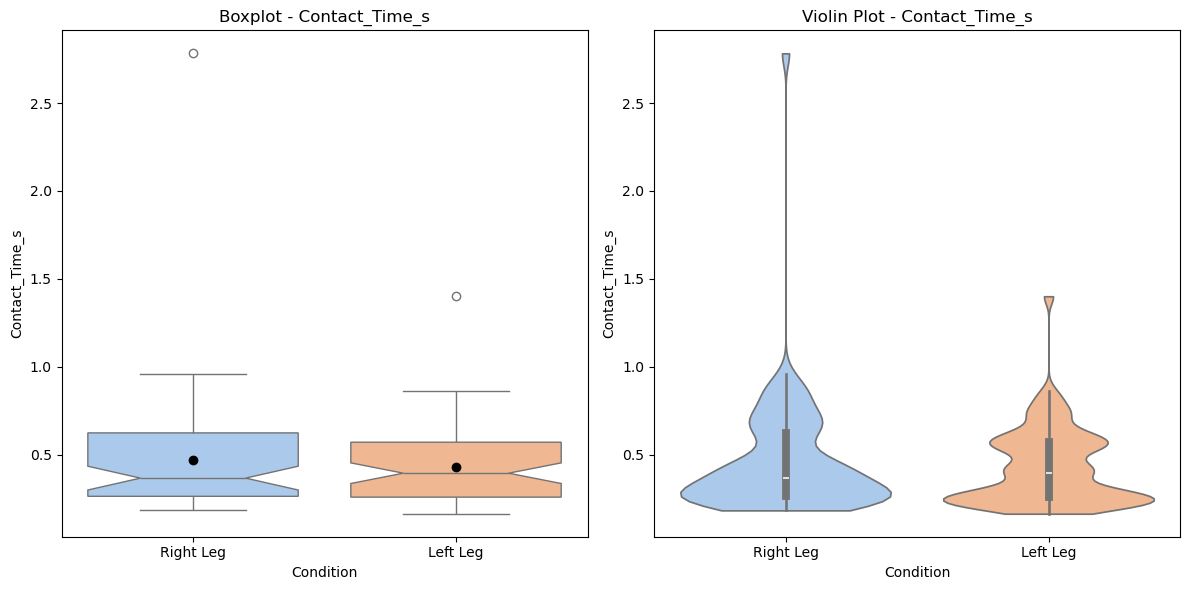

Normality p-values for Right Leg: [0.08896942385725913, 5.735567049860511e-05, 0.1408274800292361, 0.026806358042399028, 0.1491625927040486, 0.11074732574210239, 0.10618107741077243]
Normality p-values for Left Leg: [0.2910599569788668, 0.008358952544330518, 0.14857561833885424, 0.27655001466049495, 0.3002776634801001, 0.06465029903112872, 0.2667956138712952]
Levene's test p-value: 0.7664809279787063
Performing Friedman Test for variable: Contact_Time_s
Friedman test p-value for Right Leg: 0.0012551071667249042
Friedman test p-value for Left Leg: 0.00045159346263831467
Significant differences found for variable: Contact_Time_s

---------------------------------------------------------------------

Variable: High_stiffness - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.089,0.089,0.158,0.145,0.094,1.662,0.106
AT014,1.751,0.057,1.784,0.089,0.114,0.157,0.044
AT015,0.156,0.117,0.102,0.075,0.152,0.094,0.127
AT016,0.142,0.149,0.166,1.925,0.051,0.044,0.084
AT017,0.104,1.925,1.907,2.021,2.061,1.760,1.825
AT018,0.083,0.086,0.114,2.172,2.156,0.103,0.109
AT019,2.251,0.141,2.091,2.459,2.332,2.376,0.078
AT020,0.079,0.122,1.690,1.796,0.000,0.000,0.053
AT021,1.857,0.084,0.000,0.000,0.013,0.000,0.062
AT022,0.059,1.061,0.081,0.042,0.000,0.000,0.000


Variable: High_stiffness - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.198,0.082,0.091,0.079,0.017,0.117,0.134
AT014,0.052,0.086,1.826,1.872,0.103,1.032,0.073
AT015,0.088,0.108,0.087,0.048,0.102,0.162,0.091
AT016,0.100,0.000,NaN,0.057,0.079,0.072,0.116
AT017,1.712,1.798,2.015,2.066,0.163,0.084,0.123
AT018,1.901,0.078,0.096,1.927,0.088,0.074,0.172
AT019,2.215,0.147,0.096,2.199,0.039,2.323,0.108
AT020,0.071,0.127,0.175,1.817,0.046,0.000,0.044
AT021,0.112,1.883,0.067,1.926,0.000,1.827,0.103
AT022,0.063,1.269,0.030,0.000,0.000,0.057,0.030


Differences for variable: High_stiffness


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-0.109,0.007,0.067,0.066,0.077,1.545,-0.028
AT014,1.699,-0.029,-0.042,-1.783,0.011,-0.875,-0.029
AT015,0.068,0.009,0.015,0.027,0.050,-0.068,0.036
AT016,0.042,0.149,NaN,1.868,-0.028,-0.028,-0.032
AT017,-1.608,0.127,-0.108,-0.045,1.898,1.676,1.702
AT018,-1.818,0.008,0.018,0.245,2.068,0.029,-0.063
AT019,0.036,-0.006,1.995,0.260,2.293,0.053,-0.030
AT020,0.008,-0.005,1.515,-0.021,-0.046,0.000,0.009
AT021,1.745,-1.799,-0.067,-1.926,0.013,-1.827,-0.041
AT022,-0.004,-0.208,0.051,0.042,0.000,-0.057,-0.030



Comparison test results for variable: High_stiffness
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       24.0  0.769531  Wilcoxon           1.000000
1  Trial_2       27.0  1.000000  Wilcoxon           1.000000
2  Trial_3        NaN       NaN  Wilcoxon                NaN
3  Trial_4       23.0  0.695312  Wilcoxon           1.000000
4  Trial_5        7.0  0.066316  Wilcoxon           0.464212
5  Trial_6       20.0  0.767097  Wilcoxon           1.000000
6  Trial_7       18.0  0.375000  Wilcoxon           1.000000

T-Test Paired results for variable: High_stiffness
     Trial  Statistic   p_value
0  Trial_1   0.016265  0.987377
1  Trial_2  -0.954664  0.364684
2  Trial_3        NaN       NaN
3  Trial_4  -0.373539  0.717395
4  Trial_5   1.988867  0.077939
5  Trial_6   0.139428  0.892182
6  Trial_7   0.864955  0.409526


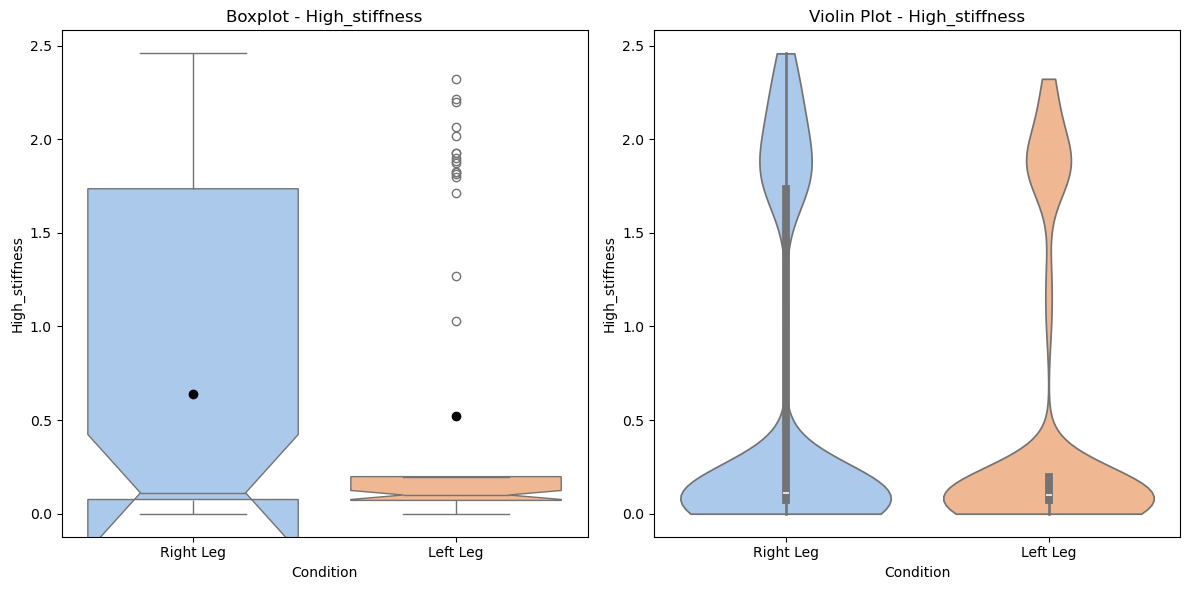

Normality p-values for Right Leg: [0.00033221766759093446, 2.9618957904205934e-05, 0.00212125293436356, 0.006434030527716776, 0.0002605296704800521, 0.0007342975310927641, 5.561776057882831e-07]
Normality p-values for Left Leg: [0.0003889283533092671, 0.0005249241637498735, nan, 0.0019402338704640485, 0.5420116144120296, 0.0007430454429826758, 0.9335156253539841]
Levene's test p-value: nan

---------------------------------------------------------------------

Variable: Imp_100ms_BW.s - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.127,0.122,0.126,0.107,0.138,0.109,0.134
AT014,0.068,0.093,0.064,0.074,0.093,0.091,0.099
AT015,0.189,0.210,0.207,0.174,0.216,0.183,0.174
AT016,0.099,0.105,0.101,0.094,0.123,0.109,0.118
AT017,0.106,0.117,0.089,0.117,0.131,0.104,0.097
AT018,0.137,0.135,0.169,0.128,0.152,0.207,0.124
AT019,0.064,0.076,0.039,0.079,0.094,0.084,0.099
AT020,0.054,0.046,0.053,0.056,0.084,0.081,0.069
AT021,0.042,0.047,0.093,0.061,0.105,0.074,0.095
AT022,0.059,0.062,0.054,0.061,0.094,0.053,0.084


Variable: Imp_100ms_BW.s - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.122,0.143,0.153,0.138,0.158,0.137,0.174
AT014,0.107,0.071,0.074,0.083,0.074,0.076,0.079
AT015,0.190,0.189,0.197,0.184,0.198,0.215,0.180
AT016,0.094,0.125,0.082,0.103,0.153,0.144,0.156
AT017,0.088,0.090,0.113,0.133,0.202,0.133,0.170
AT018,0.130,0.140,0.157,0.140,0.187,0.150,0.213
AT019,0.041,0.045,0.067,0.056,0.098,0.072,0.086
AT020,0.060,0.041,0.052,0.043,0.081,0.076,0.063
AT021,0.058,0.065,0.070,0.050,0.085,0.059,0.073
AT022,0.043,0.044,0.062,0.067,0.069,0.073,0.066


Differences for variable: Imp_100ms_BW.s


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.005,-0.021,-0.027,-0.031,-0.020,-0.028,-0.040
AT014,-0.039,0.022,-0.010,-0.009,0.019,0.015,0.020
AT015,-0.001,0.021,0.010,-0.010,0.018,-0.032,-0.006
AT016,0.005,-0.020,0.019,-0.009,-0.030,-0.035,-0.038
AT017,0.018,0.027,-0.024,-0.016,-0.071,-0.029,-0.073
AT018,0.007,-0.005,0.012,-0.012,-0.035,0.057,-0.089
AT019,0.023,0.031,-0.028,0.023,-0.004,0.012,0.013
AT020,-0.006,0.005,0.001,0.013,0.003,0.005,0.006
AT021,-0.016,-0.018,0.023,0.011,0.020,0.015,0.022
AT022,0.016,0.018,-0.008,-0.006,0.025,-0.020,0.018



Comparison test results for variable: Imp_100ms_BW.s
     Trial  Statistic   p_value           Test  corrected_p_value
0  Trial_1   0.207583  0.840175  T-Test Paired                1.0
1  Trial_2   0.924110  0.379539  T-Test Paired                1.0
2  Trial_3  -0.529619  0.609190  T-Test Paired                1.0
3  Trial_4  -0.916665  0.383224  T-Test Paired                1.0
4  Trial_5  -0.761139  0.466048  T-Test Paired                1.0
5  Trial_6  -0.424742  0.680998  T-Test Paired                1.0
6  Trial_7  -1.295560  0.227368  T-Test Paired                1.0


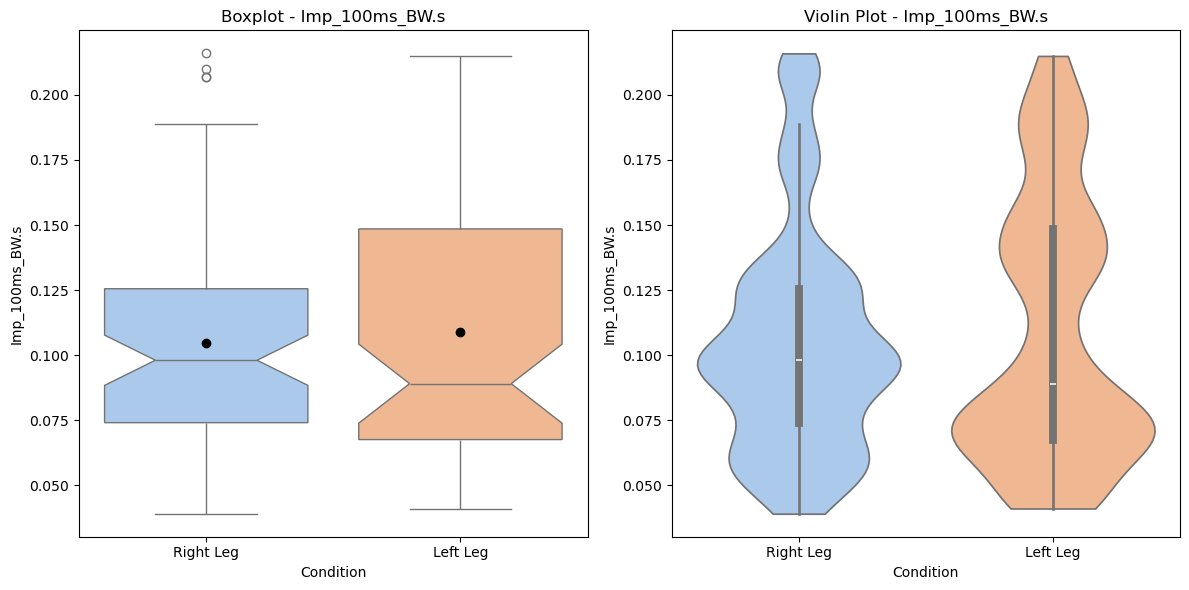

Normality p-values for Right Leg: [0.31223030446296474, 0.30337843310629425, 0.25729388805144393, 0.25728526932371154, 0.05684731470500183, 0.050120730646010025, 0.3794881572819941]
Normality p-values for Left Leg: [0.40303188743384416, 0.2394691293493568, 0.07606574287718985, 0.41139628050606997, 0.0659247219118762, 0.09352960195710332, 0.05814259306344579]
Levene's test p-value: 0.5996372389448326
Performing Repeated Measures ANOVA for variable: Imp_100ms_BW.s
Significant differences found for variable: Imp_100ms_BW.s

---------------------------------------------------------------------

Variable: Imp_40ms_BW.s - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.019,0.022,0.022,0.013,0.028,0.023,0.022
AT014,0.009,0.017,0.011,0.010,0.012,0.014,0.015
AT015,0.031,0.028,0.039,0.030,0.034,0.032,0.028
AT016,0.014,0.014,0.016,0.012,0.017,0.016,0.020
AT017,0.019,0.016,0.015,0.012,0.013,0.014,0.013
AT018,0.020,0.018,0.024,0.013,0.018,0.035,0.017
AT019,0.009,0.010,0.004,0.009,0.012,0.012,0.015
AT020,0.008,0.007,0.007,0.011,0.017,0.020,0.017
AT021,0.006,0.006,0.024,0.010,0.015,0.012,0.017
AT022,0.009,0.010,0.005,0.007,0.013,0.006,0.012


Variable: Imp_40ms_BW.s - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.016,0.027,0.024,0.021,0.030,0.037,0.046
AT014,0.029,0.010,0.013,0.018,0.011,0.011,0.012
AT015,0.030,0.026,0.032,0.039,0.038,0.047,0.043
AT016,0.014,0.024,0.007,0.018,0.023,0.020,0.027
AT017,0.013,0.021,0.011,0.016,0.021,0.024,0.024
AT018,0.015,0.020,0.023,0.019,0.030,0.021,0.030
AT019,0.004,0.006,0.010,0.007,0.015,0.010,0.012
AT020,0.010,0.006,0.009,0.008,0.017,0.019,0.012
AT021,0.011,0.013,0.012,0.009,0.015,0.012,0.013
AT022,0.007,0.007,0.008,0.010,0.010,0.010,0.008


Differences for variable: Imp_40ms_BW.s


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.003,-0.005,-0.002,-0.008,-0.002,-0.014,-0.024
AT014,-0.020,0.007,-0.002,-0.008,0.001,0.003,0.003
AT015,0.001,0.002,0.007,-0.009,-0.004,-0.015,-0.015
AT016,0.000,-0.010,0.009,-0.006,-0.006,-0.004,-0.007
AT017,0.006,-0.005,0.004,-0.004,-0.008,-0.010,-0.011
AT018,0.005,-0.002,0.001,-0.006,-0.012,0.014,-0.013
AT019,0.005,0.004,-0.006,0.002,-0.003,0.002,0.003
AT020,-0.002,0.001,-0.002,0.003,0.000,0.001,0.005
AT021,-0.005,-0.007,0.012,0.001,0.000,0.000,0.004
AT022,0.002,0.003,-0.003,-0.003,0.003,-0.004,0.004



Comparison test results for variable: Imp_40ms_BW.s
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       17.5  0.553269  Wilcoxon           1.000000
1  Trial_2       21.5  0.556641  Wilcoxon           1.000000
2  Trial_3       21.0  0.556641  Wilcoxon           1.000000
3  Trial_4        6.0  0.027344  Wilcoxon           0.191406
4  Trial_5        4.5  0.058398  Wilcoxon           0.408785
5  Trial_6       14.0  0.313513  Wilcoxon           1.000000
6  Trial_7       15.0  0.232422  Wilcoxon           1.000000

T-Test Paired results for variable: Imp_40ms_BW.s
     Trial  Statistic   p_value
0  Trial_1  -0.206725  0.840826
1  Trial_2  -0.695920  0.504052
2  Trial_3   0.961225  0.361551
3  Trial_4  -2.720462  0.023590
4  Trial_5  -2.151188  0.059921
5  Trial_6  -0.975055  0.355011
6  Trial_7  -1.565714  0.151856


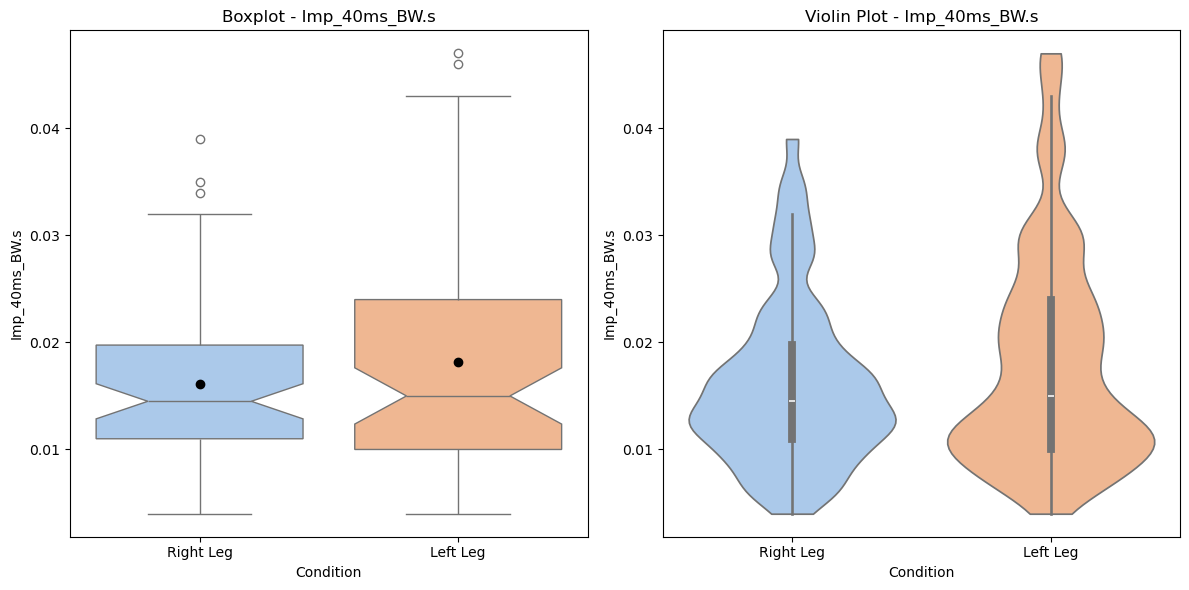

Normality p-values for Right Leg: [0.104229476375158, 0.7309467023644922, 0.4285175837193748, 0.0002503269926148231, 0.008285150063452007, 0.2894322575139473, 0.2405337265560989]
Normality p-values for Left Leg: [0.1308626098759642, 0.11824576757947125, 0.035097374360929676, 0.03983301792250327, 0.4595090453845805, 0.05281476261069969, 0.08691168089236755]
Levene's test p-value: 0.2407627056402514
Performing Friedman Test for variable: Imp_40ms_BW.s
Friedman test p-value for Right Leg: 0.01590624697688405
Friedman test p-value for Left Leg: 0.0005947268122919724
Significant differences found for variable: Imp_40ms_BW.s

---------------------------------------------------------------------

Variable: Imp_Brake_VMax_BW.s - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.251,0.287,0.362,0.321,0.308,0.380,0.254
AT014,0.388,0.351,0.421,0.323,0.247,0.294,0.310
AT015,0.145,0.152,0.156,0.205,0.119,0.146,0.130
AT016,0.208,0.302,0.262,0.167,0.156,0.141,0.229
AT017,0.186,0.214,0.234,0.172,0.214,0.263,0.147
AT018,0.174,0.169,0.157,0.222,0.198,0.197,0.172
AT019,0.417,0.440,0.366,0.441,0.404,0.305,0.215
AT020,0.761,0.936,0.881,0.918,0.737,0.696,0.461
AT021,0.536,0.511,0.767,0.641,0.526,0.446,0.453
AT022,0.947,2.779,0.744,0.613,0.553,0.464,0.541


Variable: Imp_Brake_VMax_BW.s - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.231,0.262,0.242,0.287,0.292,0.298,0.213
AT014,0.347,0.354,0.384,0.415,0.321,0.347,0.318
AT015,0.164,0.112,0.103,0.132,0.131,0.108,0.092
AT016,0.314,0.171,0.791,0.357,0.242,0.133,0.239
AT017,0.188,0.199,0.271,0.273,0.162,0.233,0.170
AT018,0.196,0.175,0.148,0.184,0.149,0.141,0.162
AT019,0.251,0.439,0.408,0.469,0.243,0.277,0.240
AT020,0.284,0.715,0.761,0.674,0.611,0.524,0.587
AT021,0.500,0.457,0.420,0.462,0.503,0.531,0.461
AT022,0.430,1.333,0.702,0.730,0.611,0.558,0.546


Differences for variable: Imp_Brake_VMax_BW.s


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.020,0.025,0.120,0.034,0.016,0.082,0.041
AT014,0.041,-0.003,0.037,-0.092,-0.074,-0.053,-0.008
AT015,-0.019,0.040,0.053,0.073,-0.012,0.038,0.038
AT016,-0.106,0.131,-0.529,-0.190,-0.086,0.008,-0.010
AT017,-0.002,0.015,-0.037,-0.101,0.052,0.030,-0.023
AT018,-0.022,-0.006,0.009,0.038,0.049,0.056,0.010
AT019,0.166,0.001,-0.042,-0.028,0.161,0.028,-0.025
AT020,0.477,0.221,0.120,0.244,0.126,0.172,-0.126
AT021,0.036,0.054,0.347,0.179,0.023,-0.085,-0.008
AT022,0.517,1.446,0.042,-0.117,-0.058,-0.094,-0.005



Comparison test results for variable: Imp_Brake_VMax_BW.s
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       14.0  0.193359  Wilcoxon           1.000000
1  Trial_2        5.0  0.019531  Wilcoxon           0.136719
2  Trial_3       17.0  0.322266  Wilcoxon           1.000000
3  Trial_4       27.0  1.000000  Wilcoxon           1.000000
4  Trial_5       22.0  0.625000  Wilcoxon           1.000000
5  Trial_6       22.0  0.625000  Wilcoxon           1.000000
6  Trial_7       21.5  0.556641  Wilcoxon           1.000000

T-Test Paired results for variable: Imp_Brake_VMax_BW.s
     Trial  Statistic   p_value
0  Trial_1   1.631551  0.137210
1  Trial_2   1.363449  0.205870
2  Trial_3   0.172257  0.867046
3  Trial_4   0.092422  0.928388
4  Trial_5   0.761797  0.465674
5  Trial_6   0.715740  0.492303
6  Trial_7  -0.794977  0.447084


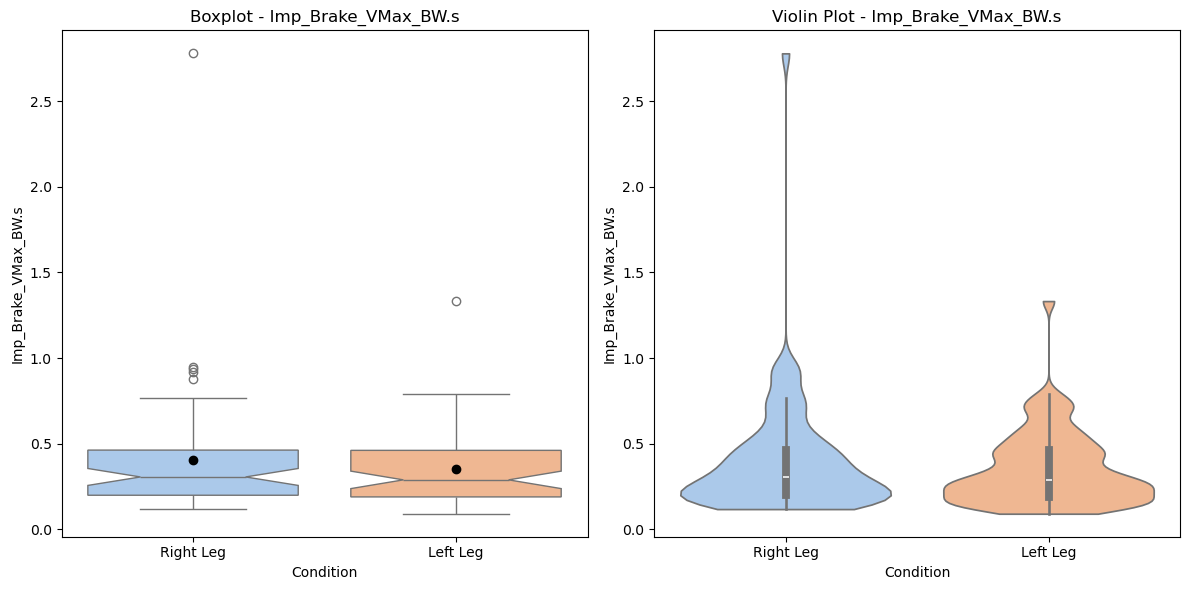

Normality p-values for Right Leg: [0.07947857248130771, 5.3691091060736986e-05, 0.09517474218944738, 0.10410398556656789, 0.30834325044855493, 0.3816919293134133, 0.18920783643903846]
Normality p-values for Left Leg: [0.43714015088035496, 0.007785622832552736, 0.25363304342198195, 0.6724147769401345, 0.07523581341725873, 0.17426390229498737, 0.19880894570797067]
Levene's test p-value: 0.54747568174206
Performing Friedman Test for variable: Imp_Brake_VMax_BW.s
Friedman test p-value for Right Leg: 0.008629398985378704
Friedman test p-value for Left Leg: 0.00939566310551534
Significant differences found for variable: Imp_Brake_VMax_BW.s

---------------------------------------------------------------------

Variable: Imp_ITransient_BW.s - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.022,0.025,0.042,0.019,0.017,0.009,0.042
AT014,0.144,0.004,0.004,0.122,0.131,0.002,0.163
AT015,0.092,0.076,0.102,0.090,0.071,0.087,0.082
AT016,0.086,0.135,0.113,0.086,0.098,0.087,0.072
AT017,0.003,0.078,0.062,0.052,0.067,0.049,0.063
AT018,0.079,0.081,0.089,0.067,0.064,0.091,0.066
AT019,0.152,0.167,0.162,0.154,0.172,0.157,0.126
AT020,0.220,0.141,0.187,0.119,0.135,0.169,0.170
AT021,0.193,0.009,0.198,0.150,0.241,0.254,0.289
AT022,0.174,0.129,0.171,0.135,0.110,0.063,0.080


Variable: Imp_ITransient_BW.s - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.024,0.022,0.039,0.025,0.015,0.111,0.022
AT014,0.064,0.004,0.132,0.004,0.124,0.135,0.003
AT015,0.074,0.067,0.065,0.006,0.077,0.072,0.063
AT016,0.081,0.118,0.036,0.091,0.045,0.075,0.042
AT017,0.002,0.038,0.054,0.054,0.042,0.003,0.068
AT018,0.067,0.085,0.004,0.069,0.097,0.079,0.059
AT019,0.131,0.106,0.209,0.199,0.150,0.163,0.143
AT020,0.181,0.112,0.123,0.125,0.135,0.225,0.092
AT021,0.207,0.183,0.208,0.175,0.213,0.008,0.224
AT022,0.005,0.190,0.164,0.102,0.105,0.100,0.004


Differences for variable: Imp_ITransient_BW.s


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-0.002,0.003,0.003,-0.006,0.002,-0.102,0.020
AT014,0.080,0.000,-0.128,0.118,0.007,-0.133,0.160
AT015,0.018,0.009,0.037,0.084,-0.006,0.015,0.019
AT016,0.005,0.017,0.077,-0.005,0.053,0.012,0.030
AT017,0.001,0.040,0.008,-0.002,0.025,0.046,-0.005
AT018,0.012,-0.004,0.085,-0.002,-0.033,0.012,0.007
AT019,0.021,0.061,-0.047,-0.045,0.022,-0.006,-0.017
AT020,0.039,0.029,0.064,-0.006,0.000,-0.056,0.078
AT021,-0.014,-0.174,-0.010,-0.025,0.028,0.246,0.065
AT022,0.169,-0.061,0.007,0.033,0.005,-0.037,0.076



Comparison test results for variable: Imp_ITransient_BW.s
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1        7.0  0.037109  Wilcoxon           0.259766
1  Trial_2       18.0  0.593955  Wilcoxon           1.000000
2  Trial_3       20.0  0.492188  Wilcoxon           1.000000
3  Trial_4       26.0  0.921875  Wilcoxon           1.000000
4  Trial_5       11.0  0.173071  Wilcoxon           1.000000
5  Trial_6       25.0  0.845703  Wilcoxon           1.000000
6  Trial_7        4.0  0.013672  Wilcoxon           0.095703

T-Test Paired results for variable: Imp_ITransient_BW.s
     Trial  Statistic   p_value
0  Trial_1   1.906809  0.088914
1  Trial_2  -0.379882  0.712842
2  Trial_3   0.476620  0.644992
3  Trial_4   0.905710  0.388693
4  Trial_5   1.403951  0.193887
5  Trial_6  -0.009196  0.992863
6  Trial_7   2.600076  0.028735


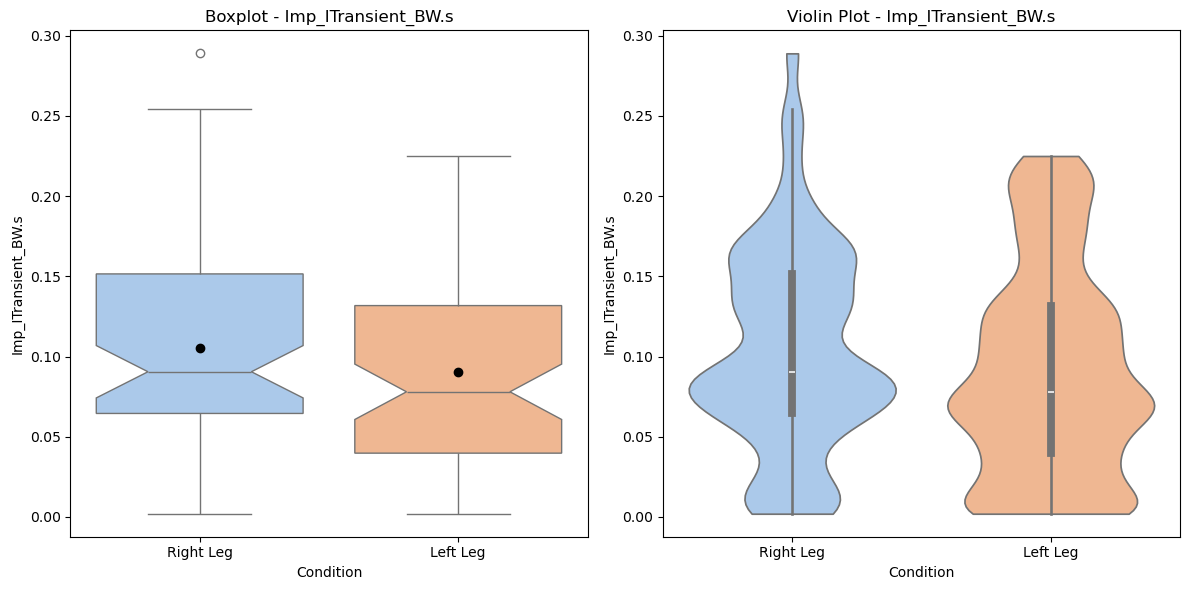

Normality p-values for Right Leg: [0.7555475896369591, 0.35461066625311916, 0.6758597765402868, 0.6785597870614035, 0.7466045650323676, 0.4408649229848773, 0.033759496049566955]
Normality p-values for Left Leg: [0.3114808956158279, 0.6483765223599971, 0.32858604813826997, 0.577767910311823, 0.9300216941928373, 0.757758427866963, 0.11699697366275105]
Levene's test p-value: 0.995254070914147

---------------------------------------------------------------------

Variable: Imp_Propulsion_BW.s - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.195,0.217,0.188,0.219,0.169,0.146,0.210
AT014,0.297,0.316,0.276,0.269,0.396,0.340,0.352
AT015,0.226,0.207,0.252,0.203,0.205,0.195,0.227
AT016,0.227,0.238,0.241,0.316,0.293,0.335,0.194
AT017,0.200,0.208,0.169,0.205,0.187,0.175,0.249
AT018,0.199,0.201,0.201,0.201,0.174,0.164,0.180
AT019,0.433,0.409,0.546,0.420,0.442,0.530,0.676
AT020,0.407,0.357,0.408,0.362,0.437,0.417,0.617
AT021,0.458,0.566,0.397,0.622,0.375,0.550,0.528
AT022,0.267,0.307,0.321,0.505,0.509,0.884,0.524


Variable: Imp_Propulsion_BW.s - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.183,0.200,0.190,0.172,0.206,0.183,0.240
AT014,0.290,0.287,0.270,0.281,0.293,0.314,0.289
AT015,0.178,0.249,0.210,0.180,0.143,0.201,0.148
AT016,0.156,0.335,0.169,0.132,0.200,0.225,0.160
AT017,0.171,0.231,0.149,0.183,0.223,0.189,0.211
AT018,0.179,0.213,0.183,0.182,0.216,0.223,0.196
AT019,0.676,0.539,0.537,0.518,0.652,0.586,0.676
AT020,0.693,0.423,0.394,0.444,0.414,0.491,0.431
AT021,0.463,0.418,0.451,0.467,0.456,0.433,0.458
AT022,0.401,0.358,0.425,0.433,0.413,0.411,0.540


Differences for variable: Imp_Propulsion_BW.s


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.012,0.017,-0.002,0.047,-0.037,-0.037,-0.030
AT014,0.007,0.029,0.006,-0.012,0.103,0.026,0.063
AT015,0.048,-0.042,0.042,0.023,0.062,-0.006,0.079
AT016,0.071,-0.097,0.072,0.184,0.093,0.110,0.034
AT017,0.029,-0.023,0.020,0.022,-0.036,-0.014,0.038
AT018,0.020,-0.012,0.018,0.019,-0.042,-0.059,-0.016
AT019,-0.243,-0.130,0.009,-0.098,-0.210,-0.056,0.000
AT020,-0.286,-0.066,0.014,-0.082,0.023,-0.074,0.186
AT021,-0.005,0.148,-0.054,0.155,-0.081,0.117,0.070
AT022,-0.134,-0.051,-0.104,0.072,0.096,0.473,-0.016



Comparison test results for variable: Imp_Propulsion_BW.s
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       27.0  1.000000  Wilcoxon            1.00000
1  Trial_2       16.0  0.275391  Wilcoxon            1.00000
2  Trial_3       19.0  0.431641  Wilcoxon            1.00000
3  Trial_4       16.0  0.275391  Wilcoxon            1.00000
4  Trial_5       25.0  0.845703  Wilcoxon            1.00000
5  Trial_6       25.0  0.845703  Wilcoxon            1.00000
6  Trial_7        6.0  0.050410  Wilcoxon            0.35287

T-Test Paired results for variable: Imp_Propulsion_BW.s
     Trial  Statistic   p_value
0  Trial_1  -1.200547  0.260571
1  Trial_2  -0.930313  0.376488
2  Trial_3   0.135314  0.895342
3  Trial_4   1.164867  0.274018
4  Trial_5  -0.092820  0.928080
5  Trial_6   0.927878  0.377684
6  Trial_7   2.010299  0.075292


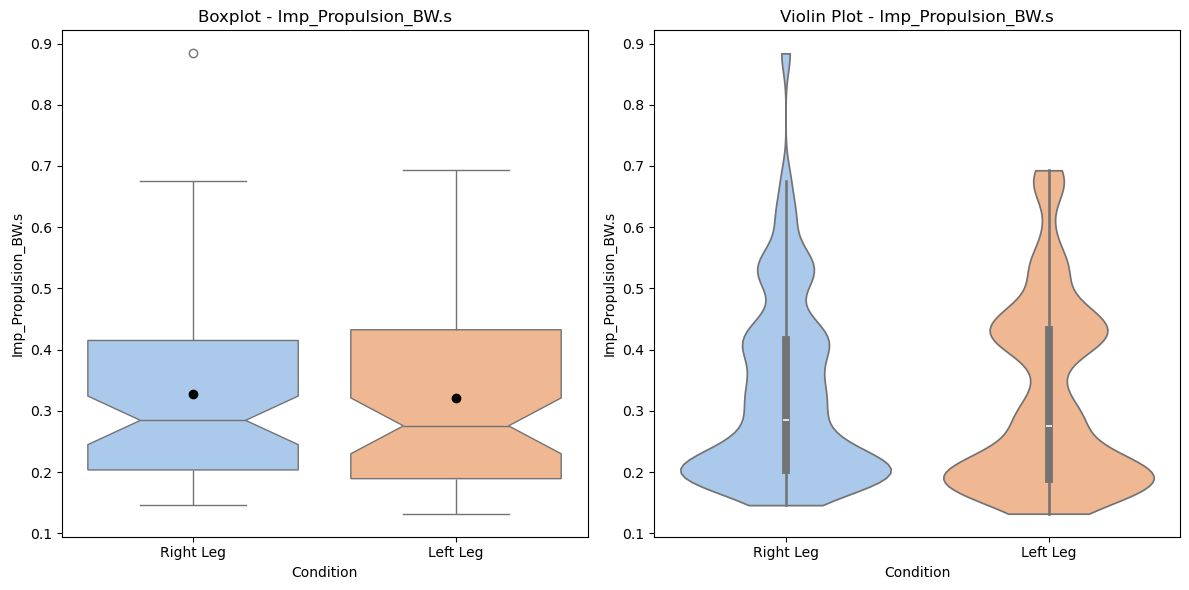

Normality p-values for Right Leg: [0.03181320350220387, 0.04592885614687511, 0.2924539727869531, 0.10312678601202116, 0.16109008926805374, 0.12022076964345232, 0.06911635703625776]
Normality p-values for Left Leg: [0.017726741082904802, 0.4424087793938844, 0.1129034497207239, 0.03998227297801004, 0.16058693729431225, 0.11371752623137203, 0.1934864725312039]
Levene's test p-value: 0.6113260226659005

---------------------------------------------------------------------

Variable: Low_stiffness - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,1.784,1.766,1.841,1.754,1.918,0.119,1.856
AT014,0.047,1.909,0.195,1.817,2.059,2.005,1.945
AT015,2.147,2.284,2.278,2.100,2.207,2.005,1.941
AT016,1.746,1.799,1.789,0.216,1.842,1.793,1.683
AT017,1.776,0.051,0.257,0.263,0.127,0.265,0.299
AT018,1.872,1.843,2.024,0.187,0.233,2.274,1.786
AT019,0.235,2.268,0.165,0.136,0.112,0.247,2.329
AT020,1.729,1.648,0.000,0.605,1.922,1.921,1.972
AT021,0.169,1.829,1.816,1.650,2.062,1.947,2.015
AT022,1.538,1.389,1.658,1.776,1.880,1.550,1.755


Variable: Low_stiffness - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,1.807,1.832,1.948,1.898,1.947,1.882,2.119
AT014,1.924,1.815,0.227,0.362,1.821,2.168,1.836
AT015,2.130,2.080,2.001,1.937,2.000,2.170,1.810
AT016,1.680,1.706,NaN,1.559,1.833,1.824,1.882
AT017,0.249,0.439,0.223,0.148,2.293,1.894,2.048
AT018,0.171,1.885,1.860,0.275,2.112,1.933,2.270
AT019,0.243,2.104,2.029,0.197,2.292,0.255,2.278
AT020,1.812,1.631,1.666,0.323,1.988,1.898,1.904
AT021,1.867,0.282,1.902,0.246,1.946,0.247,1.987
AT022,1.734,0.132,1.675,1.736,1.823,1.915,1.765


Differences for variable: Low_stiffness


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-0.023,-0.066,-0.107,-0.144,-0.029,-1.763,-0.263
AT014,-1.877,0.094,-0.032,1.455,0.238,-0.163,0.109
AT015,0.017,0.204,0.277,0.163,0.207,-0.165,0.131
AT016,0.066,0.093,NaN,-1.343,0.009,-0.031,-0.199
AT017,1.527,-0.388,0.034,0.115,-2.166,-1.629,-1.749
AT018,1.701,-0.042,0.164,-0.088,-1.879,0.341,-0.484
AT019,-0.008,0.164,-1.864,-0.061,-2.180,-0.008,0.051
AT020,-0.083,0.017,-1.666,0.282,-0.066,0.023,0.068
AT021,-1.698,1.547,-0.086,1.404,0.116,1.700,0.028
AT022,-0.196,1.257,-0.017,0.040,0.057,-0.365,-0.010



Comparison test results for variable: Low_stiffness
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       22.0  0.625000  Wilcoxon                1.0
1  Trial_2       13.0  0.160156  Wilcoxon                1.0
2  Trial_3        NaN       NaN  Wilcoxon                NaN
3  Trial_4       18.0  0.375000  Wilcoxon                1.0
4  Trial_5       22.0  0.625000  Wilcoxon                1.0
5  Trial_6       17.0  0.322266  Wilcoxon                1.0
6  Trial_7       20.0  0.492188  Wilcoxon                1.0

T-Test Paired results for variable: Low_stiffness
     Trial  Statistic   p_value
0  Trial_1  -0.159547  0.876761
1  Trial_2   1.484640  0.171797
2  Trial_3        NaN       NaN
3  Trial_4   0.723583  0.487701
4  Trial_5  -1.720414  0.119468
5  Trial_6  -0.669045  0.520258
6  Trial_7  -1.290910  0.228907


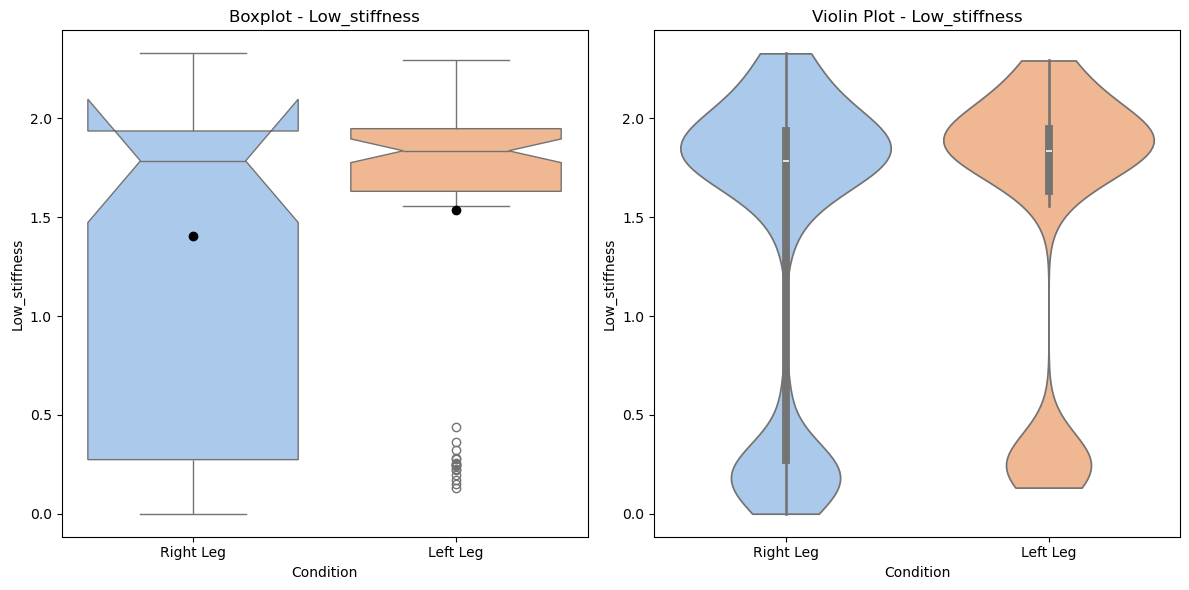

Normality p-values for Right Leg: [0.0051571604241397295, 0.003564763690598343, 0.015158743136463369, 0.014870686719575628, 0.0010309832243800647, 0.006789690483552765, 0.0005139714411675165]
Normality p-values for Left Leg: [0.00208678856014705, 0.007368619932676038, nan, 0.0034191884928553525, 0.09245222986238966, 0.00019436377400147695, 0.3137748957346226]
Levene's test p-value: nan

---------------------------------------------------------------------

Variable: Peak_VIP_BW - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,2.606,2.275,2.024,2.254,2.147,0.749,2.010
AT014,2.293,0.982,0.587,2.469,3.232,0.382,2.646
AT015,3.188,3.664,3.278,2.849,3.577,2.887,2.956
AT016,2.456,2.291,2.190,2.814,2.840,2.740,2.190
AT017,0.781,2.548,2.235,2.947,2.757,2.100,3.054
AT018,2.760,2.818,3.134,2.756,2.603,3.035,2.555
AT019,3.099,3.148,3.043,3.296,3.181,3.479,3.449
AT020,2.110,2.253,2.163,2.514,2.523,2.385,2.634
AT021,2.181,0.705,2.200,1.994,2.481,2.481,2.655
AT022,2.085,2.314,2.087,2.262,2.561,2.036,1.889


Variable: Peak_VIP_BW - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,1.894,2.687,2.418,2.235,2.925,2.122,2.240
AT014,1.824,0.726,2.302,0.690,2.474,2.475,0.410
AT015,3.111,3.150,3.119,0.910,2.932,3.032,2.426
AT016,2.746,2.277,2.040,2.148,2.655,2.771,2.388
AT017,0.409,1.182,3.366,2.673,3.156,0.598,3.023
AT018,2.567,2.623,0.583,2.590,2.949,2.887,3.285
AT019,3.429,3.179,2.785,2.720,3.217,3.348,3.350
AT020,2.522,2.251,2.273,2.191,2.525,2.403,2.727
AT021,2.547,2.513,2.588,2.505,2.430,0.485,2.717
AT022,0.411,2.050,2.053,2.036,2.955,2.285,0.533


Differences for variable: Peak_VIP_BW


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.712,-0.412,-0.394,0.019,-0.778,-1.373,-0.230
AT014,0.469,0.256,-1.715,1.779,0.758,-2.093,2.236
AT015,0.077,0.514,0.159,1.939,0.645,-0.145,0.530
AT016,-0.290,0.014,0.150,0.666,0.185,-0.031,-0.198
AT017,0.372,1.366,-1.131,0.274,-0.399,1.502,0.031
AT018,0.193,0.195,2.551,0.166,-0.346,0.148,-0.730
AT019,-0.330,-0.031,0.258,0.576,-0.036,0.131,0.099
AT020,-0.412,0.002,-0.110,0.323,-0.002,-0.018,-0.093
AT021,-0.366,-1.808,-0.388,-0.511,0.051,1.996,-0.062
AT022,1.674,0.264,0.034,0.226,-0.394,-0.249,1.356



Comparison test results for variable: Peak_VIP_BW
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       19.0  0.431641  Wilcoxon           1.000000
1  Trial_2       20.0  0.492188  Wilcoxon           1.000000
2  Trial_3       23.0  0.695312  Wilcoxon           1.000000
3  Trial_4        6.0  0.027344  Wilcoxon           0.191406
4  Trial_5       24.0  0.769531  Wilcoxon           1.000000
5  Trial_6       25.0  0.845703  Wilcoxon           1.000000
6  Trial_7       24.0  0.769531  Wilcoxon           1.000000

T-Test Paired results for variable: Peak_VIP_BW
     Trial  Statistic   p_value
0  Trial_1   1.025992  0.331680
1  Trial_2   0.142672  0.889692
2  Trial_3  -0.166659  0.871322
3  Trial_4   2.261238  0.050075
4  Trial_5  -0.208962  0.839131
5  Trial_6  -0.035240  0.972657
6  Trial_7   1.061148  0.316267


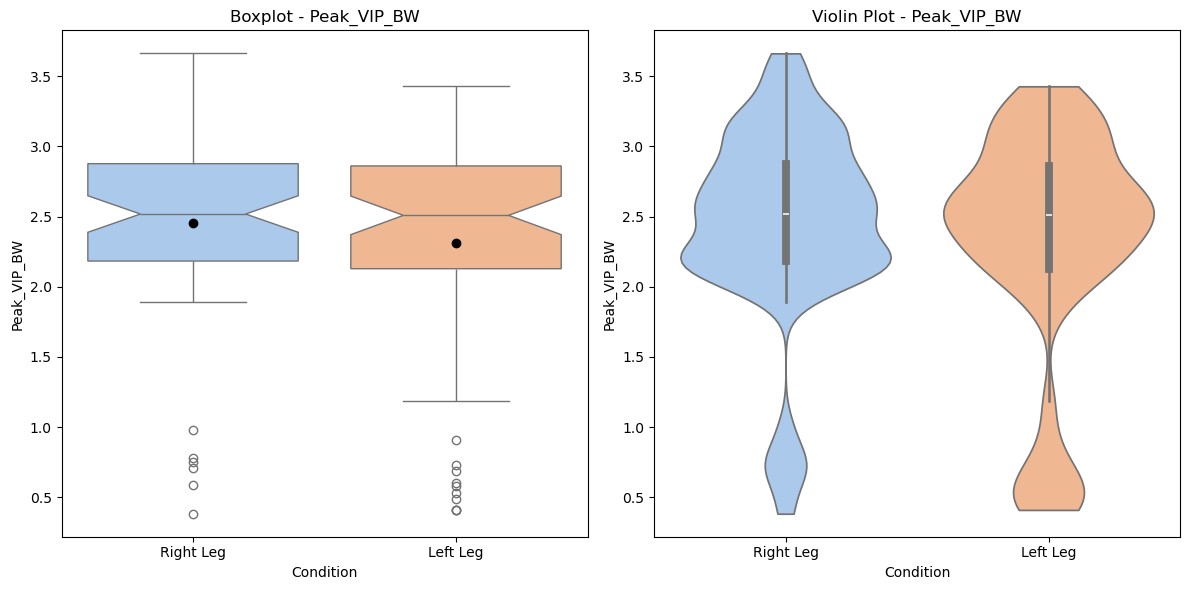

Normality p-values for Right Leg: [0.15224287986202795, 0.31787577523008176, 0.057750283560899285, 0.9472067155799286, 0.6899493026482784, 0.23210839727368754, 0.8028180329950897]
Normality p-values for Left Leg: [0.11824171929485877, 0.2501676606035637, 0.18031687395352053, 0.015256152291566379, 0.2487605542606779, 0.05146462540490214, 0.02410781257838478]
Levene's test p-value: 0.5847394020366586

---------------------------------------------------------------------

Variable: Peak_VITransient_BW - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,1.329,1.594,1.728,1.318,1.562,0.685,1.821
AT014,1.946,0.683,0.481,2.052,2.343,0.351,2.332
AT015,2.901,2.913,2.921,2.601,3.110,2.581,2.664
AT016,2.033,2.179,2.080,2.086,2.389,2.099,1.910
AT017,0.704,1.950,1.369,1.776,2.223,1.600,1.781
AT018,2.196,2.282,2.637,2.239,2.192,2.890,1.974
AT019,2.434,2.615,2.466,2.587,2.569,2.658,2.721
AT020,1.968,1.559,1.663,1.467,1.983,2.248,2.403
AT021,2.029,0.554,2.065,1.789,2.300,2.374,2.508
AT022,1.863,1.658,1.694,1.676,1.973,1.337,1.726


Variable: Peak_VITransient_BW - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,1.435,1.701,1.943,1.682,2.091,1.938,2.001
AT014,1.506,0.522,1.964,0.648,2.052,2.098,0.384
AT015,2.546,2.845,2.803,0.887,2.677,2.900,2.324
AT016,1.959,2.127,1.399,1.925,2.134,2.404,2.018
AT017,0.374,1.126,1.904,1.906,2.813,0.575,2.564
AT018,2.097,2.246,0.560,2.068,2.763,2.389,3.007
AT019,2.635,2.297,2.651,2.587,2.645,2.803,2.737
AT020,2.190,1.519,1.437,1.605,2.008,2.374,2.035
AT021,2.155,2.102,2.309,2.057,2.346,0.467,2.467
AT022,0.379,1.706,1.582,1.736,1.189,1.822,0.447


Differences for variable: Peak_VITransient_BW


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-0.106,-0.107,-0.215,-0.364,-0.529,-1.253,-0.180
AT014,0.440,0.161,-1.483,1.404,0.291,-1.747,1.948
AT015,0.355,0.068,0.118,1.714,0.433,-0.319,0.340
AT016,0.074,0.052,0.681,0.161,0.255,-0.305,-0.108
AT017,0.330,0.824,-0.535,-0.130,-0.590,1.025,-0.783
AT018,0.099,0.036,2.077,0.171,-0.571,0.501,-1.033
AT019,-0.201,0.318,-0.185,0.000,-0.076,-0.145,-0.016
AT020,-0.222,0.040,0.226,-0.138,-0.025,-0.126,0.368
AT021,-0.126,-1.548,-0.244,-0.268,-0.046,1.907,0.041
AT022,1.484,-0.048,0.112,-0.060,0.784,-0.485,1.279



Comparison test results for variable: Peak_VITransient_BW
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       18.0  0.375000  Wilcoxon                1.0
1  Trial_2       19.0  0.431641  Wilcoxon                1.0
2  Trial_3       26.0  0.921875  Wilcoxon                1.0
3  Trial_4       19.0  0.678402  Wilcoxon                1.0
4  Trial_5       25.0  0.845703  Wilcoxon                1.0
5  Trial_6       23.0  0.695312  Wilcoxon                1.0
6  Trial_7       23.0  0.695312  Wilcoxon                1.0

T-Test Paired results for variable: Peak_VITransient_BW
     Trial  Statistic   p_value
0  Trial_1   1.327520  0.217023
1  Trial_2  -0.107815  0.916508
2  Trial_3   0.191856  0.852114
3  Trial_4   1.102827  0.298717
4  Trial_5  -0.050746  0.960636
5  Trial_6  -0.284992  0.782100
6  Trial_7   0.662516  0.524242


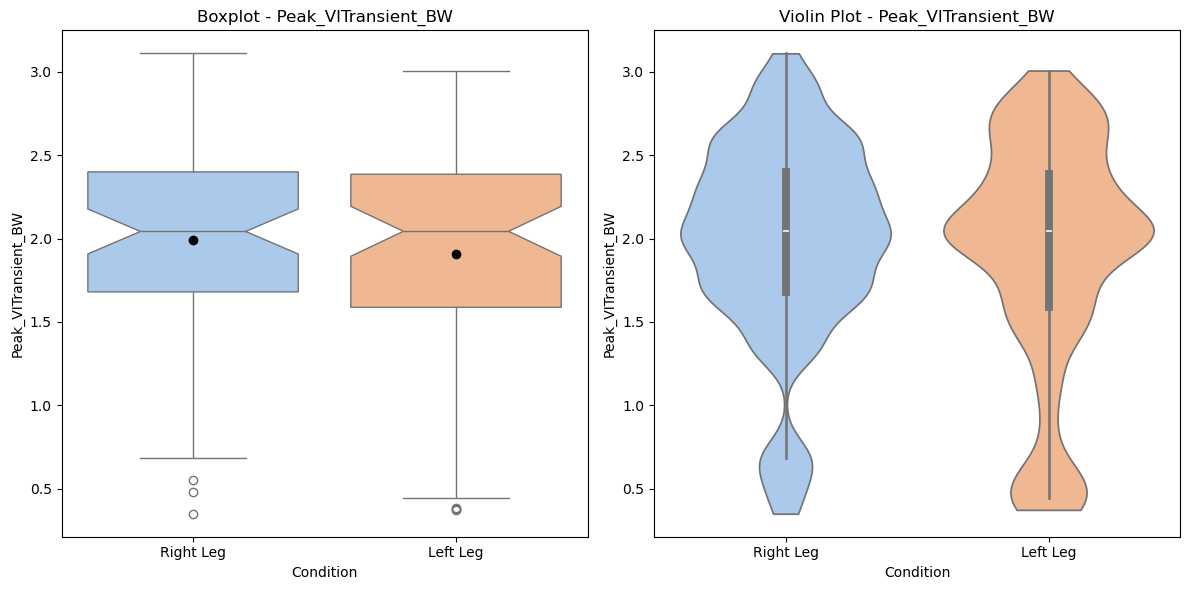

Normality p-values for Right Leg: [0.3955213367655221, 0.6694908940432895, 0.759396821519423, 0.6872484499687959, 0.6874557103488874, 0.31990388400928005, 0.1764594516647769]
Normality p-values for Left Leg: [0.09623330493948501, 0.8156471427646286, 0.791224656444844, 0.3164596735519686, 0.1485333461653862, 0.058601702315658394, 0.03167136316625984]
Levene's test p-value: 0.6898731286588503
Performing Friedman Test for variable: Peak_VITransient_BW
Friedman test p-value for Right Leg: 0.13852654938079598
Friedman test p-value for Left Leg: 0.017459798405899674
Significant differences found for variable: Peak_VITransient_BW

---------------------------------------------------------------------

Variable: Peak_VMax_BW - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,2.477,2.345,2.397,2.299,2.493,2.191,2.527
AT014,2.622,2.724,2.658,2.827,3.327,3.189,2.729
AT015,3.188,3.741,3.278,2.833,3.577,2.896,2.956
AT016,2.698,2.473,2.667,2.868,2.840,2.740,2.259
AT017,3.172,3.287,3.307,3.327,3.215,2.475,3.445
AT018,2.948,2.888,3.158,3.306,3.098,3.098,2.843
AT019,3.548,3.556,3.180,3.523,3.341,3.538,3.449
AT020,2.339,2.246,2.238,2.188,2.338,2.345,2.581
AT021,2.770,2.531,2.160,1.974,2.666,2.528,2.672
AT022,2.004,2.280,2.138,2.200,2.191,1.863,2.154


Variable: Peak_VMax_BW - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,2.659,2.352,2.685,2.521,2.331,2.477,2.786
AT014,2.698,2.733,2.723,2.692,2.748,2.726,2.747
AT015,3.277,3.150,3.119,2.849,2.965,3.032,2.426
AT016,2.175,2.277,2.138,1.822,2.265,2.777,2.481
AT017,3.190,3.055,2.840,2.908,3.369,2.718,2.977
AT018,2.977,2.705,2.791,2.956,2.949,2.901,3.278
AT019,3.429,3.085,2.799,2.933,3.217,3.348,3.350
AT020,2.522,2.274,2.145,2.449,2.547,2.338,2.425
AT021,2.768,2.791,2.678,2.770,2.418,2.464,2.783
AT022,2.650,2.085,2.079,2.091,2.353,2.495,2.283


Differences for variable: Peak_VMax_BW


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-0.182,-0.007,-0.288,-0.222,0.162,-0.286,-0.259
AT014,-0.076,-0.009,-0.065,0.135,0.579,0.463,-0.018
AT015,-0.089,0.591,0.159,-0.016,0.612,-0.136,0.530
AT016,0.523,0.196,0.529,1.046,0.575,-0.037,-0.222
AT017,-0.018,0.232,0.467,0.419,-0.154,-0.243,0.468
AT018,-0.029,0.183,0.367,0.350,0.149,0.197,-0.435
AT019,0.119,0.471,0.381,0.590,0.124,0.190,0.099
AT020,-0.183,-0.028,0.093,-0.261,-0.209,0.007,0.156
AT021,0.002,-0.260,-0.518,-0.796,0.248,0.064,-0.111
AT022,-0.646,0.195,0.059,0.109,-0.162,-0.632,-0.129



Comparison test results for variable: Peak_VMax_BW
     Trial  Statistic   p_value           Test  corrected_p_value
0  Trial_1  -0.633014  0.542472  T-Test Paired           1.000000
1  Trial_2   1.984894  0.078439  T-Test Paired           0.549073
2  Trial_3   1.106495  0.297210  T-Test Paired           1.000000
3  Trial_4   0.840015  0.422653  T-Test Paired           1.000000
4  Trial_5   1.935651  0.084900  T-Test Paired           0.594298
5  Trial_6  -0.428389  0.678438  T-Test Paired           1.000000
6  Trial_7   0.080429  0.937657  T-Test Paired           1.000000


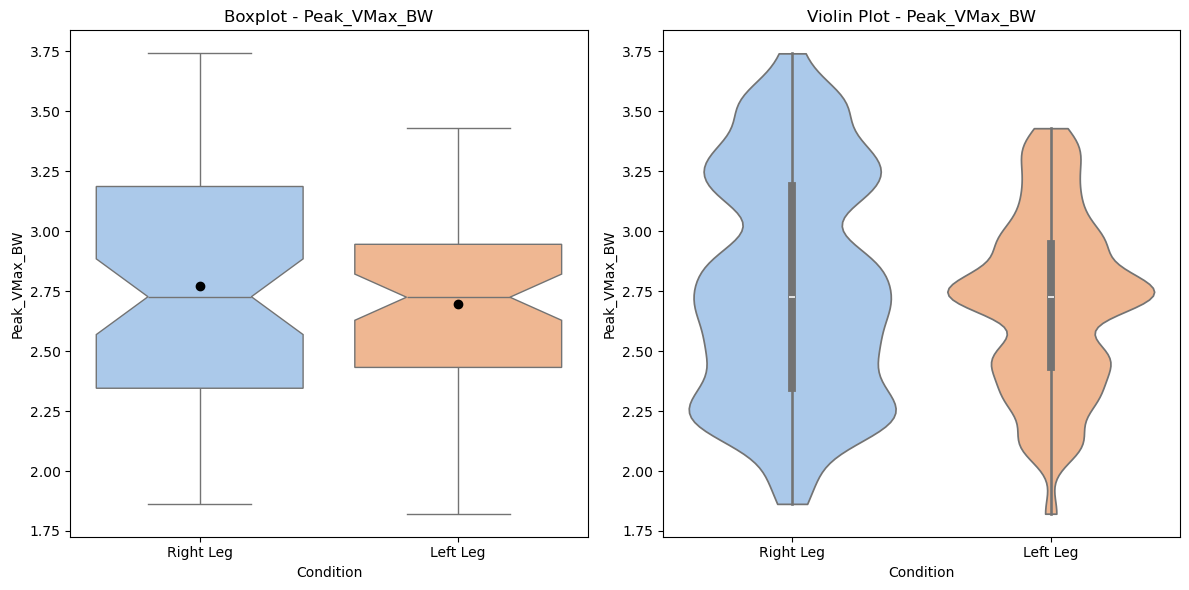

Normality p-values for Right Leg: [0.9978040811800083, 0.15180924583538807, 0.09028130413980255, 0.33820847643838076, 0.63552137350133, 0.997756324443192, 0.46599649915154856]
Normality p-values for Left Leg: [0.8097933678001947, 0.31633991367451375, 0.07729946354368696, 0.08254984520743278, 0.30867072394259226, 0.5332120969991763, 0.38479051415531146]
Levene's test p-value: 0.7637945873158296

---------------------------------------------------------------------

Variable: RFD_100ms_BW.s-1 - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,19.165,15.197,16.792,15.204,21.406,16.917,21.088
AT014,14.510,18.413,14.031,16.668,19.785,18.347,19.341
AT015,31.092,34.634,31.098,28.296,26.973,27.812,28.071
AT016,21.434,20.673,20.165,22.053,26.974,24.784,21.880
AT017,21.923,24.529,20.277,31.875,28.736,20.129,26.772
AT018,28.354,28.300,31.464,28.807,30.078,30.926,26.921
AT019,15.183,17.307,10.898,18.721,19.483,18.441,21.854
AT020,10.875,9.092,10.479,9.384,15.028,13.940,12.529
AT021,8.758,9.255,16.201,11.254,20.588,15.255,17.648
AT022,12.488,13.075,12.915,13.827,18.095,11.932,17.524


Variable: RFD_100ms_BW.s-1 - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,21.635,20.326,23.707,21.208,21.821,20.919,26.669
AT014,18.169,15.645,15.270,15.728,16.774,16.323,17.067
AT015,32.315,29.295,23.684,25.290,23.630,23.781,19.380
AT016,22.877,21.622,19.806,20.151,21.551,27.700,22.579
AT017,18.834,13.121,33.643,24.998,32.584,24.543,29.771
AT018,27.255,26.517,27.861,28.509,29.023,28.963,31.062
AT019,10.298,9.798,13.647,13.526,20.011,17.368,19.348
AT020,12.000,7.806,8.978,7.809,13.739,14.352,13.279
AT021,11.207,12.182,14.309,10.252,17.426,12.672,14.708
AT022,10.066,10.391,13.888,15.077,12.502,16.134,15.054


Differences for variable: RFD_100ms_BW.s-1


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-2.470,-5.129,-6.915,-6.004,-0.415,-4.002,-5.581
AT014,-3.659,2.768,-1.239,0.940,3.011,2.024,2.274
AT015,-1.223,5.339,7.414,3.006,3.343,4.031,8.691
AT016,-1.443,-0.949,0.359,1.902,5.423,-2.916,-0.699
AT017,3.089,11.408,-13.366,6.877,-3.848,-4.414,-2.999
AT018,1.099,1.783,3.603,0.298,1.055,1.963,-4.141
AT019,4.885,7.509,-2.749,5.195,-0.528,1.073,2.506
AT020,-1.125,1.286,1.501,1.575,1.289,-0.412,-0.750
AT021,-2.449,-2.927,1.892,1.002,3.162,2.583,2.940
AT022,2.422,2.684,-0.973,-1.250,5.593,-4.202,2.470



Comparison test results for variable: RFD_100ms_BW.s-1
     Trial  Statistic   p_value           Test  corrected_p_value
0  Trial_1  -0.098587  0.923627  T-Test Paired           1.000000
1  Trial_2   1.541648  0.157550  T-Test Paired           1.000000
2  Trial_3  -0.574158  0.579925  T-Test Paired           1.000000
3  Trial_4   1.221136  0.253058  T-Test Paired           1.000000
4  Trial_5   1.964723  0.081027  T-Test Paired           0.567188
5  Trial_6  -0.422471  0.682595  T-Test Paired           1.000000
6  Trial_7   0.355723  0.730243  T-Test Paired           1.000000


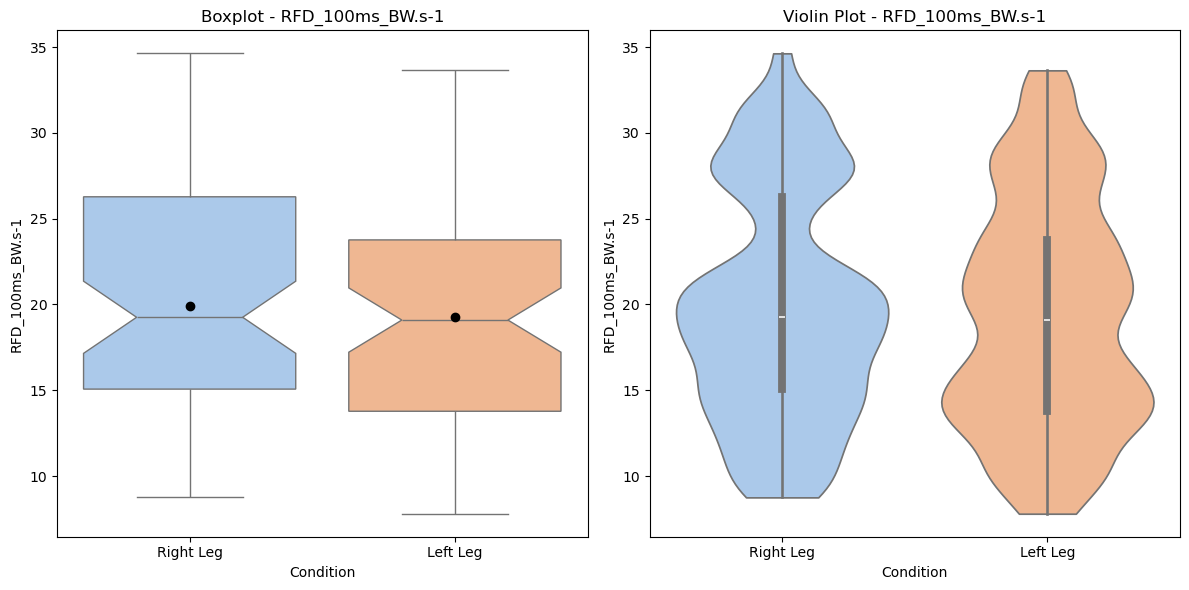

Normality p-values for Right Leg: [0.6349528163234827, 0.6823088531924115, 0.07831097613786318, 0.46588682121019376, 0.3925808892969012, 0.517962886565417, 0.6190966028412077]
Normality p-values for Left Leg: [0.3307794470375631, 0.3827065276997966, 0.5692740488427468, 0.8142383666062016, 0.7320488206706735, 0.46649380471805235, 0.2978023156268537]
Levene's test p-value: 0.9478229617187572
Performing Repeated Measures ANOVA for variable: RFD_100ms_BW.s-1
Significant differences found for variable: RFD_100ms_BW.s-1

---------------------------------------------------------------------

Variable: RFD_40ms_BW.s-1 - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,23.481,34.454,28.905,21.862,52.546,24.117,27.493
AT014,14.139,21.403,12.431,13.054,16.922,17.772,20.436
AT015,37.846,42.007,46.320,39.164,45.809,42.652,35.669
AT016,17.747,19.782,19.117,15.654,22.846,19.550,24.755
AT017,18.037,23.233,17.669,16.573,23.027,16.323,14.809
AT018,24.766,25.192,33.550,20.240,28.175,54.038,20.308
AT019,10.833,15.412,5.705,12.219,16.809,15.434,19.858
AT020,11.543,9.865,13.183,18.927,24.414,19.055,15.454
AT021,7.490,10.053,21.313,16.023,20.990,15.177,19.479
AT022,15.653,13.936,10.334,13.237,18.739,8.543,15.893


Variable: RFD_40ms_BW.s-1 - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,24.844,54.779,31.834,36.202,72.385,39.593,54.194
AT014,15.434,17.820,14.580,15.502,13.334,13.914,14.201
AT015,39.974,35.304,47.078,42.714,49.119,67.191,53.099
AT016,18.148,28.822,12.353,21.486,29.681,25.314,36.059
AT017,13.658,23.441,19.185,25.478,42.029,27.158,30.041
AT018,22.852,27.104,31.928,26.784,43.178,27.103,45.977
AT019,5.838,8.009,13.829,10.548,18.751,11.887,13.708
AT020,13.219,8.862,14.044,11.632,22.287,18.333,13.960
AT021,14.096,13.704,14.656,10.364,16.083,12.132,16.108
AT022,10.243,9.625,13.393,11.832,13.637,15.344,13.321


Differences for variable: RFD_40ms_BW.s-1


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-1.363,-20.325,-2.929,-14.340,-19.839,-15.476,-26.701
AT014,-1.295,3.583,-2.149,-2.448,3.588,3.858,6.235
AT015,-2.128,6.703,-0.758,-3.550,-3.310,-24.539,-17.430
AT016,-0.401,-9.040,6.764,-5.832,-6.835,-5.764,-11.304
AT017,4.379,-0.208,-1.516,-8.905,-19.002,-10.835,-15.232
AT018,1.914,-1.912,1.622,-6.544,-15.003,26.935,-25.669
AT019,4.995,7.403,-8.124,1.671,-1.942,3.547,6.150
AT020,-1.676,1.003,-0.861,7.295,2.127,0.722,1.494
AT021,-6.606,-3.651,6.657,5.659,4.907,3.045,3.371
AT022,5.410,4.311,-3.059,1.405,5.102,-6.801,2.572



Comparison test results for variable: RFD_40ms_BW.s-1
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       26.0  0.921875  Wilcoxon                1.0
1  Trial_2       27.0  1.000000  Wilcoxon                1.0
2  Trial_3       21.0  0.556641  Wilcoxon                1.0
3  Trial_4       16.0  0.275391  Wilcoxon                1.0
4  Trial_5       17.0  0.322266  Wilcoxon                1.0
5  Trial_6       20.0  0.492188  Wilcoxon                1.0
6  Trial_7       15.0  0.232422  Wilcoxon                1.0

T-Test Paired results for variable: RFD_40ms_BW.s-1
     Trial  Statistic   p_value
0  Trial_1   0.267962  0.794769
1  Trial_2  -0.458840  0.657229
2  Trial_3  -0.305294  0.767085
3  Trial_4  -1.206435  0.258404
4  Trial_5  -1.627380  0.138099
5  Trial_6  -0.576034  0.578710
6  Trial_7  -1.845567  0.098040


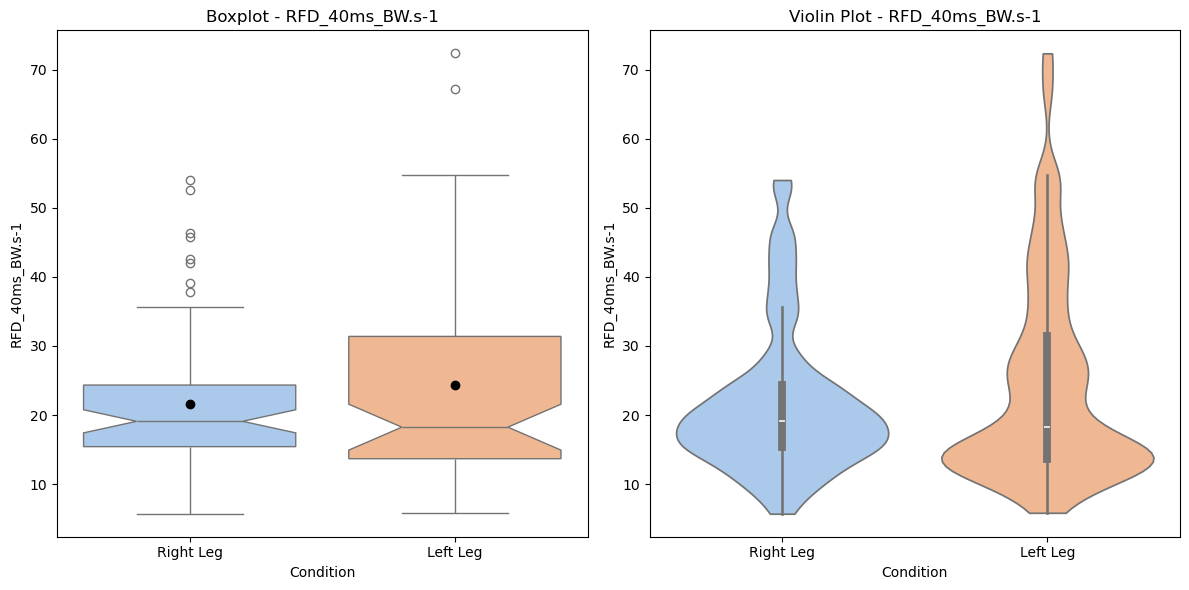

Normality p-values for Right Leg: [0.28111012399788177, 0.38552435782547023, 0.44297322720219895, 0.0026927634180086008, 0.007424743724968274, 0.010720895130599551, 0.11057915230261027]
Normality p-values for Left Leg: [0.16028937072672858, 0.18730985068372202, 0.004103549860603365, 0.11908005075439869, 0.14294302854639773, 0.01158049675605913, 0.023796721238651744]
Levene's test p-value: 0.20713013127441043
Performing Friedman Test for variable: RFD_40ms_BW.s-1
Friedman test p-value for Right Leg: 0.009388824094911081
Friedman test p-value for Left Leg: 0.0014051409343843865
Significant differences found for variable: RFD_40ms_BW.s-1

---------------------------------------------------------------------

Variable: RFD_Brake_VMax_BW.s-1 - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,16.083,13.027,11.524,11.437,14.579,9.363,16.627
AT014,10.573,13.032,10.029,13.724,21.059,17.715,14.592
AT015,37.068,44.534,39.028,25.523,51.098,33.286,34.774
AT016,18.739,13.295,15.690,22.406,25.358,24.467,15.060
AT017,24.590,24.712,21.902,28.439,25.312,14.387,29.694
AT018,26.088,25.785,32.894,25.429,26.941,31.940,24.303
AT019,15.426,15.598,13.361,15.872,15.908,19.765,24.815
AT020,5.009,3.781,4.107,3.942,5.815,6.171,9.525
AT021,7.983,7.716,4.954,4.645,9.694,9.574,10.605
AT022,3.161,0.911,4.558,5.821,7.182,5.578,6.430


Variable: RFD_Brake_VMax_BW.s-1 - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,18.465,15.374,19.888,15.564,14.754,14.485,24.442
AT014,13.291,12.148,11.443,10.856,13.342,12.564,13.598
AT015,35.618,42.000,46.552,35.179,39.007,49.703,39.764
AT016,11.154,18.816,2.954,7.785,16.179,28.925,18.376
AT017,22.948,20.501,18.443,19.132,38.280,19.693,29.771
AT018,24.204,23.939,28.768,25.705,33.901,29.905,39.021
AT019,17.954,12.242,11.519,10.984,20.889,18.915,21.472
AT020,11.675,4.786,4.431,5.694,7.767,7.743,7.484
AT021,8.988,9.967,10.461,9.326,8.576,7.629,10.502
AT022,9.108,1.860,4.650,4.730,6.591,7.947,6.674


Differences for variable: RFD_Brake_VMax_BW.s-1


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-2.382,-2.347,-8.364,-4.127,-0.175,-5.122,-7.815
AT014,-2.718,0.884,-1.414,2.868,7.717,5.151,0.994
AT015,1.450,2.534,-7.524,-9.656,12.091,-16.417,-4.990
AT016,7.585,-5.521,12.736,14.621,9.179,-4.458,-3.316
AT017,1.642,4.211,3.459,9.307,-12.968,-5.306,-0.077
AT018,1.884,1.846,4.126,-0.276,-6.960,2.035,-14.718
AT019,-2.528,3.356,1.842,4.888,-4.981,0.850,3.343
AT020,-6.666,-1.005,-0.324,-1.752,-1.952,-1.572,2.041
AT021,-1.005,-2.251,-5.507,-4.681,1.118,1.945,0.103
AT022,-5.947,-0.949,-0.092,1.091,0.591,-2.369,-0.244



Comparison test results for variable: RFD_Brake_VMax_BW.s-1
     Trial  Statistic   p_value           Test  corrected_p_value
0  Trial_1  -0.654239  0.529319  T-Test Paired                1.0
1  Trial_2   0.079163  0.938635  T-Test Paired                1.0
2  Trial_3  -0.053587  0.958435  T-Test Paired                1.0
3  Trial_4   0.546922  0.597730  T-Test Paired                1.0
4  Trial_5   0.150043  0.884040  T-Test Paired                1.0
5  Trial_6  -1.333080  0.215264  T-Test Paired                1.0
6  Trial_7  -1.427250  0.187269  T-Test Paired                1.0


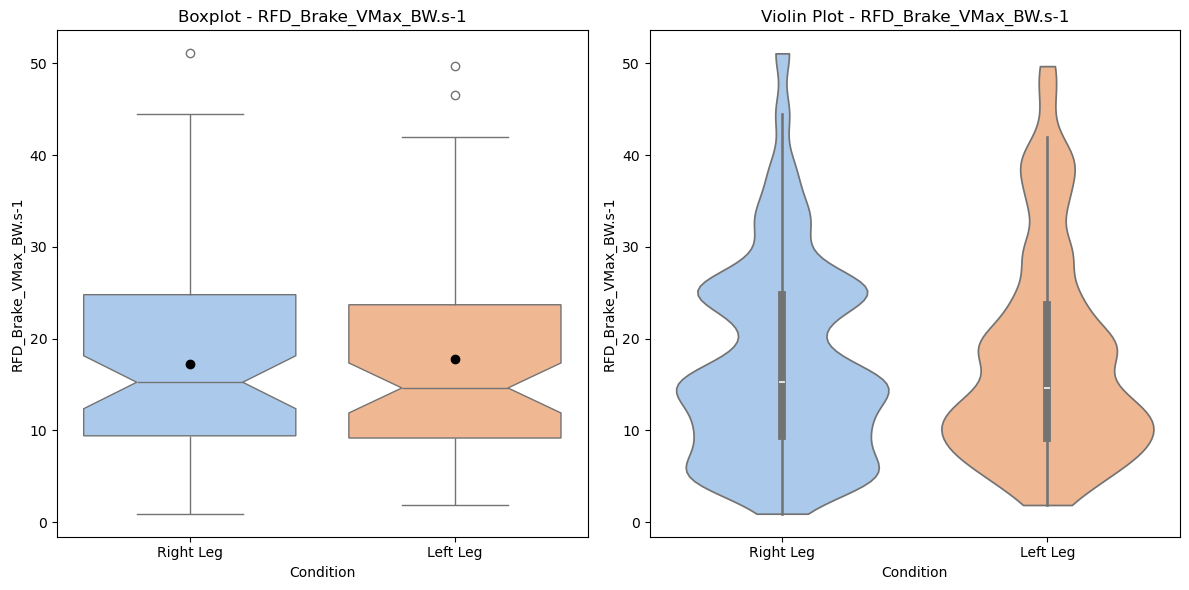

Normality p-values for Right Leg: [0.7314537140362373, 0.22914139649972023, 0.10473087159303351, 0.2544682236807159, 0.12294641832695766, 0.30966255427072226, 0.6109177288973835]
Normality p-values for Left Leg: [0.154879094429467, 0.30677436478161446, 0.06917544688693397, 0.1231339336330802, 0.06751715428960554, 0.07100203028142299, 0.36755154698799186]
Levene's test p-value: 0.9988259811043009
Performing Repeated Measures ANOVA for variable: RFD_Brake_VMax_BW.s-1
Significant differences found for variable: RFD_Brake_VMax_BW.s-1

---------------------------------------------------------------------

Variable: RFD_ITransient_BW.s-1 - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,62.046,55.485,38.196,50.083,65.055,35.669,37.923
AT014,15.923,39.274,23.479,19.749,27.627,31.827,20.509
AT015,46.881,60.073,49.673,41.285,65.034,44.409,44.116
AT016,26.412,20.274,20.862,29.621,31.911,30.790,28.443
AT017,71.001,31.458,27.257,40.369,37.256,29.584,36.791
AT018,36.319,36.126,43.527,36.742,40.047,49.752,34.529
AT019,21.524,22.323,18.223,24.785,23.738,26.359,31.357
AT020,10.242,12.448,10.708,15.612,19.555,16.118,16.774
AT021,10.850,15.666,14.101,12.382,15.408,13.410,14.122
AT022,12.055,15.960,11.726,15.283,23.709,19.025,19.478


Variable: RFD_ITransient_BW.s-1 - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,41.171,74.647,49.342,53.218,88.643,24.676,80.000
AT014,24.654,25.040,17.309,40.570,19.634,18.892,24.129
AT015,50.997,53.390,58.849,82.688,52.359,63.164,50.533
AT016,29.522,23.716,27.561,23.095,50.097,37.965,49.748
AT017,31.457,21.497,43.158,39.894,64.408,74.798,47.242
AT018,35.159,34.064,44.846,36.997,43.362,39.546,64.412
AT019,22.560,22.704,16.382,16.189,26.369,23.912,27.014
AT020,14.661,13.319,13.449,12.736,18.983,13.729,23.310
AT021,13.265,14.698,15.047,13.762,15.094,15.654,15.438
AT022,12.453,10.098,12.444,16.828,22.906,19.874,17.777


Differences for variable: RFD_ITransient_BW.s-1


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,20.875,-19.162,-11.146,-3.135,-23.588,10.993,-42.077
AT014,-8.731,14.234,6.170,-20.821,7.993,12.935,-3.620
AT015,-4.116,6.683,-9.176,-41.403,12.675,-18.755,-6.417
AT016,-3.110,-3.442,-6.699,6.526,-18.186,-7.175,-21.305
AT017,39.544,9.961,-15.901,0.475,-27.152,-45.214,-10.451
AT018,1.160,2.062,-1.319,-0.255,-3.315,10.206,-29.883
AT019,-1.036,-0.381,1.841,8.596,-2.631,2.447,4.343
AT020,-4.419,-0.871,-2.741,2.876,0.572,2.389,-6.536
AT021,-2.415,0.968,-0.946,-1.380,0.314,-2.244,-1.316
AT022,-0.398,5.862,-0.718,-1.545,0.803,-0.849,1.701



Comparison test results for variable: RFD_ITransient_BW.s-1
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       22.0  0.625000  Wilcoxon           1.000000
1  Trial_2       18.0  0.375000  Wilcoxon           1.000000
2  Trial_3       10.0  0.083984  Wilcoxon           0.587891
3  Trial_4       22.0  0.625000  Wilcoxon           1.000000
4  Trial_5       19.0  0.431641  Wilcoxon           1.000000
5  Trial_6       27.0  1.000000  Wilcoxon           1.000000
6  Trial_7        6.0  0.027344  Wilcoxon           0.191406

T-Test Paired results for variable: RFD_ITransient_BW.s-1
     Trial  Statistic   p_value
0  Trial_1   0.794238  0.447492
1  Trial_2   0.554746  0.592585
2  Trial_3  -1.944202  0.083743
3  Trial_4  -1.052571  0.319976
4  Trial_5  -1.248589  0.243316
5  Trial_6  -0.639993  0.538126
6  Trial_7  -2.444311  0.037101


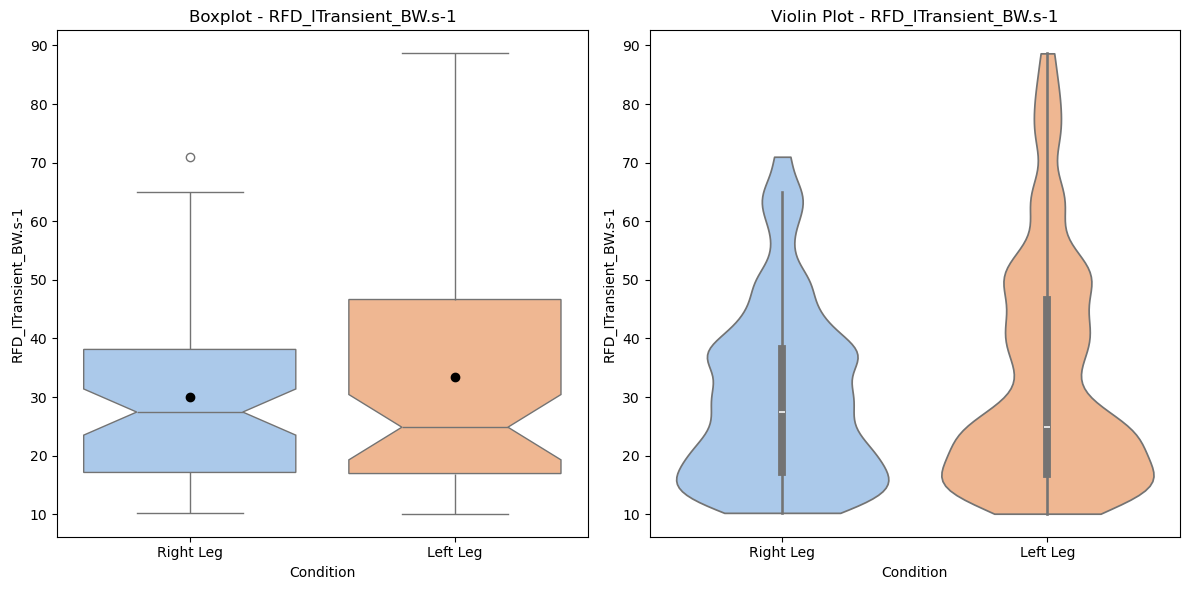

Normality p-values for Right Leg: [0.1123096163817864, 0.21150186482751207, 0.27502684906260694, 0.4708450532699626, 0.07023425399325015, 0.7955228619993162, 0.5989167747456396]
Normality p-values for Left Leg: [0.6326331366518336, 0.028250106495691863, 0.06398128332577269, 0.08162110972668384, 0.20218390921857332, 0.042932399071714054, 0.27702281718899674]
Levene's test p-value: 0.48554865481274845
Performing Friedman Test for variable: RFD_ITransient_BW.s-1
Friedman test p-value for Right Leg: 0.02947699099041176
Friedman test p-value for Left Leg: 0.008056538108147535
Significant differences found for variable: RFD_ITransient_BW.s-1

---------------------------------------------------------------------

Variable: RFD_Propulsion_BW.s-1 - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-16.708,-15.198,-15.736,-14.979,-22.253,-18.524,-16.944
AT014,-12.634,-12.746,-13.593,-14.637,-15.456,-15.829,-12.214
AT015,-23.997,-33.723,-22.015,-22.681,-31.383,-23.320,-19.530
AT016,-17.575,-13.980,-16.285,-16.337,-16.097,-13.864,-15.003
AT017,-23.489,-25.749,-29.344,-28.023,-29.035,-20.275,-22.820
AT018,-22.543,-20.794,-23.418,-29.846,-32.633,-31.110,-23.524
AT019,-15.634,-16.094,-10.855,-17.534,-15.480,-14.690,-10.865
AT020,-7.309,-7.506,-7.215,-8.551,-8.303,-8.593,-6.729
AT021,-9.580,-7.072,-7.063,-4.619,-11.356,-7.772,-7.775
AT022,-7.874,-8.038,-7.178,-6.524,-5.819,-2.936,-5.728


Variable: RFD_Propulsion_BW.s-1 - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-19.538,-15.049,-19.738,-21.192,-16.850,-20.091,-18.406
AT014,-14.225,-13.769,-14.827,-14.690,-13.992,-13.738,-13.919
AT015,-31.874,-21.878,-21.239,-23.967,-28.061,-22.000,-23.275
AT016,-15.476,-9.839,-15.182,-13.442,-13.923,-19.684,-19.227
AT017,-26.614,-21.764,-26.887,-26.275,-26.803,-20.124,-22.379
AT018,-26.180,-20.325,-22.869,-26.695,-22.524,-21.146,-25.042
AT019,-10.587,-10.017,-9.407,-11.001,-10.769,-12.458,-10.057
AT020,-5.581,-6.677,-6.662,-8.367,-9.649,-7.571,-7.459
AT021,-9.272,-10.637,-9.302,-9.932,-8.592,-8.760,-9.521
AT022,-9.230,-7.366,-6.706,-7.068,-8.154,-8.710,-5.827


Differences for variable: RFD_Propulsion_BW.s-1


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,2.830,-0.149,4.002,6.213,-5.403,1.567,1.462
AT014,1.591,1.023,1.234,0.053,-1.464,-2.091,1.705
AT015,7.877,-11.845,-0.776,1.286,-3.322,-1.320,3.745
AT016,-2.099,-4.141,-1.103,-2.895,-2.174,5.820,4.224
AT017,3.125,-3.985,-2.457,-1.748,-2.232,-0.151,-0.441
AT018,3.637,-0.469,-0.549,-3.151,-10.109,-9.964,1.518
AT019,-5.047,-6.077,-1.448,-6.533,-4.711,-2.232,-0.808
AT020,-1.728,-0.829,-0.553,-0.184,1.346,-1.022,0.730
AT021,-0.308,3.565,2.239,5.313,-2.764,0.988,1.746
AT022,1.356,-0.672,-0.472,0.544,2.335,5.774,0.099



Comparison test results for variable: RFD_Propulsion_BW.s-1
     Trial  Statistic   p_value           Test  corrected_p_value
0  Trial_1   0.982111  0.351708  T-Test Paired           1.000000
1  Trial_2  -1.716625  0.120180  T-Test Paired           0.841257
2  Trial_3   0.019225  0.985081  T-Test Paired           1.000000
3  Trial_4  -0.090741  0.929686  T-Test Paired           1.000000
4  Trial_5  -2.575928  0.029896  T-Test Paired           0.209270
5  Trial_6  -0.185323  0.857085  T-Test Paired           1.000000
6  Trial_7   2.701004  0.024354  T-Test Paired           0.170475


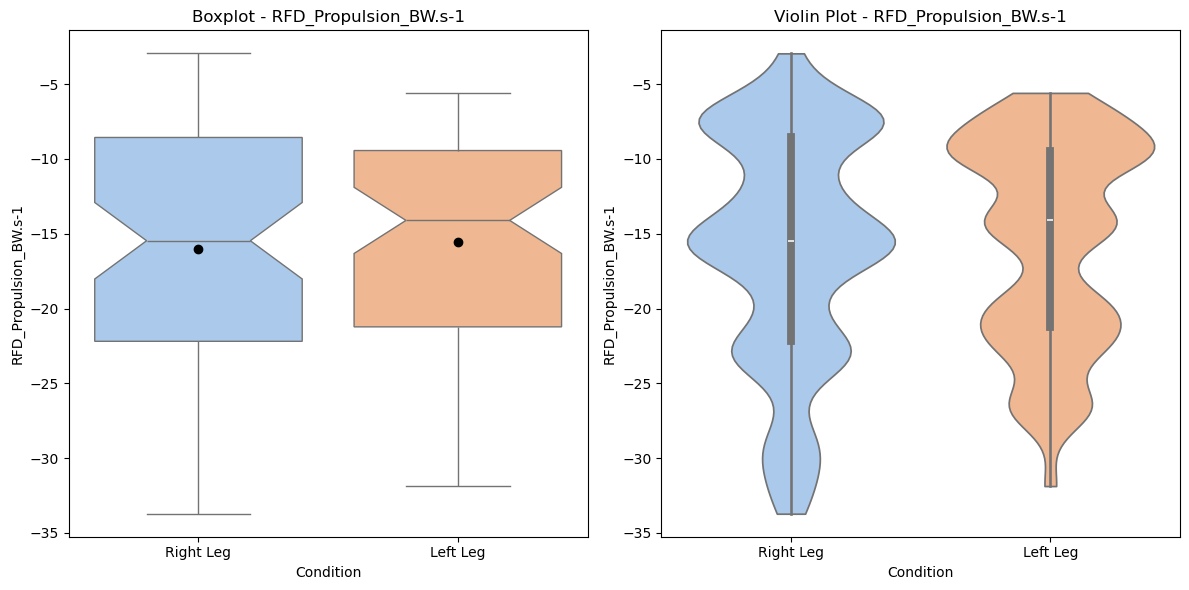

Normality p-values for Right Leg: [0.3216833501376807, 0.24721339090952887, 0.3191939298422063, 0.6244180306346716, 0.3525978367527908, 0.9826108542404117, 0.4884878258063232]
Normality p-values for Left Leg: [0.41758964223613404, 0.1582501174991592, 0.4020921356136378, 0.16733594039927244, 0.12735736370765724, 0.056538141767732725, 0.3600461776418875]
Levene's test p-value: 0.9935558710433314
Performing Repeated Measures ANOVA for variable: RFD_Propulsion_BW.s-1
Significant differences found for variable: RFD_Propulsion_BW.s-1

---------------------------------------------------------------------

Variable: Simple_stiffness_constant - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.521,0.469,0.479,0.460,0.499,0.438,0.505
AT014,0.524,0.545,0.532,0.565,0.665,0.638,0.546
AT015,0.638,0.748,0.656,0.570,0.715,0.579,0.591
AT016,0.540,0.495,0.533,0.574,0.568,0.548,0.452
AT017,0.634,0.657,0.661,0.665,0.643,0.495,0.689
AT018,0.590,0.578,0.632,0.661,0.620,0.620,0.569
AT019,0.710,0.711,0.636,0.705,0.668,0.708,0.690
AT020,0.468,0.451,0.448,0.503,0.505,0.477,0.527
AT021,0.554,0.506,0.440,0.399,0.533,0.506,0.534
AT022,0.417,0.463,0.428,0.452,0.512,0.407,0.431


Variable: Simple_stiffness_constant - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.532,0.537,0.537,0.504,0.585,0.495,0.557
AT014,0.540,0.547,0.545,0.538,0.550,0.545,0.549
AT015,0.655,0.630,0.624,0.570,0.593,0.606,0.485
AT016,0.549,0.455,0.428,0.430,0.531,0.555,0.496
AT017,0.638,0.611,0.673,0.582,0.674,0.544,0.605
AT018,0.595,0.541,0.558,0.591,0.590,0.580,0.657
AT019,0.686,0.636,0.560,0.587,0.643,0.670,0.670
AT020,0.504,0.455,0.455,0.490,0.509,0.481,0.545
AT021,0.554,0.558,0.536,0.554,0.486,0.493,0.557
AT022,0.530,0.417,0.416,0.418,0.591,0.499,0.457


Differences for variable: Simple_stiffness_constant


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-0.011,-0.068,-0.058,-0.044,-0.086,-0.057,-0.052
AT014,-0.016,-0.002,-0.013,0.027,0.115,0.093,-0.003
AT015,-0.017,0.118,0.032,0.000,0.122,-0.027,0.106
AT016,-0.009,0.040,0.105,0.144,0.037,-0.007,-0.044
AT017,-0.004,0.046,-0.012,0.083,-0.031,-0.049,0.084
AT018,-0.005,0.037,0.074,0.070,0.030,0.040,-0.088
AT019,0.024,0.075,0.076,0.118,0.025,0.038,0.020
AT020,-0.036,-0.004,-0.007,0.013,-0.004,-0.004,-0.018
AT021,0.000,-0.052,-0.096,-0.155,0.047,0.013,-0.023
AT022,-0.113,0.046,0.012,0.034,-0.079,-0.092,-0.026



Comparison test results for variable: Simple_stiffness_constant
     Trial  Statistic   p_value           Test  corrected_p_value
0  Trial_1  -1.624069  0.138808  T-Test Paired           0.971657
1  Trial_2   1.325545  0.217650  T-Test Paired           1.000000
2  Trial_3   0.572115  0.581250  T-Test Paired           1.000000
3  Trial_4   1.070458  0.312279  T-Test Paired           1.000000
4  Trial_5   0.789482  0.450128  T-Test Paired           1.000000
5  Trial_6  -0.303043  0.768745  T-Test Paired           1.000000
6  Trial_7  -0.231827  0.821857  T-Test Paired           1.000000


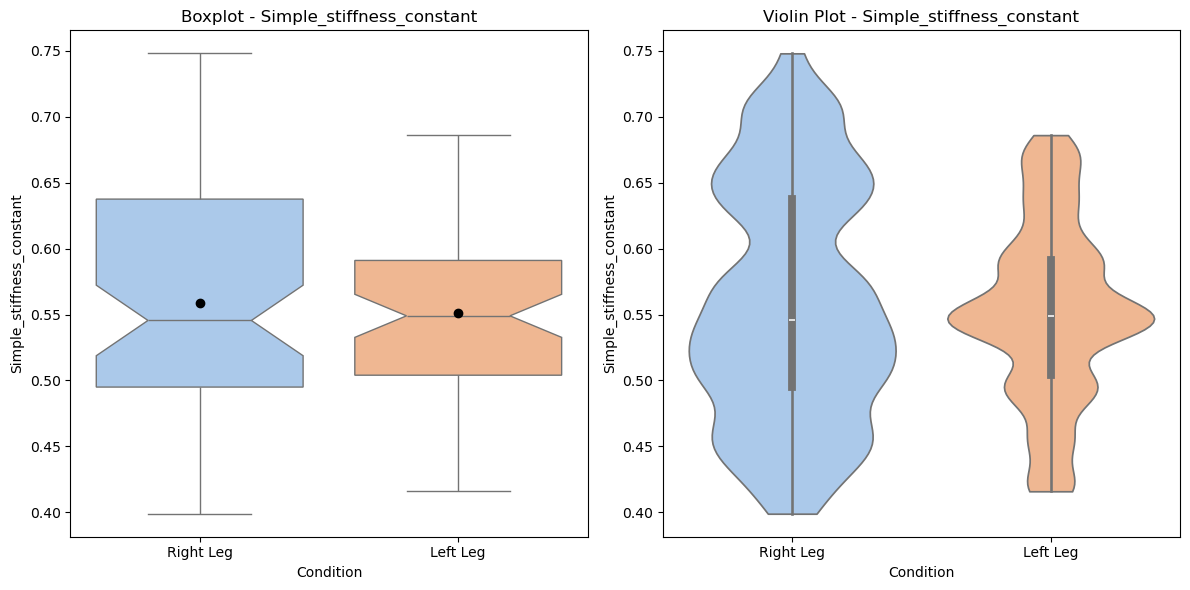

Normality p-values for Right Leg: [0.9803292210453405, 0.13876280490758094, 0.08917042553150209, 0.6747200129719984, 0.2601180303635532, 0.9357508503726158, 0.46231238210971237]
Normality p-values for Left Leg: [0.20118491766692173, 0.3649205120454811, 0.515556319903447, 0.12682165378215654, 0.8219545015102749, 0.27718598011230505, 0.5691523559680058]
Levene's test p-value: 0.6295172183955515
Performing Repeated Measures ANOVA for variable: Simple_stiffness_constant
Significant differences found for variable: Simple_stiffness_constant

---------------------------------------------------------------------

Variable: Time_ITransient_s - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.042,0.041,0.053,0.045,0.033,0.021,0.053
AT014,0.144,0.025,0.025,0.125,0.117,0.012,0.129
AT015,0.068,0.061,0.066,0.069,0.055,0.065,0.067
AT016,0.093,0.113,0.105,0.095,0.089,0.089,0.077
AT017,0.011,0.081,0.082,0.073,0.074,0.071,0.083
AT018,0.076,0.078,0.072,0.075,0.065,0.061,0.074
AT019,0.144,0.141,0.167,0.133,0.134,0.132,0.110
AT020,0.206,0.181,0.202,0.161,0.129,0.148,0.157
AT021,0.201,0.045,0.156,0.161,0.161,0.185,0.188
AT022,0.173,0.145,0.178,0.148,0.108,0.107,0.097


Variable: Time_ITransient_s - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.046,0.036,0.049,0.042,0.033,0.086,0.028
AT014,0.074,0.029,0.133,0.017,0.126,0.131,0.017
AT015,0.061,0.059,0.053,0.011,0.056,0.048,0.048
AT016,0.093,0.096,0.074,0.093,0.053,0.073,0.048
AT017,0.013,0.055,0.078,0.067,0.049,0.008,0.064
AT018,0.073,0.077,0.013,0.070,0.068,0.073,0.051
AT019,0.152,0.140,0.170,0.168,0.122,0.140,0.124
AT020,0.172,0.169,0.169,0.172,0.133,0.175,0.117
AT021,0.192,0.171,0.172,0.182,0.161,0.031,0.176
AT022,0.033,0.203,0.165,0.121,0.129,0.115,0.030


Differences for variable: Time_ITransient_s


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-0.004,0.005,0.004,0.003,0.000,-0.065,0.025
AT014,0.070,-0.004,-0.108,0.108,-0.009,-0.119,0.112
AT015,0.007,0.002,0.013,0.058,-0.001,0.017,0.019
AT016,0.000,0.017,0.031,0.002,0.036,0.016,0.029
AT017,-0.002,0.026,0.004,0.006,0.025,0.063,0.019
AT018,0.003,0.001,0.059,0.005,-0.003,-0.012,0.023
AT019,-0.008,0.001,-0.003,-0.035,0.012,-0.008,-0.014
AT020,0.034,0.012,0.033,-0.011,-0.004,-0.027,0.040
AT021,0.009,-0.126,-0.016,-0.021,0.000,0.154,0.012
AT022,0.140,-0.058,0.013,0.027,-0.021,-0.008,0.067



Comparison test results for variable: Time_ITransient_s
     Trial  Statistic   p_value           Test  corrected_p_value
0  Trial_1   1.683915  0.126485  T-Test Paired           0.885398
1  Trial_2  -0.856625  0.413879  T-Test Paired           1.000000
2  Trial_3   0.213681  0.835558  T-Test Paired           1.000000
3  Trial_4   1.078512  0.308861  T-Test Paired           1.000000
4  Trial_5   0.665344  0.522514  T-Test Paired           1.000000
5  Trial_6   0.047829  0.962897  T-Test Paired           1.000000
6  Trial_7   3.049481  0.013804  T-Test Paired           0.096631


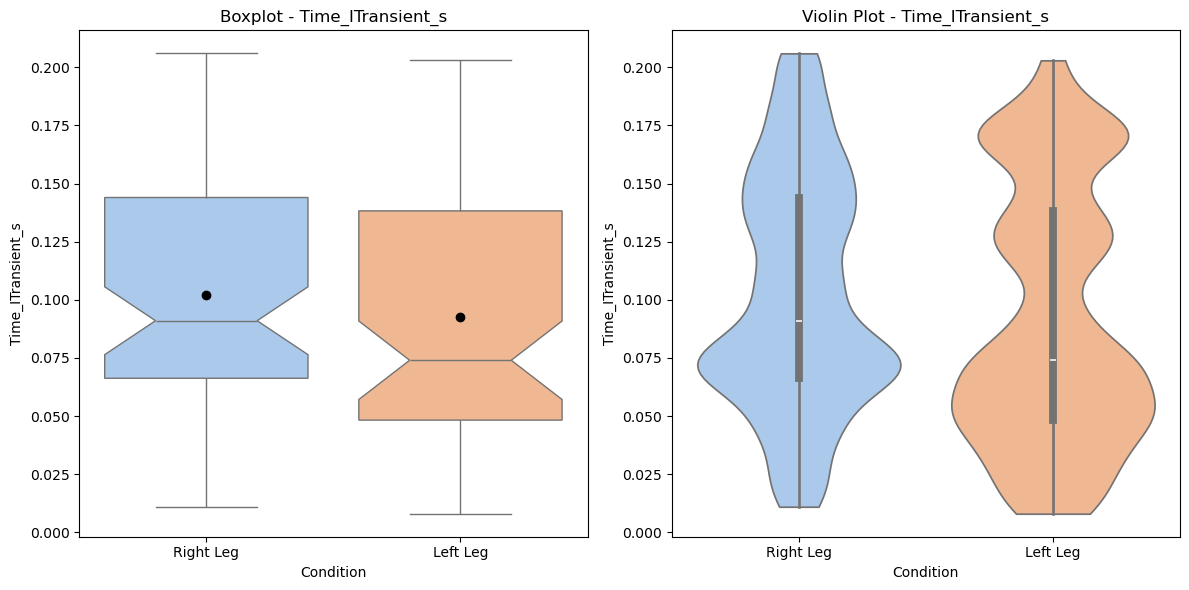

Normality p-values for Right Leg: [0.6168384284319535, 0.5747637460113836, 0.45531063922649084, 0.29860510376757965, 0.9687720120031086, 0.8881842086924205, 0.33692426247876733]
Normality p-values for Left Leg: [0.3255120208514099, 0.2960927823853265, 0.08758500344617523, 0.3176745476936919, 0.14294635377391443, 0.9661839560853372, 0.08075928523512935]
Levene's test p-value: 0.7278545192207044

---------------------------------------------------------------------

Variable: Time_Peak_VMax_s - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.154,0.180,0.208,0.201,0.171,0.234,0.152
AT014,0.248,0.209,0.265,0.206,0.158,0.180,0.187
AT015,0.086,0.084,0.084,0.111,0.070,0.087,0.085
AT016,0.144,0.186,0.170,0.128,0.112,0.112,0.150
AT017,0.129,0.133,0.151,0.117,0.127,0.172,0.116
AT018,0.113,0.112,0.096,0.130,0.115,0.097,0.117
AT019,0.230,0.228,0.238,0.222,0.210,0.179,0.139
AT020,0.467,0.594,0.545,0.555,0.402,0.380,0.271
AT021,0.347,0.328,0.436,0.425,0.275,0.264,0.252
AT022,0.634,2.502,0.469,0.378,0.305,0.334,0.335


Variable: Time_Peak_VMax_s - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.144,0.153,0.135,0.162,0.158,0.171,0.114
AT014,0.203,0.225,0.238,0.248,0.206,0.217,0.202
AT015,0.092,0.075,0.067,0.081,0.076,0.061,0.061
AT016,0.195,0.121,0.724,0.234,0.140,0.096,0.135
AT017,0.139,0.149,0.154,0.152,0.088,0.138,0.100
AT018,0.123,0.113,0.097,0.115,0.087,0.097,0.084
AT019,0.191,0.252,0.243,0.267,0.154,0.177,0.156
AT020,0.216,0.475,0.484,0.430,0.328,0.302,0.324
AT021,0.308,0.280,0.256,0.297,0.282,0.323,0.265
AT022,0.291,1.121,0.447,0.442,0.357,0.314,0.342


Differences for variable: Time_Peak_VMax_s


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.010,0.027,0.073,0.039,0.013,0.063,0.038
AT014,0.045,-0.016,0.027,-0.042,-0.048,-0.037,-0.015
AT015,-0.006,0.009,0.017,0.030,-0.006,0.026,0.024
AT016,-0.051,0.065,-0.554,-0.106,-0.028,0.016,0.015
AT017,-0.010,-0.016,-0.003,-0.035,0.039,0.034,0.016
AT018,-0.010,-0.001,-0.001,0.015,0.028,0.000,0.033
AT019,0.039,-0.024,-0.005,-0.045,0.056,0.002,-0.017
AT020,0.251,0.119,0.061,0.125,0.074,0.078,-0.053
AT021,0.039,0.048,0.180,0.128,-0.007,-0.059,-0.013
AT022,0.343,1.381,0.022,-0.064,-0.052,0.020,-0.007



Comparison test results for variable: Time_Peak_VMax_s
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       14.5  0.232422  Wilcoxon                1.0
1  Trial_2       13.0  0.160156  Wilcoxon                1.0
2  Trial_3       16.0  0.275391  Wilcoxon                1.0
3  Trial_4       26.0  0.921875  Wilcoxon                1.0
4  Trial_5       22.5  0.695312  Wilcoxon                1.0
5  Trial_6       13.0  0.260393  Wilcoxon                1.0
6  Trial_7       23.0  0.695312  Wilcoxon                1.0

T-Test Paired results for variable: Time_Peak_VMax_s
     Trial  Statistic   p_value
0  Trial_1   1.611603  0.141508
1  Trial_2   1.166509  0.273388
2  Trial_3  -0.294908  0.774754
3  Trial_4   0.182368  0.859335
4  Trial_5   0.509801  0.622456
5  Trial_6   1.094969  0.301967
6  Trial_7   0.236653  0.818224


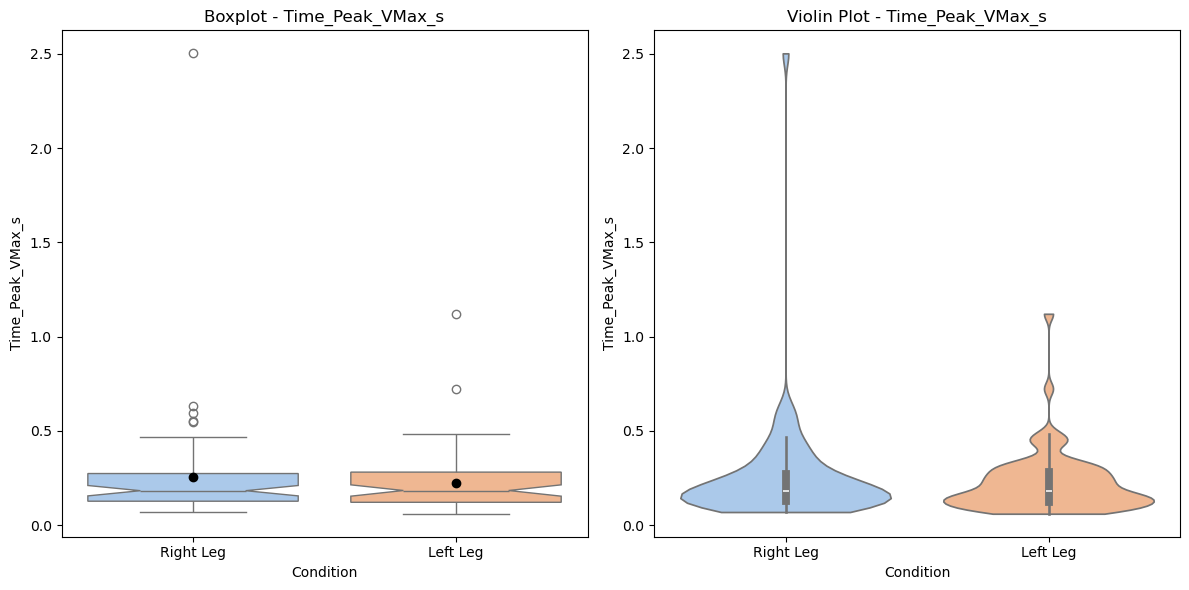

Normality p-values for Right Leg: [0.06594328387673287, 7.100799325602484e-06, 0.2132651629039882, 0.04298747059768684, 0.3651724634195086, 0.4410266561696267, 0.2602654147759287]
Normality p-values for Left Leg: [0.5714510440468474, 0.0004461505450896668, 0.1423808959954415, 0.45334039128429365, 0.1821791977553497, 0.2779927406579733, 0.2327052206881883]
Levene's test p-value: 0.4919498329961963
Performing Friedman Test for variable: Time_Peak_VMax_s
Friedman test p-value for Right Leg: 0.006910534521613441
Friedman test p-value for Left Leg: 0.0019180272362494602
Significant differences found for variable: Time_Peak_VMax_s

---------------------------------------------------------------------

Variable: Time_VIP_s - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.054,0.052,0.067,0.057,0.042,0.028,0.067
AT014,0.181,0.033,0.032,0.158,0.148,0.016,0.163
AT015,0.086,0.077,0.084,0.088,0.070,0.083,0.085
AT016,0.117,0.143,0.132,0.120,0.112,0.112,0.098
AT017,0.015,0.103,0.104,0.093,0.094,0.090,0.105
AT018,0.096,0.099,0.091,0.095,0.083,0.077,0.094
AT019,0.181,0.178,0.210,0.167,0.169,0.166,0.139
AT020,0.259,0.228,0.254,0.203,0.163,0.186,0.198
AT021,0.253,0.057,0.196,0.202,0.202,0.233,0.236
AT022,0.218,0.183,0.224,0.186,0.136,0.135,0.123


Variable: Time_VIP_s - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.059,0.046,0.063,0.054,0.042,0.109,0.036
AT014,0.094,0.038,0.167,0.022,0.159,0.165,0.022
AT015,0.077,0.075,0.067,0.015,0.071,0.061,0.061
AT016,0.117,0.121,0.094,0.117,0.067,0.093,0.061
AT017,0.018,0.070,0.099,0.085,0.062,0.011,0.081
AT018,0.093,0.097,0.017,0.089,0.086,0.092,0.065
AT019,0.191,0.176,0.214,0.211,0.154,0.176,0.156
AT020,0.216,0.212,0.212,0.216,0.167,0.220,0.148
AT021,0.241,0.215,0.216,0.229,0.203,0.040,0.221
AT022,0.042,0.255,0.208,0.153,0.163,0.145,0.039


Differences for variable: Time_VIP_s


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-0.005,0.006,0.004,0.003,0.000,-0.081,0.031
AT014,0.087,-0.005,-0.135,0.136,-0.011,-0.149,0.141
AT015,0.009,0.002,0.017,0.073,-0.001,0.022,0.024
AT016,0.000,0.022,0.038,0.003,0.045,0.019,0.037
AT017,-0.003,0.033,0.005,0.008,0.032,0.079,0.024
AT018,0.003,0.002,0.074,0.006,-0.003,-0.015,0.029
AT019,-0.010,0.002,-0.004,-0.044,0.015,-0.010,-0.017
AT020,0.043,0.016,0.042,-0.013,-0.004,-0.034,0.050
AT021,0.012,-0.158,-0.020,-0.027,-0.001,0.193,0.015
AT022,0.176,-0.072,0.016,0.033,-0.027,-0.010,0.084



Comparison test results for variable: Time_VIP_s
     Trial  Statistic   p_value           Test  corrected_p_value
0  Trial_1   1.680358  0.127189  T-Test Paired           0.890324
1  Trial_2  -0.836175  0.424700  T-Test Paired           1.000000
2  Trial_3   0.210622  0.837874  T-Test Paired           1.000000
3  Trial_4   1.074518  0.310552  T-Test Paired           1.000000
4  Trial_5   0.679388  0.513984  T-Test Paired           1.000000
5  Trial_6   0.048608  0.962293  T-Test Paired           1.000000
6  Trial_7   3.059301  0.013587  T-Test Paired           0.095109


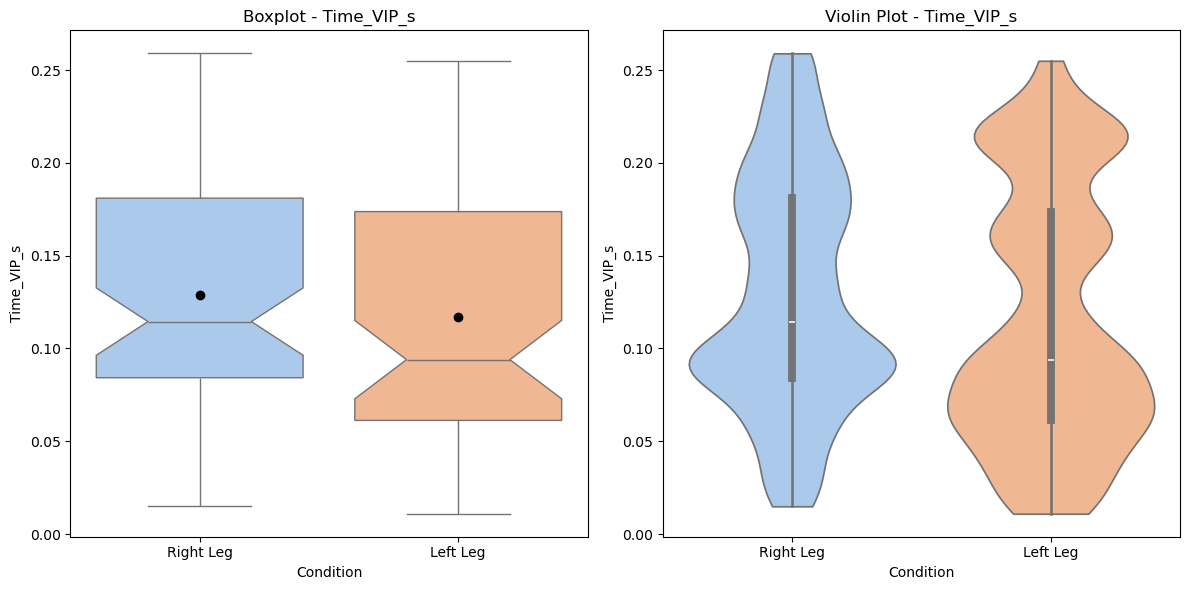

Normality p-values for Right Leg: [0.6116171790074831, 0.5594757339779107, 0.46317132047416365, 0.3150946731670759, 0.9684454258800445, 0.8964624933359996, 0.3551805484911991]
Normality p-values for Left Leg: [0.32275568333094934, 0.29062500851526385, 0.087299737959426, 0.32133748078668284, 0.14036320237740518, 0.9692979926001981, 0.08213264318709776]
Levene's test p-value: 0.7331165438986454

---------------------------------------------------------------------

Variable: Total_Imp_BW.s - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.448,0.507,0.552,0.542,0.479,0.528,0.466
AT014,0.687,0.670,0.700,0.595,0.646,0.637,0.664
AT015,0.373,0.363,0.411,0.411,0.327,0.343,0.360
AT016,0.438,0.543,0.505,0.486,0.452,0.479,0.425
AT017,0.389,0.425,0.407,0.381,0.404,0.440,0.400
AT018,0.376,0.373,0.361,0.427,0.375,0.365,0.354
AT019,0.854,0.853,0.914,0.865,0.849,0.839,0.895
AT020,1.170,1.295,1.291,1.283,1.176,1.116,1.081
AT021,0.996,1.079,1.166,1.266,0.904,0.999,0.984
AT022,1.216,3.088,1.067,1.120,1.064,1.350,1.067


Variable: Total_Imp_BW.s - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.417,0.465,0.435,0.462,0.500,0.483,0.455
AT014,0.640,0.644,0.657,0.699,0.617,0.664,0.610
AT015,0.346,0.364,0.317,0.315,0.277,0.311,0.242
AT016,0.472,0.509,0.962,0.491,0.445,0.361,0.402
AT017,0.362,0.433,0.423,0.459,0.389,0.425,0.384
AT018,0.378,0.391,0.334,0.369,0.368,0.367,0.361
AT019,0.930,0.980,0.948,0.990,0.898,0.866,0.920
AT020,0.980,1.139,1.157,1.120,1.027,1.018,1.019
AT021,0.965,0.878,0.874,0.932,0.962,0.966,0.922
AT022,0.833,1.693,1.129,1.165,1.026,0.971,1.089


Differences for variable: Total_Imp_BW.s


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.031,0.042,0.117,0.080,-0.021,0.045,0.011
AT014,0.047,0.026,0.043,-0.104,0.029,-0.027,0.054
AT015,0.027,-0.001,0.094,0.096,0.050,0.032,0.118
AT016,-0.034,0.034,-0.457,-0.005,0.007,0.118,0.023
AT017,0.027,-0.008,-0.016,-0.078,0.015,0.015,0.016
AT018,-0.002,-0.018,0.027,0.058,0.007,-0.002,-0.007
AT019,-0.076,-0.127,-0.034,-0.125,-0.049,-0.027,-0.025
AT020,0.190,0.156,0.134,0.163,0.149,0.098,0.062
AT021,0.031,0.201,0.292,0.334,-0.058,0.033,0.062
AT022,0.383,1.395,-0.062,-0.045,0.038,0.379,-0.022



Comparison test results for variable: Total_Imp_BW.s
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       15.0  0.232422  Wilcoxon           1.000000
1  Trial_2       13.0  0.160156  Wilcoxon           1.000000
2  Trial_3       19.0  0.431641  Wilcoxon           1.000000
3  Trial_4       22.0  0.625000  Wilcoxon           1.000000
4  Trial_5       20.0  0.492188  Wilcoxon           1.000000
5  Trial_6        8.0  0.048828  Wilcoxon           0.341797
6  Trial_7       11.0  0.105469  Wilcoxon           0.738281

T-Test Paired results for variable: Total_Imp_BW.s
     Trial  Statistic   p_value
0  Trial_1   1.496995  0.168616
1  Trial_2   1.221973  0.252756
2  Trial_3   0.224350  0.827495
3  Trial_4   0.841702  0.421756
4  Trial_5   0.903824  0.389640
5  Trial_6   1.754508  0.113237
6  Trial_7   2.061000  0.069368


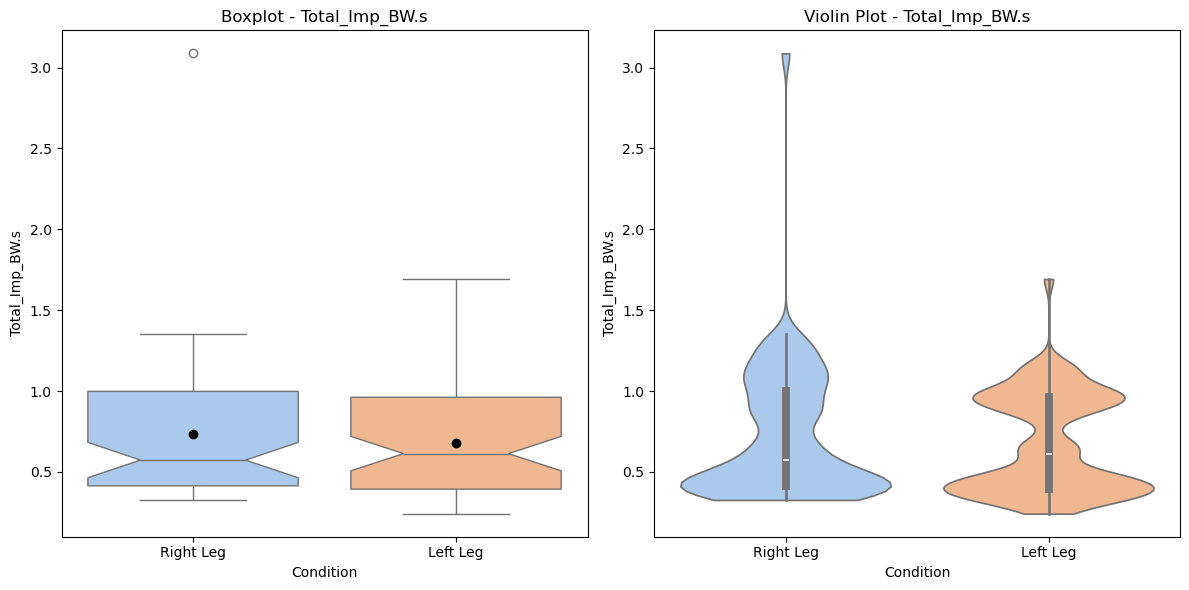

Normality p-values for Right Leg: [0.047138161181554866, 0.0007026407523035346, 0.17687268068418666, 0.036001890879074884, 0.1933660668527646, 0.23310707797157257, 0.03817693387302583]
Normality p-values for Left Leg: [0.03897324504170264, 0.06206590464460031, 0.1543042688312978, 0.14317223299002174, 0.09120789503334462, 0.06552449143978399, 0.12526313188278218]
Levene's test p-value: 0.9484723240243276
Performing Friedman Test for variable: Total_Imp_BW.s
Friedman test p-value for Right Leg: 0.006648165747468183
Friedman test p-value for Left Leg: 0.00862441162088111
Significant differences found for variable: Total_Imp_BW.s

---------------------------------------------------------------------

Variable: Transition_time - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.248,0.284,0.294,0.305,0.248,0.035,0.248
AT014,0.063,0.348,0.075,0.323,0.310,0.312,0.340
AT015,0.170,0.156,0.177,0.194,0.145,0.169,0.182
AT016,0.246,0.296,0.277,0.056,0.244,0.266,0.250
AT017,0.216,0.041,0.058,0.054,0.044,0.051,0.057
AT018,0.199,0.200,0.175,0.048,0.040,0.158,0.195
AT019,0.085,0.371,0.099,0.074,0.063,0.073,0.382
AT020,0.672,0.777,0.085,0.143,0.614,0.583,0.546
AT021,0.108,0.585,0.643,0.768,0.438,0.514,0.486
AT022,0.787,0.411,0.637,0.629,0.569,0.872,0.610


Variable: Transition_time - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.224,0.251,0.221,0.241,0.257,0.254,0.211
AT014,0.330,0.351,0.069,0.071,0.334,0.375,0.329
AT015,0.160,0.173,0.155,0.162,0.136,0.139,0.132
AT016,0.277,0.298,NaN,0.312,0.240,0.196,0.210
AT017,0.055,0.063,0.056,0.043,0.166,0.222,0.184
AT018,0.041,0.205,0.177,0.040,0.172,0.188,0.154
AT019,0.104,0.459,0.464,0.089,0.391,0.079,0.399
AT020,0.536,0.689,0.681,0.126,0.516,0.538,0.534
AT021,0.511,0.087,0.456,0.104,0.495,0.085,0.459
AT022,0.476,0.074,0.673,0.672,0.564,0.505,0.615


Differences for variable: Transition_time


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.024,0.033,0.073,0.064,-0.009,-0.219,0.037
AT014,-0.267,-0.003,0.006,0.252,-0.024,-0.063,0.011
AT015,0.010,-0.017,0.022,0.032,0.009,0.030,0.050
AT016,-0.031,-0.002,NaN,-0.256,0.004,0.070,0.040
AT017,0.161,-0.022,0.002,0.011,-0.122,-0.171,-0.127
AT018,0.158,-0.005,-0.002,0.008,-0.132,-0.030,0.041
AT019,-0.019,-0.088,-0.365,-0.015,-0.328,-0.006,-0.017
AT020,0.136,0.088,-0.596,0.017,0.098,0.045,0.012
AT021,-0.403,0.498,0.187,0.664,-0.057,0.429,0.027
AT022,0.311,0.337,-0.036,-0.043,0.005,0.367,-0.005



Comparison test results for variable: Transition_time
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       24.0  0.769531  Wilcoxon                1.0
1  Trial_2       22.0  0.625000  Wilcoxon                1.0
2  Trial_3        NaN       NaN  Wilcoxon                NaN
3  Trial_4       18.0  0.375000  Wilcoxon                1.0
4  Trial_5       13.0  0.160156  Wilcoxon                1.0
5  Trial_6       23.5  0.769531  Wilcoxon                1.0
6  Trial_7       15.0  0.232422  Wilcoxon                1.0

T-Test Paired results for variable: Transition_time
     Trial  Statistic   p_value
0  Trial_1   0.119827  0.907253
1  Trial_2   1.391259  0.197576
2  Trial_3        NaN       NaN
3  Trial_4   0.962198  0.361088
4  Trial_5  -1.506373  0.166237
5  Trial_6   0.688199  0.508675
6  Trial_7   0.421564  0.683233


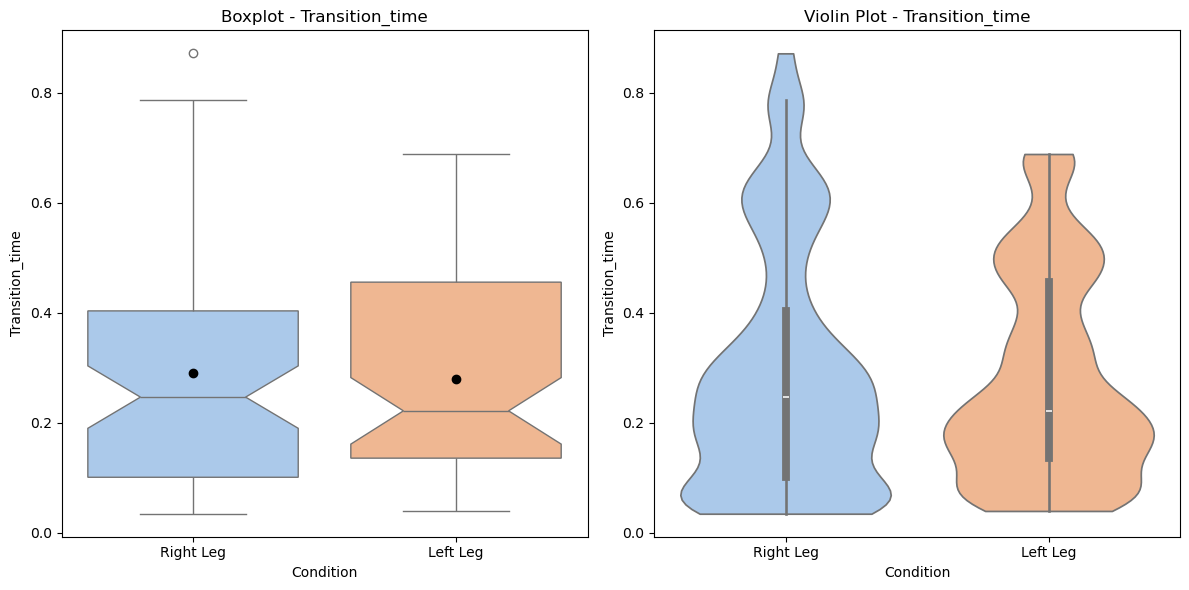

Normality p-values for Right Leg: [0.0053081237858114425, 0.7218624310276023, 0.011651655170666514, 0.023933511258222115, 0.2539259720751938, 0.1439512157245938, 0.8275489859813439]
Normality p-values for Left Leg: [0.3064259627226129, 0.23079289641530276, nan, 0.003442429660415501, 0.30748139082190845, 0.16547761509859013, 0.2580945704444632]
Levene's test p-value: nan

---------------------------------------------------------------------

Variable: VPeak_100ms_BW - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,1.917,1.520,1.679,1.520,2.141,1.692,2.109
AT014,1.451,1.841,1.403,1.667,1.979,1.835,1.934
AT015,3.109,3.463,3.110,2.830,2.697,2.781,2.807
AT016,2.143,2.067,2.017,2.205,2.697,2.478,2.188
AT017,2.192,2.453,2.028,3.187,2.874,2.013,2.677
AT018,2.835,2.830,3.146,2.881,3.008,3.093,2.692
AT019,1.518,1.731,1.090,1.872,1.948,1.844,2.185
AT020,1.088,0.909,1.048,0.938,1.503,1.394,1.253
AT021,0.876,0.925,1.620,1.125,2.059,1.525,1.765
AT022,1.249,1.307,1.291,1.383,1.810,1.193,1.752


Variable: VPeak_100ms_BW - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,2.164,2.033,2.371,2.121,2.182,2.092,2.667
AT014,1.817,1.565,1.527,1.573,1.677,1.632,1.707
AT015,3.231,2.929,2.368,2.529,2.363,2.378,1.938
AT016,2.288,2.162,1.981,2.015,2.155,2.770,2.258
AT017,1.883,1.312,3.364,2.500,3.258,2.454,2.977
AT018,2.726,2.652,2.786,2.851,2.902,2.896,3.106
AT019,1.030,0.980,1.365,1.353,2.001,1.737,1.935
AT020,1.200,0.781,0.898,0.781,1.374,1.435,1.328
AT021,1.121,1.218,1.431,1.025,1.743,1.267,1.471
AT022,1.007,1.039,1.389,1.508,1.250,1.613,1.505


Differences for variable: VPeak_100ms_BW


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-0.247,-0.513,-0.692,-0.601,-0.041,-0.400,-0.558
AT014,-0.366,0.276,-0.124,0.094,0.302,0.203,0.227
AT015,-0.122,0.534,0.742,0.301,0.334,0.403,0.869
AT016,-0.145,-0.095,0.036,0.190,0.542,-0.292,-0.070
AT017,0.309,1.141,-1.336,0.687,-0.384,-0.441,-0.300
AT018,0.109,0.178,0.360,0.030,0.106,0.197,-0.414
AT019,0.488,0.751,-0.275,0.519,-0.053,0.107,0.250
AT020,-0.112,0.128,0.150,0.157,0.129,-0.041,-0.075
AT021,-0.245,-0.293,0.189,0.100,0.316,0.258,0.294
AT022,0.242,0.268,-0.098,-0.125,0.560,-0.420,0.247



Comparison test results for variable: VPeak_100ms_BW
     Trial  Statistic   p_value           Test  corrected_p_value
0  Trial_1  -0.100436  0.922200  T-Test Paired           1.000000
1  Trial_2   1.539812  0.157992  T-Test Paired           1.000000
2  Trial_3  -0.574567  0.579660  T-Test Paired           1.000000
3  Trial_4   1.219359  0.253699  T-Test Paired           1.000000
4  Trial_5   1.968387  0.080551  T-Test Paired           0.563856
5  Trial_6  -0.421317  0.683407  T-Test Paired           1.000000
6  Trial_7   0.354968  0.730790  T-Test Paired           1.000000


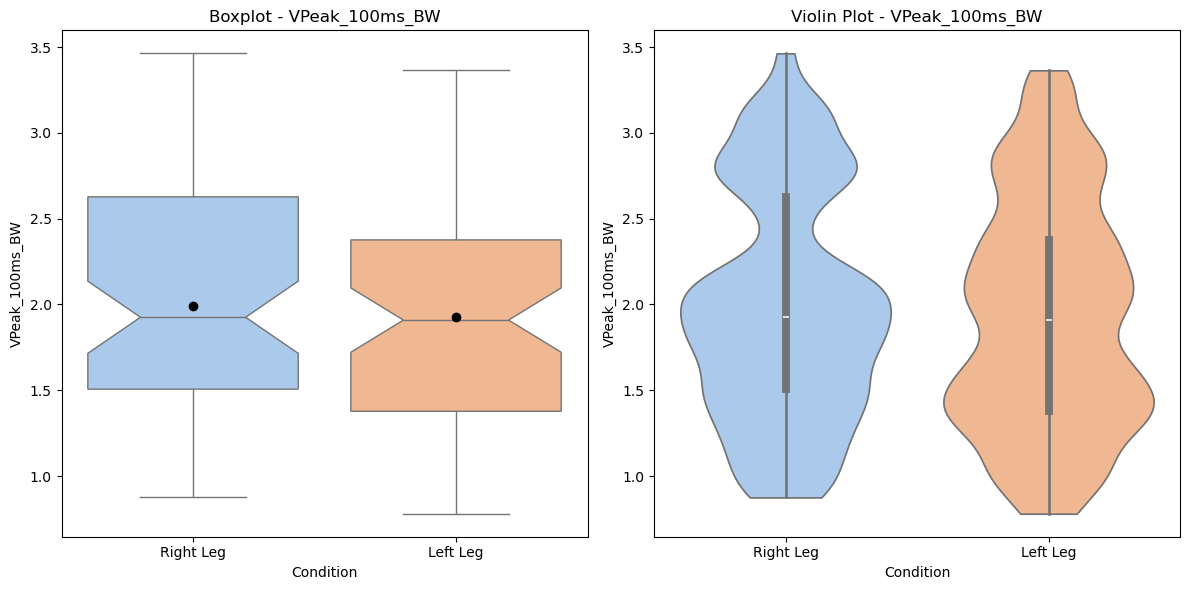

Normality p-values for Right Leg: [0.6347281055886369, 0.6822443031813923, 0.07821785934346333, 0.4653456780129284, 0.3940756243323003, 0.5187687920942836, 0.6198382936333819]
Normality p-values for Left Leg: [0.33021307160188823, 0.3817270941811654, 0.5694320662876815, 0.8142326914325153, 0.7330531376363808, 0.46655911987350124, 0.2975706993865375]
Levene's test p-value: 0.9477032281593656
Performing Repeated Measures ANOVA for variable: VPeak_100ms_BW
Significant differences found for variable: VPeak_100ms_BW

---------------------------------------------------------------------

Variable: VPeak_40ms_BW - Right Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.939,1.378,1.156,0.874,2.102,0.965,1.100
AT014,0.566,0.856,0.497,0.522,0.677,0.711,0.817
AT015,1.514,1.680,1.853,1.567,1.832,1.706,1.427
AT016,0.710,0.791,0.765,0.626,0.914,0.782,0.990
AT017,0.721,0.929,0.707,0.663,0.921,0.653,0.592
AT018,0.991,1.008,1.342,0.810,1.127,2.162,0.812
AT019,0.433,0.616,0.228,0.489,0.672,0.617,0.794
AT020,0.462,0.395,0.527,0.757,0.977,0.762,0.618
AT021,0.300,0.402,0.853,0.641,0.840,0.607,0.779
AT022,0.626,0.557,0.413,0.529,0.750,0.342,0.636


Variable: VPeak_40ms_BW - Left Leg


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,0.994,2.191,1.273,1.448,2.895,1.584,2.168
AT014,0.617,0.713,0.583,0.620,0.533,0.557,0.568
AT015,1.599,1.412,1.883,1.709,1.965,2.688,2.124
AT016,0.726,1.153,0.494,0.859,1.187,1.013,1.442
AT017,0.546,0.938,0.767,1.019,1.681,1.086,1.202
AT018,0.914,1.084,1.277,1.071,1.727,1.084,1.839
AT019,0.234,0.320,0.553,0.422,0.750,0.475,0.548
AT020,0.529,0.354,0.562,0.465,0.891,0.733,0.558
AT021,0.564,0.548,0.586,0.415,0.643,0.485,0.644
AT022,0.410,0.385,0.536,0.473,0.545,0.614,0.533


Differences for variable: VPeak_40ms_BW


,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7
AT013,-0.055,-0.813,-0.117,-0.574,-0.793,-0.619,-1.068
AT014,-0.051,0.143,-0.086,-0.098,0.144,0.154,0.249
AT015,-0.085,0.268,-0.030,-0.142,-0.133,-0.982,-0.697
AT016,-0.016,-0.362,0.271,-0.233,-0.273,-0.231,-0.452
AT017,0.175,-0.009,-0.060,-0.356,-0.760,-0.433,-0.610
AT018,0.077,-0.076,0.065,-0.261,-0.600,1.078,-1.027
AT019,0.199,0.296,-0.325,0.067,-0.078,0.142,0.246
AT020,-0.067,0.041,-0.035,0.292,0.086,0.029,0.060
AT021,-0.264,-0.146,0.267,0.226,0.197,0.122,0.135
AT022,0.216,0.172,-0.123,0.056,0.205,-0.272,0.103



Comparison test results for variable: VPeak_40ms_BW
     Trial  Statistic   p_value      Test  corrected_p_value
0  Trial_1       26.0  0.921875  Wilcoxon                1.0
1  Trial_2       27.0  1.000000  Wilcoxon                1.0
2  Trial_3       21.0  0.556641  Wilcoxon                1.0
3  Trial_4       16.0  0.275391  Wilcoxon                1.0
4  Trial_5       17.0  0.322266  Wilcoxon                1.0
5  Trial_6       20.0  0.492188  Wilcoxon                1.0
6  Trial_7       15.0  0.232422  Wilcoxon                1.0

T-Test Paired results for variable: VPeak_40ms_BW
     Trial  Statistic   p_value
0  Trial_1   0.268054  0.794701
1  Trial_2  -0.459519  0.656760
2  Trial_3  -0.302931  0.768827
3  Trial_4  -1.205894  0.258603
4  Trial_5  -1.624066  0.138809
5  Trial_6  -0.575645  0.578962
6  Trial_7  -1.845649  0.098027


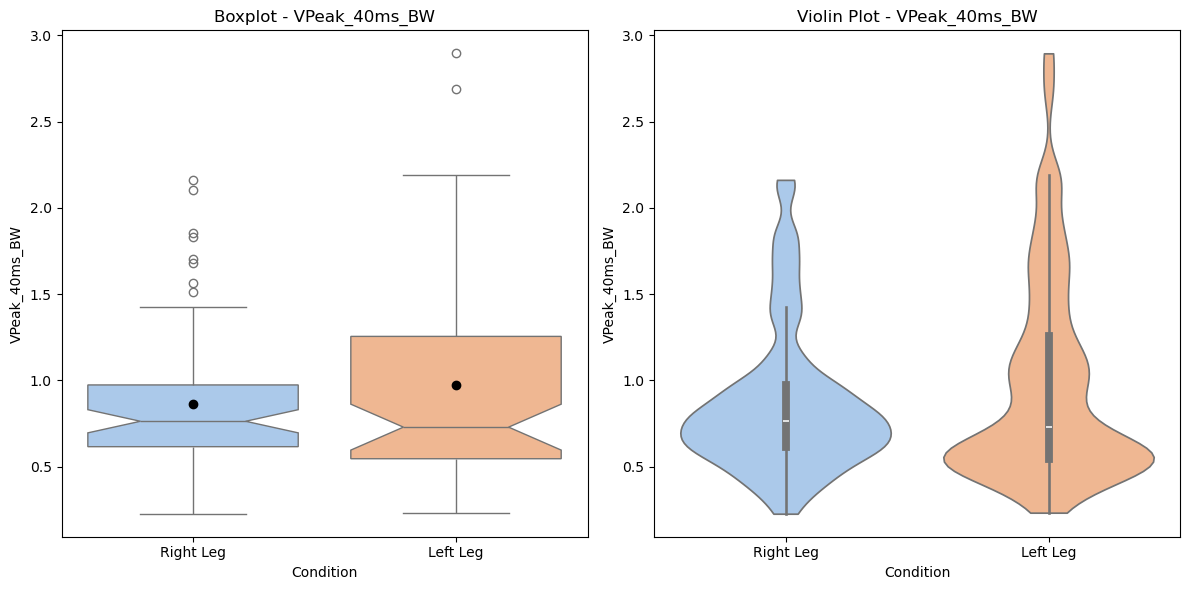

Normality p-values for Right Leg: [0.27994563342697715, 0.3841452578889664, 0.4442500578968595, 0.002670433337347721, 0.007481510449174984, 0.010713000480855765, 0.1103663279685939]
Normality p-values for Left Leg: [0.15936191164028585, 0.1879943573051358, 0.004088709170803185, 0.11812302093736124, 0.14314169330820037, 0.01160472565127433, 0.02375480043800125]
Levene's test p-value: 0.2068036782545151
Performing Friedman Test for variable: VPeak_40ms_BW
Friedman test p-value for Right Leg: 0.009388824094911081
Friedman test p-value for Left Leg: 0.001247559680947439
Significant differences found for variable: VPeak_40ms_BW

---------------------------------------------------------------------



In [9]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Variables for analysis
# Ensure the selection of numeric columns only
variables_to_analyze = df_2rep_r.select_dtypes(include=[np.number]).columns.difference(['Subject', 'Trial'])

# List to store results
results_list = []
comparison_results_list = []
differences_list = []

for variable in variables_to_analyze:
    # Create repeated measures DataFrame for the current variable
    df_r_subjects = {}
    df_l_subjects = {}
    
    for subject in df_2rep_r['Subject'].unique():
        subject_df_r = df_2rep_r[df_2rep_r['Subject'] == subject]
        subject_df_l = df_2rep_l[df_2rep_l['Subject'] == subject]
        
        if len(subject_df_r) == 7 and len(subject_df_l) == 7:
            # Convert to numeric to ensure proper subtraction, coerce errors to NaN
            df_r_subjects[subject] = pd.to_numeric(subject_df_r[variable].values, errors='coerce')
            df_l_subjects[subject] = pd.to_numeric(subject_df_l[variable].values, errors='coerce')
    
    df_r_subjects = pd.DataFrame(df_r_subjects, index=[f'Trial_{i}' for i in range(1, 8)]).T
    df_l_subjects = pd.DataFrame(df_l_subjects, index=[f'Trial_{i}' for i in range(1, 8)]).T
    
    print(f"Variable: {variable} - Right Leg")
    display(df_r_subjects)
    print(f"Variable: {variable} - Left Leg")
    display(df_l_subjects)

    # Calculate differences between Right and Left
    differences = df_r_subjects.values - df_l_subjects.values
    differences_df = pd.DataFrame(differences, index=df_r_subjects.index, columns=df_r_subjects.columns)
    print(f"Differences for variable: {variable}")
    display(differences_df)

    differences_list.append({
        'Variable': variable,
        'Differences': differences_df
    })

    # Normality and homogeneity check
    normality_pvalues_r = []
    normality_pvalues_l = []
    
    for i in range(1, 8):
        trial_r = df_r_subjects[f'Trial_{i}'].astype(float)
        trial_l = df_l_subjects[f'Trial_{i}'].astype(float)
        
        p_value_r = shapiro(trial_r).pvalue
        p_value_l = shapiro(trial_l).pvalue
        
        normality_pvalues_r.append(p_value_r)
        normality_pvalues_l.append(p_value_l)
    
    levene_pvalue = levene(*[df_r_subjects[f'Trial_{i}'].astype(float) for i in range(1, 8)],
                           *[df_l_subjects[f'Trial_{i}'].astype(float) for i in range(1, 8)]).pvalue

    normality_r = all(p > 0.05 for p in normality_pvalues_r)
    normality_l = all(p > 0.05 for p in normality_pvalues_l)
    
    significant = False
    test_used = ""
    p_value = None
    mean_r = df_r_subjects.values.flatten().mean()
    std_dev_r = df_r_subjects.values.flatten().std()
    mean_l = df_l_subjects.values.flatten().mean()
    std_dev_l = df_l_subjects.values.flatten().std()
    post_hoc_result = None
    
    if normality_r and normality_l and levene_pvalue > 0.05:
        df_combined = pd.concat([df_r_subjects.melt(var_name='Trial', value_name=variable, ignore_index=False).reset_index().rename(columns={'index': 'Subject'}).assign(Leg='Right'),
                                 df_l_subjects.melt(var_name='Trial', value_name=variable, ignore_index=False).reset_index().rename(columns={'index': 'Subject'}).assign(Leg='Left')])
        anova = AnovaRM(df_combined, variable, 'Subject', within=['Trial', 'Leg']).fit()
        test_used = "Repeated Measures ANOVA"
        p_value = anova.anova_table['Pr > F'][0]
        if p_value <= 0.05:
            significant = True
            # Post Hoc Test: Tukey HSD
            tukey = pairwise_tukeyhsd(df_combined[variable], df_combined['Trial'])
            post_hoc_result = tukey.summary()
    else:
        test_used = "Friedman Test"
        friedman_pvalue_r = friedmanchisquare(*[df_r_subjects[f'Trial_{i}'].astype(float) for i in range(1, 8)]).pvalue
        friedman_pvalue_l = friedmanchisquare(*[df_l_subjects[f'Trial_{i}'].astype(float) for i in range(1, 8)]).pvalue
        
        p_value = min(friedman_pvalue_r, friedman_pvalue_l)
        if p_value <= 0.05:
            significant = True
            # Post Hoc Test: Nemenyi
            post_hoc_result = posthoc_nemenyi_friedman(pd.concat([df_r_subjects, df_l_subjects]).values)
    
    results_list.append({
        'Variable': variable,
        'Normality_R': normality_r,
        'Normality_L': normality_l,
        'Levene': levene_pvalue > 0.05,
        'Test': test_used,
        'Significant': significant,
        'p-value': f"{p_value:.5f}" if p_value is not None else None,
        'Mean_R': f"{mean_r:.5f}",
        'Std Dev_R': f"{std_dev_r:.5f}",
        'Mean_L': f"{mean_l:.5f}",
        'Std Dev_L': f"{std_dev_l:.5f}",
        'Post Hoc Result': post_hoc_result
    })

    # Wilcoxon Test or T-Test for each trial
    comparison_results = []
    for i in range(1, 8):
        trial_col = f'Trial_{i}'
        if normality_r and normality_l and levene_pvalue > 0.05:
            stat, p_value = ttest_rel(df_r_subjects[trial_col], df_l_subjects[trial_col])
            test_type = 'T-Test Paired'
        else:
            stat, p_value = wilcoxon(df_r_subjects[trial_col], df_l_subjects[trial_col])
            test_type = 'Wilcoxon'
        comparison_results.append((trial_col, stat, p_value, test_type))

    # Correção de Bonferroni
    p_values = [result[2] for result in comparison_results]
    corrected_p_values = multipletests(p_values, method='bonferroni')[1]

    # Adicionar resultados ao DataFrame
    comparison_results_df = pd.DataFrame(comparison_results, columns=['Trial', 'Statistic', 'p_value', 'Test'])
    comparison_results_df['corrected_p_value'] = corrected_p_values

    comparison_results_list.append({
        'Variable': variable,
        'Comparison Results': comparison_results_df
    })

    # Exibir resultados dos testes de comparação
    print(f"\nComparison test results for variable: {variable}")
    print(comparison_results_df)

    # Perform and display t-test paired results if Wilcoxon was used
    if not (normality_r and normality_l and levene_pvalue > 0.05):
        ttest_results = []
        for i in range(1, 8):
            trial_col = f'Trial_{i}'
            stat, p_value = ttest_rel(df_r_subjects[trial_col], df_l_subjects[trial_col])
            ttest_results.append((trial_col, stat, p_value))
        
        ttest_results_df = pd.DataFrame(ttest_results, columns=['Trial', 'Statistic', 'p_value'])
        print(f"\nT-Test Paired results for variable: {variable}")
        print(ttest_results_df)

    # Prepare data for plots
    df_combined_melted = pd.concat([
        df_r_subjects.melt(var_name='Trial', value_name=variable, ignore_index=False).reset_index().rename(columns={'index': 'Subject'}).assign(Condition='Right Leg'),
        df_l_subjects.melt(var_name='Trial', value_name=variable, ignore_index=False).reset_index().rename(columns={'index': 'Subject'}).assign(Condition='Left Leg')
    ]).reset_index(drop=True)

    # Plotting Boxplot and Violin plot
    plt.figure(figsize=(12, 6))

    # Boxplot with notches, whiskers, and mean
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Condition', y=variable, data=df_combined_melted, notch=True, whis=1.5, showmeans=True,
                meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"}, palette="pastel")
    plt.title(f'Boxplot - {variable}')
    plt.ylabel(variable)

    # Violin plot with specified features
    plt.subplot(1, 2, 2)
    sns.violinplot(x='Condition', y=variable, data=df_combined_melted, hue='Condition', palette="pastel", inner="box", scale='width', bw=0.2, cut=0, legend=False)
    plt.title(f'Violin Plot - {variable}')
    plt.ylabel(variable)

    plt.tight_layout()
    plt.show()

    # Print additional details
    print(f"Normality p-values for Right Leg: {normality_pvalues_r}")
    print(f"Normality p-values for Left Leg: {normality_pvalues_l}")
    print(f"Levene's test p-value: {levene_pvalue}")

    if significant:
        print(f"Performing {test_used} for variable: {variable}")
        if test_used == "Friedman Test":
            print(f"Friedman test p-value for Right Leg: {friedman_pvalue_r}")
            print(f"Friedman test p-value for Left Leg: {friedman_pvalue_l}")
        print(f"Significant differences found for variable: {variable}")

    print("\n---------------------------------------------------------------------\n")

# Convert list of results to DataFrame
results_df = pd.DataFrame(results_list)

# Function to create the didactic Post Hoc table
def create_post_hoc_table(post_hoc_result):
    if post_hoc_result is None:
        return None
    
    # Check if the result is of type DataFrame (Nemenyi)
    if isinstance(post_hoc_result, pd.DataFrame):
        results = post_hoc_result.applymap(lambda x: 'True' if x < 0.05 else 'False')
    else:
        # Tukey HSD
        comparisons = post_hoc_result.data[1:]
        results = {'Group1': [], 'Group2': [], 'Significant': []}
        
        for comparison in comparisons:
            group1, group2, p_value = comparison[0], comparison[1], float(comparison[5])
            results['Group1'].append(group1)
            results['Group2'].append(group2)
            results['Significant'].append('True' if p_value < 0.05 else 'False')
        
        results = pd.DataFrame(results)
    
    return results

# Assuming you have results_df with the 'Post Hoc Result' column
post_hoc_tables = []

for result in results_df['Post Hoc Result']:
    post_hoc_table = create_post_hoc_table(result)
    post_hoc_tables.append(post_hoc_table)

# Save the original results table and the didactic Post Hoc table in an Excel file
with pd.ExcelWriter('results_and_post_hoc.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Results', index=False)
    
    for i, post_hoc_table in enumerate(post_hoc_tables):
        if post_hoc_table is not None:
            variable_name = results_df.iloc[i]['Variable']
            post_hoc_table.to_excel(writer, sheet_name=f'Post Hoc {variable_name}', index=False)

# Save Wilcoxon and T-Test results in the same Excel file
with pd.ExcelWriter('comparison_results.xlsx') as writer:
    for comparison_result in comparison_results_list:
        variable_name = comparison_result['Variable']
        comparison_result['Comparison Results'].to_excel(writer, sheet_name=f'Comparison {variable_name}', index=False)

# Save Differences in the same Excel file
with pd.ExcelWriter('differences.xlsx') as writer:
    for difference in differences_list:
        variable_name = difference['Variable']
        difference['Differences'].to_excel(writer, sheet_name=f'Difference {variable_name}', index=True)


In [10]:
# Display results table
display(results_df)

,Variable,Normality_R,Normality_L,Levene,Test,Significant,p-value,Mean_R,Std Dev_R,Mean_L,Std Dev_L,Post Hoc Result
0,Average_loading_rate,False,False,True,Friedman Test,True,0.00358,23.69034,12.50336,27.61437,17.49414,0 1 2 3 ...
1,Contact_Time_s,False,False,True,Friedman Test,True,0.00045,0.46897,0.34883,0.42987,0.21967,0 1 2 3 ...
2,High_stiffness,False,False,False,Friedman Test,False,0.36715,0.64109,0.87088,nan,nan,None
3,Imp_100ms_BW.s,True,True,True,Repeated Measures ANOVA,True,0.00000,0.10460,0.04301,0.10871,0.05042,"[[group1, group2, meandiff, p-adj, lower, uppe..."
4,Imp_40ms_BW.s,False,False,True,Friedman Test,True,0.00059,0.01607,0.00768,0.01816,0.01015,0 1 2 3 ...
5,Imp_Brake_VMax_BW.s,False,False,True,Friedman Test,True,0.00863,0.40333,0.35918,0.35397,0.21600,0 1 2 3 ...
6,Imp_ITransient_BW.s,False,True,True,Friedman Test,False,0.37557,0.10516,0.06353,0.09056,0.06440,None
7,Imp_Propulsion_BW.s,False,False,True,Friedman Test,False,0.37343,0.32766,0.15014,0.32049,0.15172,None
8,Low_stiffness,False,False,False,Friedman Test,False,0.15962,1.40607,0.78660,nan,nan,None
9,Peak_VIP_BW,True,False,True,Friedman Test,False,0.11479,2.45524,0.68742,2.31494,0.82191,None


### Explanation of Results

The code block provided performs a detailed analysis comparing different trials between the right and left legs for various variables. Here's a breakdown of the output generated:

1. **Right Leg and Left Leg Data**:
    - For each variable, the data for the right leg and left leg across different trials are displayed.
    - Example:
        ```
        Variable: Contact_Time_s - Right Leg
        AT013  0.301  0.333  0.359  0.353  0.282  0.351  0.300
        AT014  0.454  0.421  0.459  0.398  0.372  0.380  0.409
        ...
        Variable: Contact_Time_s - Left Leg
        AT013  0.279  0.308  0.270  0.280  0.295  0.293  0.264
        AT014  0.391  0.422  0.420  0.430  0.401  0.414  0.398
        ...
        ```

2. **Differences between Right and Left**:
    - A table showing the differences between the right and left legs for each trial is displayed.
    - Example:
        ```
        Differences for variable: Contact_Time_s
        AT013  0.022  0.025  0.089  0.073 -0.013  0.058  0.036
        AT014  0.063 -0.001  0.039 -0.032 -0.029 -0.034  0.011
        ...
        ```

3. **Normality and Homogeneity Tests**:
    - p-values for Shapiro-Wilk tests for normality and Levene's test for homogeneity of variances are displayed.
    - Example:
        ```
        Normality p-values for Right Leg: [0.088, 0.000, 0.140, ...]
        Normality p-values for Left Leg: [0.291, 0.008, 0.148, ...]
        Levene's test p-value: 0.766
        ```

4. **ANOVA or Friedman Test**:
    - Depending on the results of normality and homogeneity tests, either Repeated Measures ANOVA or Friedman Test is performed.
    - Example:
        ```
        Performing Friedman Test for variable: Contact_Time_s
        Friedman test p-value for Right Leg: 0.001
        Friedman test p-value for Left Leg: 0.000
        Significant differences found for variable: Contact_Time_s
        ```

5. **Comparison Test Results**:
    - Results of Wilcoxon signed-rank test or paired t-test for each trial, with and without Bonferroni correction.
    - Example:
        ```
        Comparison test results for variable: Contact_Time_s
        Trial  Statistic  p_value      Test  corrected_p_value
        Trial_1  13.0  0.160156  Wilcoxon           1.000000
        ...
        ```

6. **Paired T-Test Results**:
    - If Wilcoxon test was used, paired t-test results are also provided for comparison.
    - Example:
        ```
        T-Test Paired results for variable: Contact_Time_s
        Trial  Statistic  p_value
        Trial_1  1.012  0.344
        ...
        ```

7. **Post Hoc Results**:
    - If significant differences are found, post hoc analysis results are displayed.
    - Example:
        ```
        Post Hoc Results for Contact_Time_s:
        Group1  Group2  Significant
        Trial_1  Trial_2  True
        ...
        ```

8. **Visualization**:
    - Boxplot and violin plot visualizations are generated to compare the distributions of the right and left legs across trials.
    - Example:
        ```
        Boxplot - Contact_Time_s
        Violin Plot - Contact_Time_s
        ```

### Summary

The analysis performed in this code block involves multiple steps to ensure a thorough comparison between the right and left legs across different trials for various variables. The results include detailed statistical tests and visualizations to help interpret the differences and significance of the findings. 

The outputs are saved in separate Excel files for easy access:
- `results_and_post_hoc.xlsx`: Contains the results of the ANOVA/Friedman tests and post hoc analyses.
- `comparison_results.xlsx`: Contains the results of the Wilcoxon and paired t-tests for each trial.
- `differences.xlsx`: Contains the differences between the right and left legs for each variable and trial.

In [11]:
# Generate the paths to save the files in the "Results" directory
df_r_filtered_csv_path = os.path.join('Results', 'Dataset_results_R_filtered.csv')
df_l_filtered_csv_path = os.path.join('Results', 'Dataset_results_L_filtered.csv')
df_r_filtered_xlsx_path = os.path.join('Results', 'Dataset_results_R_filtered.xlsx')
df_l_filtered_xlsx_path = os.path.join('Results', 'Dataset_results_L_filtered.xlsx')

# Save the filtered DataFrames in CSV format
df_r_filtered.to_csv(df_r_filtered_csv_path, index=False)
df_l_filtered.to_csv(df_l_filtered_csv_path, index=False)

# Save the filtered DataFrames in XLSX format
with pd.ExcelWriter(df_r_filtered_xlsx_path) as writer:
    df_r_filtered.to_excel(writer, sheet_name='Right_Side', index=False)
    
with pd.ExcelWriter(df_l_filtered_xlsx_path) as writer:
    df_l_filtered.to_excel(writer, sheet_name='Left_Side', index=False)

display(df_r_filtered, df_l_filtered)

# Save the results and post hoc tables
with pd.ExcelWriter('Results/results_and_post_hoc.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Results', index=False)
    
    for i, post_hoc_table in enumerate(post_hoc_tables):
        if post_hoc_table is not None:
            variable_name = results_df.iloc[i]['Variable']
            post_hoc_table.to_excel(writer, sheet_name=f'Post Hoc {variable_name}', index=False)

# Save Wilcoxon and T-Test results
with pd.ExcelWriter('Results/comparison_results.xlsx') as writer:
    for comparison_result in comparison_results_list:
        variable_name = comparison_result['Variable']
        comparison_result['Comparison Results'].to_excel(writer, sheet_name=f'Comparison {variable_name}', index=False)

        # If Wilcoxon was used, add T-Test Paired results
        if any(comparison_result['Comparison Results']['Test'] == 'Wilcoxon'):
            ttest_results = []
            for i in range(1, 8):
                trial_col = f'Trial_{i}'
                stat, p_value = ttest_rel(df_r_subjects[trial_col], df_l_subjects[trial_col])
                ttest_results.append((trial_col, stat, p_value))
            ttest_results_df = pd.DataFrame(ttest_results, columns=['Trial', 'Statistic', 'p_value'])
            ttest_results_df.to_excel(writer, sheet_name=f'T-Test Paired {variable_name}', index=False)

# Ensure the "Results" directory exists
os.makedirs("Results", exist_ok=True)

# Save Differences in XLSX format
with pd.ExcelWriter('Results/differences.xlsx') as writer:
    for difference in differences_list:
        variable_name = difference['Variable']
        difference['Differences'].to_excel(writer, sheet_name=f'Difference {variable_name}', index=True)

# Save Differences in CSV format
csv_path = 'Results/differences.csv'
first_write = True  # Flag to indicate if it's the first write to CSV

for difference in differences_list:
    variable_name = difference['Variable']
    df_to_save = difference['Differences'].copy()  # Copy DataFrame to avoid modifying the original
    
    # Add a column for the variable name to identify differences in the CSV
    df_to_save.insert(0, 'Variable', variable_name)
    
    # Open the CSV file in append mode
    with open(csv_path, 'a', newline='') as f:
        # Write a blank line to separate different sections, except for the first write
        if not first_write:
            f.write('\n')
        
        # Write the name of the block to indicate the start of a new section
        f.write(f"Difference {variable_name}\n")
        
        # Write the DataFrame to the CSV file
        df_to_save.to_csv(f, mode='a', index=True, header=True)
        
        # Set first_write to False after the first block
        first_write = False

print(f"Differences saved successfully in 'Results/differences.xlsx' and 'Results/differences.csv'.")


# Print Post Hoc Results
for i, post_hoc_table in enumerate(post_hoc_tables):
    if post_hoc_table is not None:
        variable_name = results_df.iloc[i]['Variable']
        print(f"Post Hoc Results for {variable_name}:")
        display(post_hoc_table)
        print("\n----------")

,FileName,TimeStamp,Subject,Trial,BW_kg,SideFoot_RL,Dominance_RL,Quality,Num_Samples,Index_40ms,Index_100ms,Index_ITransient,Index_VIP,Index_Max,Test_Duration_s,CumSum_Times_s,Contact_Time_s,Time_40ms_s,Time_100ms_s,Time_ITransient_s,Time_VIP_s,Time_Peak_VMax_s,VPeak_40ms_BW,VPeak_100ms_BW,Peak_VITransient_BW,Peak_VIP_BW,Peak_VMax_BW,Total_Imp_BW.s,Imp_40ms_BW.s,Imp_100ms_BW.s,Imp_ITransient_BW.s,Imp_Brake_VMax_BW.s,Imp_Propulsion_BW.s,RFD_40ms_BW.s-1,RFD_100ms_BW.s-1,RFD_ITransient_BW.s-1,RFD_Brake_VMax_BW.s-1,RFD_Propulsion_BW.s-1,Simple_stiffness_constant,High_stiffness,Low_stiffness,Transition_time,Average_loading_rate
35,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,1,90.895,R,R,5,302,40,100,43,54,154,0.301,0.301,0.301,0.04,0.1,0.042,0.054,0.154,0.939,1.917,1.329,2.606,2.477,0.448,0.019,0.127,0.022,0.251,0.195,23.481,19.165,62.046,16.083,-16.708,0.521,0.089,1.784,0.248,19.908
36,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,2,90.895,R,R,5,334,40,100,42,52,180,1.176,0.634,0.333,0.04,0.1,0.041,0.052,0.180,1.378,1.520,1.594,2.275,2.345,0.507,0.022,0.122,0.025,0.287,0.217,34.454,15.197,55.485,13.027,-15.198,0.469,0.089,1.766,0.284,31.000
37,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,3,90.895,R,R,5,360,40,100,54,67,208,2.152,0.993,0.359,0.04,0.1,0.053,0.067,0.208,1.156,1.679,1.728,2.024,2.397,0.552,0.022,0.126,0.042,0.362,0.188,28.905,16.792,38.196,11.524,-15.736,0.479,0.158,1.841,0.294,26.607
38,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,4,90.895,R,R,5,354,40,100,46,57,201,3.154,1.346,0.353,0.04,0.1,0.045,0.057,0.201,0.874,1.520,1.318,2.254,2.299,0.542,0.013,0.107,0.019,0.321,0.219,21.862,15.204,50.083,11.437,-14.979,0.460,0.145,1.754,0.305,31.135
39,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,5,90.895,R,R,5,283,40,100,34,42,171,4.172,1.628,0.282,0.04,0.1,0.033,0.042,0.171,2.102,2.141,1.562,2.147,2.493,0.479,0.028,0.138,0.017,0.308,0.169,52.546,21.406,65.055,14.579,-22.253,0.499,0.094,1.918,0.248,45.198
40,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,6,90.895,R,R,5,352,40,100,22,28,234,5.125,1.979,0.351,0.04,0.1,0.021,0.028,0.234,0.965,1.692,0.685,0.749,2.191,0.528,0.023,0.109,0.009,0.380,0.146,24.117,16.917,35.669,9.363,-18.524,0.438,1.662,0.119,0.035,21.041
41,AT013_cube08_dev2.csv,2024-04-25 11:45:44,AT013,7,90.895,R,R,5,301,40,100,54,67,152,6.082,2.279,0.300,0.04,0.1,0.053,0.067,0.152,1.100,2.109,1.821,2.010,2.527,0.466,0.022,0.134,0.042,0.254,0.210,27.493,21.088,37.923,16.627,-16.944,0.505,0.106,1.856,0.248,33.628
63,AT014_cube04_dev1_fixnoise.csv,2024-04-25 11:46:08,AT014,1,85.575,R,R,5,455,40,100,145,181,248,0.454,0.454,0.454,0.04,0.1,0.144,0.181,0.248,0.566,1.451,1.946,2.293,2.622,0.687,0.009,0.068,0.144,0.388,0.297,14.139,14.510,15.923,10.573,-12.634,0.524,1.751,0.047,0.063,12.928
64,AT014_cube04_dev1_fixnoise.csv,2024-04-25 11:46:08,AT014,2,85.575,R,R,5,422,40,100,26,33,209,1.783,0.875,0.421,0.04,0.1,0.025,0.033,0.209,0.856,1.841,0.683,0.982,2.724,0.670,0.017,0.093,0.004,0.351,0.316,21.403,18.413,39.274,13.032,-12.746,0.545,0.057,1.909,0.348,31.070
65,AT014_cube04_dev1_fixnoise.csv,2024-04-25 11:46:08,AT014,3,85.575,R,R,5,460,40,100,26,32,265,3.229,1.334,0.459,0.04,0.1,0.025,0.032,0.265,0.497,1.403,0.481,0.587,2.658,0.700,0.011,0.064,0.004,0.421,0.276,12.431,14.031,23.479,10.029,-13.593,0.532,1.784,0.195,0.075,19.832


,FileName,TimeStamp,Subject,Trial,BW_kg,SideFoot_RL,Dominance_RL,Quality,Num_Samples,Index_40ms,Index_100ms,Index_ITransient,Index_VIP,Index_Max,Test_Duration_s,CumSum_Times_s,Contact_Time_s,Time_40ms_s,Time_100ms_s,Time_ITransient_s,Time_VIP_s,Time_Peak_VMax_s,VPeak_40ms_BW,VPeak_100ms_BW,Peak_VITransient_BW,Peak_VIP_BW,Peak_VMax_BW,Total_Imp_BW.s,Imp_40ms_BW.s,Imp_100ms_BW.s,Imp_ITransient_BW.s,Imp_Brake_VMax_BW.s,Imp_Propulsion_BW.s,RFD_40ms_BW.s-1,RFD_100ms_BW.s-1,RFD_ITransient_BW.s-1,RFD_Brake_VMax_BW.s-1,RFD_Propulsion_BW.s-1,Simple_stiffness_constant,High_stiffness,Low_stiffness,Transition_time,Average_loading_rate
28,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,1,89.868,L,R,5,280,40,100,47,59,144,0.279,0.279,0.279,0.04,0.1,0.046,0.059,0.144,0.994,2.164,1.435,1.894,2.659,0.417,0.016,0.122,0.024,0.231,0.183,24.844,21.635,41.171,18.465,-19.538,0.532,0.198,1.807,0.224,32.499
29,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,2,89.868,L,R,5,309,40,100,37,46,153,1.145,0.587,0.308,0.04,0.1,0.036,0.046,0.153,2.191,2.033,1.701,2.687,2.352,0.465,0.027,0.143,0.022,0.262,0.200,54.779,20.326,74.647,15.374,-15.049,0.537,0.082,1.832,0.251,43.834
30,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,3,89.868,L,R,5,271,40,100,50,63,135,2.052,0.857,0.270,0.04,0.1,0.049,0.063,0.135,1.273,2.371,1.943,2.418,2.685,0.435,0.024,0.153,0.039,0.242,0.190,31.834,23.707,49.342,19.888,-19.738,0.537,0.091,1.948,0.221,34.356
31,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,4,89.868,L,R,5,281,40,100,43,54,162,2.979,1.137,0.280,0.04,0.1,0.042,0.054,0.162,1.448,2.121,1.682,2.235,2.521,0.462,0.021,0.138,0.025,0.287,0.172,36.202,21.208,53.218,15.564,-21.192,0.504,0.079,1.898,0.241,45.526
32,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,5,89.868,L,R,5,296,40,100,34,42,158,4.040,1.432,0.295,0.04,0.1,0.033,0.042,0.158,2.895,2.182,2.091,2.925,2.331,0.500,0.030,0.158,0.015,0.292,0.206,72.385,21.821,88.643,14.754,-16.850,0.585,0.017,1.947,0.257,67.352
33,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,6,89.868,L,R,5,294,40,100,87,109,171,4.915,1.725,0.293,0.04,0.1,0.086,0.109,0.171,1.584,2.092,1.938,2.122,2.477,0.483,0.037,0.137,0.111,0.298,0.183,39.593,20.919,24.676,14.485,-20.091,0.495,0.117,1.882,0.254,11.268
34,AT013_cube07_dev2_fixnoise.csv,2024-04-25 11:45:44,AT013,7,89.868,L,R,5,265,40,100,29,36,114,5.850,1.989,0.264,0.04,0.1,0.028,0.036,0.114,2.168,2.667,2.001,2.240,2.786,0.455,0.046,0.174,0.022,0.213,0.240,54.194,26.669,80.000,24.442,-18.406,0.557,0.134,2.119,0.211,79.646
70,AT014_cube05_dev1_fixnoise.csv,2024-04-25 11:46:09,AT014,1,84.439,L,R,5,392,40,100,75,94,203,0.391,0.391,0.391,0.04,0.1,0.074,0.094,0.203,0.617,1.817,1.506,1.824,2.698,0.640,0.029,0.107,0.064,0.347,0.290,15.434,18.169,24.654,13.291,-14.225,0.540,0.052,1.924,0.330,6.744
71,AT014_cube05_dev1_fixnoise.csv,2024-04-25 11:46:09,AT014,2,84.439,L,R,5,423,40,100,30,38,225,1.680,0.813,0.422,0.04,0.1,0.029,0.038,0.225,0.713,1.565,0.522,0.726,2.733,0.644,0.010,0.071,0.004,0.354,0.287,17.820,15.645,25.040,12.148,-13.769,0.547,0.086,1.815,0.351,20.381
72,AT014_cube05_dev1_fixnoise.csv,2024-04-25 11:46:09,AT014,3,84.439,L,R,5,421,40,100,134,167,238,2.987,1.233,0.420,0.04,0.1,0.133,0.167,0.238,0.583,1.527,1.964,2.302,2.723,0.657,0.013,0.074,0.132,0.384,0.270,14.580,15.270,17.309,11.443,-14.827,0.545,1.826,0.227,0.069,13.909


Differences saved successfully in 'Results/differences.xlsx' and 'Results/differences.csv'.
Post Hoc Results for Average_loading_rate:


,0,1,2,3,4,5,6
0,False,False,False,False,True,False,True
1,False,False,False,False,False,False,False
2,False,False,False,False,True,False,True
3,False,False,False,False,False,False,False
4,True,False,True,False,False,False,False
5,False,False,False,False,False,False,False
6,True,False,True,False,False,False,False



----------
Post Hoc Results for Contact_Time_s:


,0,1,2,3,4,5,6
0,False,False,False,False,False,False,False
1,False,False,False,False,True,True,True
2,False,False,False,False,True,False,True
3,False,False,False,False,True,False,False
4,False,True,True,True,False,False,False
5,False,True,False,False,False,False,False
6,False,True,True,False,False,False,False



----------
Post Hoc Results for Imp_100ms_BW.s:


,Group1,Group2,Significant
0,Trial_1,Trial_2,True
1,Trial_1,Trial_3,False
2,Trial_1,Trial_4,True
3,Trial_1,Trial_5,False
4,Trial_1,Trial_6,False
5,Trial_1,Trial_7,False
6,Trial_2,Trial_3,True
7,Trial_2,Trial_4,True
8,Trial_2,Trial_5,False
9,Trial_2,Trial_6,False



----------
Post Hoc Results for Imp_40ms_BW.s:


,0,1,2,3,4,5,6
0,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,True,True,True
4,True,False,False,True,False,False,False
5,True,False,False,True,False,False,False
6,True,False,False,True,False,False,False



----------
Post Hoc Results for Imp_Brake_VMax_BW.s:


,0,1,2,3,4,5,6
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,True,True,True
4,False,False,False,True,False,False,False
5,False,False,False,True,False,False,False
6,False,True,True,True,False,False,False



----------
Post Hoc Results for Peak_VITransient_BW:


,0,1,2,3,4,5,6
0,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False
4,True,False,False,True,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False



----------
Post Hoc Results for RFD_100ms_BW.s-1:


,Group1,Group2,Significant
0,Trial_1,Trial_2,False
1,Trial_1,Trial_3,False
2,Trial_1,Trial_4,False
3,Trial_1,Trial_5,False
4,Trial_1,Trial_6,False
5,Trial_1,Trial_7,False
6,Trial_2,Trial_3,False
7,Trial_2,Trial_4,False
8,Trial_2,Trial_5,False
9,Trial_2,Trial_6,False



----------
Post Hoc Results for RFD_40ms_BW.s-1:


,0,1,2,3,4,5,6
0,False,False,False,False,True,False,True
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,True,False,True
4,True,True,False,True,False,False,False
5,False,False,False,False,False,False,False
6,True,False,False,True,False,False,False



----------
Post Hoc Results for RFD_Brake_VMax_BW.s-1:


,Group1,Group2,Significant
0,Trial_1,Trial_2,False
1,Trial_1,Trial_3,False
2,Trial_1,Trial_4,False
3,Trial_1,Trial_5,False
4,Trial_1,Trial_6,False
5,Trial_1,Trial_7,False
6,Trial_2,Trial_3,False
7,Trial_2,Trial_4,False
8,Trial_2,Trial_5,False
9,Trial_2,Trial_6,False



----------
Post Hoc Results for RFD_ITransient_BW.s-1:


,0,1,2,3,4,5,6
0,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False
4,True,True,True,True,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False



----------
Post Hoc Results for RFD_Propulsion_BW.s-1:


,Group1,Group2,Significant
0,Trial_1,Trial_2,False
1,Trial_1,Trial_3,False
2,Trial_1,Trial_4,False
3,Trial_1,Trial_5,False
4,Trial_1,Trial_6,False
5,Trial_1,Trial_7,False
6,Trial_2,Trial_3,False
7,Trial_2,Trial_4,False
8,Trial_2,Trial_5,False
9,Trial_2,Trial_6,False



----------
Post Hoc Results for Simple_stiffness_constant:


,Group1,Group2,Significant
0,Trial_1,Trial_2,False
1,Trial_1,Trial_3,True
2,Trial_1,Trial_4,True
3,Trial_1,Trial_5,False
4,Trial_1,Trial_6,False
5,Trial_1,Trial_7,False
6,Trial_2,Trial_3,False
7,Trial_2,Trial_4,False
8,Trial_2,Trial_5,False
9,Trial_2,Trial_6,False



----------
Post Hoc Results for Time_Peak_VMax_s:


,0,1,2,3,4,5,6
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,True,False,True
3,False,False,False,False,True,False,True
4,False,False,True,True,False,False,False
5,False,False,False,False,False,False,False
6,True,True,True,True,False,False,False



----------
Post Hoc Results for Total_Imp_BW.s:


,0,1,2,3,4,5,6
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,True,True,True,False,False,False



----------
Post Hoc Results for VPeak_100ms_BW:


,Group1,Group2,Significant
0,Trial_1,Trial_2,False
1,Trial_1,Trial_3,False
2,Trial_1,Trial_4,False
3,Trial_1,Trial_5,False
4,Trial_1,Trial_6,False
5,Trial_1,Trial_7,False
6,Trial_2,Trial_3,False
7,Trial_2,Trial_4,False
8,Trial_2,Trial_5,False
9,Trial_2,Trial_6,False



----------
Post Hoc Results for VPeak_40ms_BW:


,0,1,2,3,4,5,6
0,False,False,False,False,True,False,True
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,True,False,True
4,True,True,False,True,False,False,False
5,False,False,False,False,False,False,False
6,True,False,False,True,False,False,False



----------
